In [348]:
#Modules
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.special import erfc

In [372]:
#(FILENAMES ARE HERE) Datasets
filepath1 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/1_TEMP149_20000_100PJ.h5"
filepath2 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/1_NoSmash_TEMP149_20000_100PJ.h5"
filepath3 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/3_TEMP149_20000_100PJ.summary.h5"

In [350]:
#Directories, STARTPC
MultiplicityCharged_datasetname = "multiplicitychargedptbinned/STARTPC/centralitybinned/values"
MultiplicityCharged_binvalues = "multiplicitychargedptbinned/STARTPC/centralitybinned/bin"
MultiplicityCharged_dbinvalues = "multiplicitychargedptbinned/STARTPC/centralitybinned/dbin"
MultiplicityCharged_Uerrvalues = "multiplicitychargedptbinned/STARTPC/centralitybinned/uppererrors"
MultiplicityCharged_Lerrvalues = "multiplicitychargedptbinned/STARTPC/centralitybinned/lowererrors"
MultiplicityCharged_MeanpTvalues = "meanptcharged/STARTPC/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues = "meanptcharged/STARTPC/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues = "meanptcharged/STARTPC/centralitybinned/lowererrors"
MultiplicityCharged_values = "multiplicitycharged/STARTPC/centralitybinned/values"

MultiplicityChargedPion_datasetname = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/values"
MultiplicityChargedPion_binvalues = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/bin"
MultiplicityChargedPion_dbinvalues = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/dbin"
MultiplicityChargedPion_Uerrvalues = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/uppererrors"
MultiplicityChargedPion_Lerrvalues = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/lowererrors"
MultiplicityChargedPion_MeanpTvalues = "meanptchargedpion/STARTPC/centralitybinned/values"
MultiplicityChargedPion_MeanpT_Uerrvalues = "meanptchargedpion/STARTPC/centralitybinned/uppererrors"
MultiplicityChargedPion_MeanpT_Lerrvalues = "meanptchargedpion/STARTPC/centralitybinned/lowererrors"
MultiplicityChargedPion_values = "multiplicitychargedpion/STARTPC/centralitybinned/values"

MultiplicityChargedKaon_datasetname = "multiplicitychargedkaonptbinned/STARTPC/centralitybinned/values"
MultiplicityChargedKaon_binvalues = "multiplicitykaonptbinned/STARTPC/centralitybinned/bin"
MultiplicityChargedKaon_dbinvalues = "multiplicitykaonptbinned/STARTPC/centralitybinned/dbin"
MultiplicityChargedKaon_Uerrvalues = "multiplicitykaonptbinned/STARTPC/centralitybinned/uppererrors"
MultiplicityChargedKaon_Lerrvalues = "multiplicitykaonptbinned/STARTPC/centralitybinned/lowererrors"
MultiplicityChargedKaon_MeanpTvalues = "meanptchargedkaon/STARTPC/centralitybinned/values"
MultiplicityChargedKaon_MeanpT_Uerrvalues = "meanptchargedkaon/STARTPC/centralitybinned/uppererrors"
MultiplicityChargedKaon_MeanpT_Lerrvalues = "meanptchargedkaon/STARTPC/centralitybinned/lowererrors"
MultiplicityChargedKaon_values = "multiplicitychargedkaon/STARTPC/centralitybinned/values"

MultiplicityProton_datasetname = "multiplicityprotonptbinned/STARTPC/centralitybinned/values"
MultiplicityProton_binvalues = "multiplicityprotonptbinned/STARTPC/centralitybinned/bin"
MultiplicityProton_dbinvalues = "multiplicityprotonptbinned/STARTPC/centralitybinned/dbin"
MultiplicityProton_Uerrvalues = "multiplicityprotonptbinned/STARTPC/centralitybinned/uppererrors"
MultiplicityProton_Lerrvalues = "multiplicityprotonptbinned/STARTPC/centralitybinned/lowererrors"
MultiplicityProton_MeanpTvalues = "meanptproton/STARTPC/centralitybinned/values"
MultiplicityProton_MeanpT_Uerrvalues = "meanptproton/STARTPC/centralitybinned/uppererrors"
MultiplicityProton_MeanpT_Lerrvalues = "meanptproton/STARTPC/centralitybinned/lowererrors"
MultiplicityProton_values = "multiplicityproton/STARTPC/centralitybinned/values"

NumEvents = "numevents/values"

In [351]:
#Directories, STARTPC2
MultiplicityCharged_datasetname_STARTPC2 = "multiplicitychargedptbinned/STARTPC2/centralitybinned/values"
MultiplicityCharged_binvalues_STARTPC2 = "multiplicitychargedptbinned/STARTPC2/centralitybinned/bin"
MultiplicityCharged_dbinvalues_STARTPC2 = "multiplicitychargedptbinned/STARTPC2/centralitybinned/dbin"
MultiplicityCharged_Uerrvalues_STARTPC2 = "multiplicitychargedptbinned/STARTPC2/centralitybinned/uppererrors"
MultiplicityCharged_Lerrvalues_STARTPC2 = "multiplicitychargedptbinned/STARTPC2/centralitybinned/lowererrors"
MultiplicityCharged_MeanpTvalues_STARTPC2 = "meanptcharged/STARTPC2/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2 = "meanptcharged/STARTPC2/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2 = "meanptcharged/STARTPC2/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC2 = "multiplicitycharged/STARTPC2/centralitybinned/values"

MultiplicityChargedPion_datasetname_STARTPC2 = "multiplicitychargedpionptbinned/STARTPC2/centralitybinned/values"
MultiplicityChargedPion_binvalues_STARTPC2 = "multiplicitychargedpionptbinned/STARTPC2/centralitybinned/bin"
MultiplicityChargedPion_dbinvalues_STARTPC2 = "multiplicitychargedpionptbinned/STARTPC2/centralitybinned/dbin"
MultiplicityChargedPion_Uerrvalues_STARTPC2 = "multiplicitychargedpionptbinned/STARTPC2/centralitybinned/uppererrors"
MultiplicityChargedPion_Lerrvalues_STARTPC2 = "multiplicitychargedpionptbinned/STARTPC2/centralitybinned/lowererrors"
MultiplicityChargedPion_MeanpTvalues_STARTPC2 = "meanptchargedpion/STARTPC2/centralitybinned/values"
MultiplicityChargedPion_MeanpT_Uerrvalues_STARTPC2 = "meanptchargedpion/STARTPC2/centralitybinned/uppererrors"
MultiplicityChargedPion_MeanpT_Lerrvalues_STARTPC2 = "meanptchargedpion/STARTPC2/centralitybinned/lowererrors"
MultiplicityChargedPion_values_STARTPC2 = "multiplicitychargedpion/STARTPC2/centralitybinned/values"

MultiplicityChargedKaon_datasetname_STARTPC2 = "multiplicitychargedkaonptbinned/STARTPC2/centralitybinned/values"
MultiplicityChargedKaon_binvalues_STARTPC2 = "multiplicitykaonptbinned/STARTPC2/centralitybinned/bin"
MultiplicityChargedKaon_dbinvalues_STARTPC2 = "multiplicitykaonptbinned/STARTPC2/centralitybinned/dbin"
MultiplicityChargedKaon_Uerrvalues_STARTPC2 = "multiplicitykaonptbinned/STARTPC2/centralitybinned/uppererrors"
MultiplicityChargedKaon_Lerrvalues_STARTPC2 = "multiplicitykaonptbinned/STARTPC2/centralitybinned/lowererrors"
MultiplicityChargedKaon_MeanpTvalues_STARTPC2 = "meanptchargedkaon/STARTPC2/centralitybinned/values"
MultiplicityChargedKaon_MeanpT_Uerrvalues_STARTPC2 = "meanptchargedkaon/STARTPC2/centralitybinned/uppererrors"
MultiplicityChargedKaon_MeanpT_Lerrvalues_STARTPC2 = "meanptchargedkaon/STARTPC2/centralitybinned/lowererrors"
MultiplicityChargedKaon_values_STARTPC2 = "multiplicitychargedkaon/STARTPC2/centralitybinned/values"

MultiplicityProton_datasetname_STARTPC2 = "multiplicityprotonptbinned/STARTPC2/centralitybinned/values"
MultiplicityProton_binvalues_STARTPC2 = "multiplicityprotonptbinned/STARTPC2/centralitybinned/bin"
MultiplicityProton_dbinvalues_STARTPC2 = "multiplicityprotonptbinned/STARTPC2/centralitybinned/dbin"
MultiplicityProton_Uerrvalues_STARTPC2 = "multiplicityprotonptbinned/STARTPC2/centralitybinned/uppererrors"
MultiplicityProton_Lerrvalues_STARTPC2 = "multiplicityprotonptbinned/STARTPC2/centralitybinned/lowererrors"
MultiplicityProton_MeanpTvalues_STARTPC2 = "meanptproton/STARTPC2/centralitybinned/values"
MultiplicityProton_MeanpT_Uerrvalues_STARTPC2 = "meanptproton/STARTPC2/centralitybinned/uppererrors"
MultiplicityProton_MeanpT_Lerrvalues_STARTPC2 = "meanptproton/STARTPC2/centralitybinned/lowererrors"
MultiplicityProton_values_STARTPC2 = "multiplicityproton/STARTPC2/centralitybinned/values"

In [352]:
#Importing from filepaths
with h5py.File(filepath1, "r") as hdf:
    MultiplicityCharged_dataset_1 = hdf[MultiplicityCharged_datasetname][:]
    MultiplicityCharged_bins_1 = hdf[MultiplicityCharged_binvalues][:]
    MultiplicityCharged_dbins_1 = hdf[MultiplicityCharged_dbinvalues][:]
    MultiplicityCharged_Uerr_1 = hdf[MultiplicityCharged_Uerrvalues][:]
    MultiplicityCharged_Lerr_1 = hdf[MultiplicityCharged_Lerrvalues][:]
    MultiplicityCharged_MeanpT_1 = hdf[MultiplicityCharged_MeanpTvalues][:]
    MultiplicityCharged_MeanpT_Uerr_1 = hdf[MultiplicityCharged_MeanpT_Uerrvalues][:]
    MultiplicityCharged_MeanpT_Lerr_1 = hdf[MultiplicityCharged_MeanpT_Lerrvalues][:]
    MultiplicityCharged_MeanpT_Symerr_1 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_1 + MultiplicityCharged_MeanpT_Lerr_1)
    MultiplicityCharged_1 = hdf[MultiplicityCharged_values][:]

    MultiplicityChargedPion_dataset_1 = hdf[MultiplicityChargedPion_datasetname][:]
    MultiplicityChargedPion_bins_1 = hdf[MultiplicityChargedPion_binvalues][:]
    MultiplicityChargedPion_dbins_1 = hdf[MultiplicityChargedPion_dbinvalues][:]
    MultiplicityChargedPion_Uerr_1 = hdf[MultiplicityChargedPion_Uerrvalues][:]
    MultiplicityChargedPion_Lerr_1 = hdf[MultiplicityChargedPion_Lerrvalues][:]
    MultiplicityChargedPion_MeanpT_1 = hdf[MultiplicityChargedPion_MeanpTvalues][:]
    MultiplicityChargedPion_MeanpT_Uerr_1 = hdf[MultiplicityChargedPion_MeanpT_Uerrvalues][:]
    MultiplicityChargedPion_MeanpT_Lerr_1 = hdf[MultiplicityChargedPion_MeanpT_Lerrvalues][:]
    MultiplicityChargedPion_MeanpT_Symerr_1 = 0.5 * (MultiplicityChargedPion_MeanpT_Uerr_1 + MultiplicityChargedPion_MeanpT_Lerr_1)
    MultiplicityChargedPion_1 = hdf[MultiplicityChargedPion_values][:]

    MultiplicityChargedKaon_dataset_1 = hdf[MultiplicityChargedKaon_datasetname][:]
    MultiplicityChargedKaon_bins_1 = hdf[MultiplicityChargedKaon_binvalues][:]
    MultiplicityChargedKaon_dbins_1 = hdf[MultiplicityChargedKaon_dbinvalues][:]
    MultiplicityChargedKaon_Uerr_1 = hdf[MultiplicityChargedKaon_Uerrvalues][:]
    MultiplicityChargedKaon_Lerr_1 = hdf[MultiplicityChargedKaon_Lerrvalues][:]
    MultiplicityChargedKaon_MeanpT_1 = hdf[MultiplicityChargedKaon_MeanpTvalues][:]
    MultiplicityChargedKaon_MeanpT_Uerr_1 = hdf[MultiplicityChargedKaon_MeanpT_Uerrvalues][:]
    MultiplicityChargedKaon_MeanpT_Lerr_1 = hdf[MultiplicityChargedKaon_MeanpT_Lerrvalues][:]
    MultiplicityChargedKaon_MeanpT_Symerr_1 = 0.5 * (MultiplicityChargedKaon_MeanpT_Uerr_1 + MultiplicityChargedKaon_MeanpT_Lerr_1)
    MultiplicityChargedKaon_1 = hdf[MultiplicityChargedKaon_values][:]

    MultiplicityProton_dataset_1 = hdf[MultiplicityProton_datasetname][:]
    MultiplicityProton_bins_1 = hdf[MultiplicityProton_binvalues][:]
    MultiplicityProton_dbins_1 = hdf[MultiplicityProton_dbinvalues][:]
    MultiplicityProton_Uerr_1 = hdf[MultiplicityProton_Uerrvalues][:]
    MultiplicityProton_Lerr_1 = hdf[MultiplicityProton_Lerrvalues][:]
    MultiplicityProton_MeanpT_1 = hdf[MultiplicityProton_MeanpTvalues][:]
    MultiplicityProton_MeanpT_Uerr_1 = hdf[MultiplicityProton_MeanpT_Uerrvalues][:]
    MultiplicityProton_MeanpT_Lerr_1 = hdf[MultiplicityProton_MeanpT_Lerrvalues][:]
    MultiplicityProton_MeanpT_Symerr_1 = 0.5 * (MultiplicityProton_MeanpT_Uerr_1 + MultiplicityProton_MeanpT_Lerr_1)
    MultiplicityProton_1 = hdf[MultiplicityProton_values][:]

    MultiplicityCharged_dataset_STARTPC2_1 = hdf[MultiplicityCharged_datasetname_STARTPC2][:]
    MultiplicityCharged_bins_STARTPC2_1 = hdf[MultiplicityCharged_binvalues_STARTPC2][:]
    MultiplicityCharged_dbins_STARTPC2_1 = hdf[MultiplicityCharged_dbinvalues_STARTPC2][:]
    MultiplicityCharged_Uerr_STARTPC2_1 = hdf[MultiplicityCharged_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_Lerr_STARTPC2_1 = hdf[MultiplicityCharged_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_STARTPC2_1 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_1 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_1 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2_1 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_1 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_1)
    MultiplicityCharged_STARTPC2_1 = hdf[MultiplicityCharged_values_STARTPC2][:]

    MultiplicityChargedPion_dataset_STARTPC2_1 = hdf[MultiplicityChargedPion_datasetname_STARTPC2][:]
    MultiplicityChargedPion_bins_STARTPC2_1 = hdf[MultiplicityChargedPion_binvalues_STARTPC2][:]
    MultiplicityChargedPion_dbins_STARTPC2_1 = hdf[MultiplicityChargedPion_dbinvalues_STARTPC2][:]
    MultiplicityChargedPion_Uerr_STARTPC2_1 = hdf[MultiplicityChargedPion_Uerrvalues_STARTPC2][:]
    MultiplicityChargedPion_Lerr_STARTPC2_1 = hdf[MultiplicityChargedPion_Lerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_STARTPC2_1 = hdf[MultiplicityChargedPion_MeanpTvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Uerr_STARTPC2_1 = hdf[MultiplicityChargedPion_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Lerr_STARTPC2_1 = hdf[MultiplicityChargedPion_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Symerr_STARTPC2_1 = 0.5 * (MultiplicityChargedPion_MeanpT_Uerr_STARTPC2_1 + MultiplicityChargedPion_MeanpT_Lerr_STARTPC2_1)
    MultiplicityChargedPion_STARTPC2_1 = hdf[MultiplicityChargedPion_values_STARTPC2][:]

    MultiplicityChargedKaon_dataset_STARTPC2_1 = hdf[MultiplicityChargedKaon_datasetname_STARTPC2][:]
    MultiplicityChargedKaon_bins_STARTPC2_1 = hdf[MultiplicityChargedKaon_binvalues_STARTPC2][:]
    MultiplicityChargedKaon_dbins_STARTPC2_1 = hdf[MultiplicityChargedKaon_dbinvalues_STARTPC2][:]
    MultiplicityChargedKaon_Uerr_STARTPC2_1 = hdf[MultiplicityChargedKaon_Uerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_Lerr_STARTPC2_1 = hdf[MultiplicityChargedKaon_Lerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_STARTPC2_1 = hdf[MultiplicityChargedKaon_MeanpTvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Uerr_STARTPC2_1 = hdf[MultiplicityChargedKaon_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Lerr_STARTPC2_1 = hdf[MultiplicityChargedKaon_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Symerr_STARTPC2_1 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_1 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_1)
    MultiplicityChargedKaon_STARTPC2_1 = hdf[MultiplicityChargedKaon_values_STARTPC2][:]

    MultiplicityProton_dataset_STARTPC2_1 = hdf[MultiplicityProton_datasetname_STARTPC2][:]
    MultiplicityProton_bins_STARTPC2_1 = hdf[MultiplicityProton_binvalues_STARTPC2][:]
    MultiplicityProton_dbins_STARTPC2_1 = hdf[MultiplicityProton_dbinvalues_STARTPC2][:]
    MultiplicityProton_Uerr_STARTPC2_1 = hdf[MultiplicityProton_Uerrvalues_STARTPC2][:]
    MultiplicityProton_Lerr_STARTPC2_1 = hdf[MultiplicityProton_Lerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_STARTPC2_1 = hdf[MultiplicityProton_MeanpTvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Uerr_STARTPC2_1 = hdf[MultiplicityProton_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Lerr_STARTPC2_1 = hdf[MultiplicityProton_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Symerr_STARTPC2_1 = 0.5 * (MultiplicityProton_MeanpT_Uerr_STARTPC2_1 + MultiplicityProton_MeanpT_Lerr_STARTPC2_1)
    MultiplicityProton_STARTPC2_1 = hdf[MultiplicityProton_values_STARTPC2][:]
    NumEventsFloat_1 = hdf[NumEvents][:]

with h5py.File(filepath2, "r") as hdf:
    MultiplicityCharged_dataset_2 = hdf[MultiplicityCharged_datasetname][:]
    MultiplicityCharged_bins_2 = hdf[MultiplicityCharged_binvalues][:]
    MultiplicityCharged_dbins_2 = hdf[MultiplicityCharged_dbinvalues][:]
    MultiplicityCharged_Uerr_2 = hdf[MultiplicityCharged_Uerrvalues][:]
    MultiplicityCharged_Lerr_2 = hdf[MultiplicityCharged_Lerrvalues][:]
    MultiplicityCharged_MeanpT_2 = hdf[MultiplicityCharged_MeanpTvalues][:]
    MultiplicityCharged_MeanpT_Uerr_2 = hdf[MultiplicityCharged_MeanpT_Uerrvalues][:]
    MultiplicityCharged_MeanpT_Lerr_2 = hdf[MultiplicityCharged_MeanpT_Lerrvalues][:]
    MultiplicityCharged_MeanpT_Symerr_2 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_2 + MultiplicityCharged_MeanpT_Lerr_2)
    MultiplicityCharged_2 = hdf[MultiplicityCharged_values][:]

    MultiplicityChargedPion_dataset_2 = hdf[MultiplicityChargedPion_datasetname][:]
    MultiplicityChargedPion_bins_2 = hdf[MultiplicityChargedPion_binvalues][:]
    MultiplicityChargedPion_dbins_2 = hdf[MultiplicityChargedPion_dbinvalues][:]
    MultiplicityChargedPion_Uerr_2 = hdf[MultiplicityChargedPion_Uerrvalues][:]
    MultiplicityChargedPion_Lerr_2 = hdf[MultiplicityChargedPion_Lerrvalues][:]
    MultiplicityChargedPion_MeanpT_2 = hdf[MultiplicityChargedPion_MeanpTvalues][:]
    MultiplicityChargedPion_MeanpT_Uerr_2 = hdf[MultiplicityChargedPion_MeanpT_Uerrvalues][:]
    MultiplicityChargedPion_MeanpT_Lerr_2 = hdf[MultiplicityChargedPion_MeanpT_Lerrvalues][:]
    MultiplicityChargedPion_MeanpT_Symerr_2 = 0.5 * (MultiplicityChargedPion_MeanpT_Uerr_2 + MultiplicityChargedPion_MeanpT_Lerr_2)
    MultiplicityChargedPion_2 = hdf[MultiplicityChargedPion_values][:]

    MultiplicityChargedKaon_dataset_2 = hdf[MultiplicityChargedKaon_datasetname][:]
    MultiplicityChargedKaon_bins_2 = hdf[MultiplicityChargedKaon_binvalues][:]
    MultiplicityChargedKaon_dbins_2 = hdf[MultiplicityChargedKaon_dbinvalues][:]
    MultiplicityChargedKaon_Uerr_2 = hdf[MultiplicityChargedKaon_Uerrvalues][:]
    MultiplicityChargedKaon_Lerr_2 = hdf[MultiplicityChargedKaon_Lerrvalues][:]
    MultiplicityChargedKaon_MeanpT_2 = hdf[MultiplicityChargedKaon_MeanpTvalues][:]
    MultiplicityChargedKaon_MeanpT_Uerr_2 = hdf[MultiplicityChargedKaon_MeanpT_Uerrvalues][:]
    MultiplicityChargedKaon_MeanpT_Lerr_2 = hdf[MultiplicityChargedKaon_MeanpT_Lerrvalues][:]
    MultiplicityChargedKaon_MeanpT_Symerr_2 = 0.5 * (MultiplicityChargedKaon_MeanpT_Uerr_2 + MultiplicityChargedKaon_MeanpT_Lerr_2)
    MultiplicityChargedKaon_2 = hdf[MultiplicityChargedKaon_values][:]

    MultiplicityProton_dataset_2 = hdf[MultiplicityProton_datasetname][:]
    MultiplicityProton_bins_2 = hdf[MultiplicityProton_binvalues][:]
    MultiplicityProton_dbins_2 = hdf[MultiplicityProton_dbinvalues][:]
    MultiplicityProton_Uerr_2 = hdf[MultiplicityProton_Uerrvalues][:]
    MultiplicityProton_Lerr_2 = hdf[MultiplicityProton_Lerrvalues][:]
    MultiplicityProton_MeanpT_2 = hdf[MultiplicityProton_MeanpTvalues][:]
    MultiplicityProton_MeanpT_Uerr_2 = hdf[MultiplicityProton_MeanpT_Uerrvalues][:]
    MultiplicityProton_MeanpT_Lerr_2 = hdf[MultiplicityProton_MeanpT_Lerrvalues][:]
    MultiplicityProton_MeanpT_Symerr_2 = 0.5 * (MultiplicityProton_MeanpT_Uerr_2 + MultiplicityProton_MeanpT_Lerr_2)
    MultiplicityProton_2 = hdf[MultiplicityProton_values][:]

    MultiplicityCharged_dataset_STARTPC2_2 = hdf[MultiplicityCharged_datasetname_STARTPC2][:]
    MultiplicityCharged_bins_STARTPC2_2 = hdf[MultiplicityCharged_binvalues_STARTPC2][:]
    MultiplicityCharged_dbins_STARTPC2_2 = hdf[MultiplicityCharged_dbinvalues_STARTPC2][:]
    MultiplicityCharged_Uerr_STARTPC2_2 = hdf[MultiplicityCharged_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_Lerr_STARTPC2_2 = hdf[MultiplicityCharged_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_STARTPC2_2 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_2 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_2 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2_2 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_2 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_2)
    MultiplicityCharged_STARTPC2_2 = hdf[MultiplicityCharged_values_STARTPC2][:]

    MultiplicityChargedPion_dataset_STARTPC2_2 = hdf[MultiplicityChargedPion_datasetname_STARTPC2][:]
    MultiplicityChargedPion_bins_STARTPC2_2 = hdf[MultiplicityChargedPion_binvalues_STARTPC2][:]
    MultiplicityChargedPion_dbins_STARTPC2_2 = hdf[MultiplicityChargedPion_dbinvalues_STARTPC2][:]
    MultiplicityChargedPion_Uerr_STARTPC2_2 = hdf[MultiplicityChargedPion_Uerrvalues_STARTPC2][:]
    MultiplicityChargedPion_Lerr_STARTPC2_2 = hdf[MultiplicityChargedPion_Lerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_STARTPC2_2 = hdf[MultiplicityChargedPion_MeanpTvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Uerr_STARTPC2_2 = hdf[MultiplicityChargedPion_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Lerr_STARTPC2_2 = hdf[MultiplicityChargedPion_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Symerr_STARTPC2_2 = 0.5 * (MultiplicityChargedPion_MeanpT_Uerr_STARTPC2_2 + MultiplicityChargedPion_MeanpT_Lerr_STARTPC2_2)
    MultiplicityChargedPion_STARTPC2_2 = hdf[MultiplicityChargedPion_values_STARTPC2][:]

    MultiplicityChargedKaon_dataset_STARTPC2_2 = hdf[MultiplicityChargedKaon_datasetname_STARTPC2][:]
    MultiplicityChargedKaon_bins_STARTPC2_2 = hdf[MultiplicityChargedKaon_binvalues_STARTPC2][:]
    MultiplicityChargedKaon_dbins_STARTPC2_2 = hdf[MultiplicityChargedKaon_dbinvalues_STARTPC2][:]
    MultiplicityChargedKaon_Uerr_STARTPC2_2 = hdf[MultiplicityChargedKaon_Uerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_Lerr_STARTPC2_2 = hdf[MultiplicityChargedKaon_Lerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_STARTPC2_2 = hdf[MultiplicityChargedKaon_MeanpTvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Uerr_STARTPC2_2 = hdf[MultiplicityChargedKaon_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Lerr_STARTPC2_2 = hdf[MultiplicityChargedKaon_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Symerr_STARTPC2_2 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_2 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_2)
    MultiplicityChargedKaon_STARTPC2_2 = hdf[MultiplicityChargedKaon_values_STARTPC2][:]

    MultiplicityProton_dataset_STARTPC2_2 = hdf[MultiplicityProton_datasetname_STARTPC2][:]
    MultiplicityProton_bins_STARTPC2_2 = hdf[MultiplicityProton_binvalues_STARTPC2][:]
    MultiplicityProton_dbins_STARTPC2_2 = hdf[MultiplicityProton_dbinvalues_STARTPC2][:]
    MultiplicityProton_Uerr_STARTPC2_2 = hdf[MultiplicityProton_Uerrvalues_STARTPC2][:]
    MultiplicityProton_Lerr_STARTPC2_2 = hdf[MultiplicityProton_Lerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_STARTPC2_2 = hdf[MultiplicityProton_MeanpTvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Uerr_STARTPC2_2 = hdf[MultiplicityProton_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Lerr_STARTPC2_2 = hdf[MultiplicityProton_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Symerr_STARTPC2_2 = 0.5 * (MultiplicityProton_MeanpT_Uerr_STARTPC2_2 + MultiplicityProton_MeanpT_Lerr_STARTPC2_2)
    MultiplicityProton_STARTPC2_2 = hdf[MultiplicityProton_values_STARTPC2][:]
    NumEventsFloat_2 = hdf[NumEvents][:]

with h5py.File(filepath3, "r") as hdf:
    MultiplicityCharged_dataset_3 = hdf[MultiplicityCharged_datasetname][:]
    MultiplicityCharged_bins_3 = hdf[MultiplicityCharged_binvalues][:]
    MultiplicityCharged_dbins_3 = hdf[MultiplicityCharged_dbinvalues][:]
    MultiplicityCharged_Uerr_3 = hdf[MultiplicityCharged_Uerrvalues][:]
    MultiplicityCharged_Lerr_3 = hdf[MultiplicityCharged_Lerrvalues][:]
    MultiplicityCharged_MeanpT_3 = hdf[MultiplicityCharged_MeanpTvalues][:]
    MultiplicityCharged_MeanpT_Uerr_3 = hdf[MultiplicityCharged_MeanpT_Uerrvalues][:]
    MultiplicityCharged_MeanpT_Lerr_3 = hdf[MultiplicityCharged_MeanpT_Lerrvalues][:]
    MultiplicityCharged_MeanpT_Symerr_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_3 + MultiplicityCharged_MeanpT_Lerr_3)
    MultiplicityCharged_3 = hdf[MultiplicityCharged_values][:]

    MultiplicityChargedPion_dataset_3 = hdf[MultiplicityChargedPion_datasetname][:]
    MultiplicityChargedPion_bins_3 = hdf[MultiplicityChargedPion_binvalues][:]
    MultiplicityChargedPion_dbins_3 = hdf[MultiplicityChargedPion_dbinvalues][:]
    MultiplicityChargedPion_Uerr_3 = hdf[MultiplicityChargedPion_Uerrvalues][:]
    MultiplicityChargedPion_Lerr_3 = hdf[MultiplicityChargedPion_Lerrvalues][:]
    MultiplicityChargedPion_MeanpT_3 = hdf[MultiplicityChargedPion_MeanpTvalues][:]
    MultiplicityChargedPion_MeanpT_Uerr_3 = hdf[MultiplicityChargedPion_MeanpT_Uerrvalues][:]
    MultiplicityChargedPion_MeanpT_Lerr_3 = hdf[MultiplicityChargedPion_MeanpT_Lerrvalues][:]
    MultiplicityChargedPion_MeanpT_Symerr_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_3 + MultiplicityCharged_MeanpT_Lerr_3)
    MultiplicityChargedPion_3 = hdf[MultiplicityChargedPion_values][:]

    MultiplicityChargedKaon_dataset_3 = hdf[MultiplicityChargedKaon_datasetname][:]
    MultiplicityChargedKaon_bins_3 = hdf[MultiplicityChargedKaon_binvalues][:]
    MultiplicityChargedKaon_dbins_3 = hdf[MultiplicityChargedKaon_dbinvalues][:]
    MultiplicityChargedKaon_Uerr_3 = hdf[MultiplicityChargedKaon_Uerrvalues][:]
    MultiplicityChargedKaon_Lerr_3 = hdf[MultiplicityChargedKaon_Lerrvalues][:]
    MultiplicityChargedKaon_MeanpT_3 = hdf[MultiplicityChargedKaon_MeanpTvalues][:]
    MultiplicityChargedKaon_MeanpT_Uerr_3 = hdf[MultiplicityChargedKaon_MeanpT_Uerrvalues][:]
    MultiplicityChargedKaon_MeanpT_Lerr_3 = hdf[MultiplicityChargedKaon_MeanpT_Lerrvalues][:]
    MultiplicityChargedKaon_MeanpT_Symerr_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_3 + MultiplicityCharged_MeanpT_Lerr_3)
    MultiplicityChargedKaon_3 = hdf[MultiplicityChargedKaon_values][:]

    MultiplicityProton_dataset_3 = hdf[MultiplicityProton_datasetname][:]
    MultiplicityProton_bins_3 = hdf[MultiplicityProton_binvalues][:]
    MultiplicityProton_dbins_3 = hdf[MultiplicityProton_dbinvalues][:]
    MultiplicityProton_Uerr_3 = hdf[MultiplicityProton_Uerrvalues][:]
    MultiplicityProton_Lerr_3 = hdf[MultiplicityProton_Lerrvalues][:]
    MultiplicityProton_MeanpT_3 = hdf[MultiplicityProton_MeanpTvalues][:]
    MultiplicityProton_MeanpT_Uerr_3 = hdf[MultiplicityProton_MeanpT_Uerrvalues][:]
    MultiplicityProton_MeanpT_Lerr_3 = hdf[MultiplicityProton_MeanpT_Lerrvalues][:]
    MultiplicityProton_MeanpT_Symerr_3 = 0.5 * (MultiplicityProton_MeanpT_Uerr_3 + MultiplicityCharged_MeanpT_Lerr_3)
    MultiplicityProton_3 = hdf[MultiplicityProton_values][:]

    MultiplicityCharged_dataset_STARTPC2_3 = hdf[MultiplicityCharged_datasetname_STARTPC2][:]
    MultiplicityCharged_bins_STARTPC2_3 = hdf[MultiplicityCharged_binvalues_STARTPC2][:]
    MultiplicityCharged_dbins_STARTPC2_3 = hdf[MultiplicityCharged_dbinvalues_STARTPC2][:]
    MultiplicityCharged_Uerr_STARTPC2_3 = hdf[MultiplicityCharged_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_Lerr_STARTPC2_3 = hdf[MultiplicityCharged_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_STARTPC2_3 = hdf[MultiplicityCharged_MeanpTvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Uerr_STARTPC2_3 = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Lerr_STARTPC2_3 = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityCharged_MeanpT_Symerr_STARTPC2_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_3 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_3)
    MultiplicityCharged_STARTPC2_3 = hdf[MultiplicityCharged_values_STARTPC2][:]

    MultiplicityChargedPion_dataset_STARTPC2_3 = hdf[MultiplicityChargedPion_datasetname_STARTPC2][:]
    MultiplicityChargedPion_bins_STARTPC2_3 = hdf[MultiplicityChargedPion_binvalues_STARTPC2][:]
    MultiplicityChargedPion_dbins_STARTPC2_3 = hdf[MultiplicityChargedPion_dbinvalues_STARTPC2][:]
    MultiplicityChargedPion_Uerr_STARTPC2_3 = hdf[MultiplicityChargedPion_Uerrvalues_STARTPC2][:]
    MultiplicityChargedPion_Lerr_STARTPC2_3 = hdf[MultiplicityChargedPion_Lerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_STARTPC2_3 = hdf[MultiplicityChargedPion_MeanpTvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Uerr_STARTPC2_3 = hdf[MultiplicityChargedPion_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Lerr_STARTPC2_3 = hdf[MultiplicityChargedPion_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityChargedPion_MeanpT_Symerr_STARTPC2_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_3 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_3)
    MultiplicityChargedPion_STARTPC2_3 = hdf[MultiplicityChargedPion_values_STARTPC2][:]

    MultiplicityChargedKaon_dataset_STARTPC2_3 = hdf[MultiplicityChargedKaon_datasetname_STARTPC2][:]
    MultiplicityChargedKaon_bins_STARTPC2_3 = hdf[MultiplicityChargedKaon_binvalues_STARTPC2][:]
    MultiplicityChargedKaon_dbins_STARTPC2_3 = hdf[MultiplicityChargedKaon_dbinvalues_STARTPC2][:]
    MultiplicityChargedKaon_Uerr_STARTPC2_3 = hdf[MultiplicityChargedKaon_Uerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_Lerr_STARTPC2_3 = hdf[MultiplicityChargedKaon_Lerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_STARTPC2_3 = hdf[MultiplicityChargedKaon_MeanpTvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Uerr_STARTPC2_3 = hdf[MultiplicityChargedKaon_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Lerr_STARTPC2_3 = hdf[MultiplicityChargedKaon_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityChargedKaon_MeanpT_Symerr_STARTPC2_3 = 0.5 * (MultiplicityCharged_MeanpT_Uerr_STARTPC2_3 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_3)
    MultiplicityChargedKaon_STARTPC2_3 = hdf[MultiplicityChargedKaon_values_STARTPC2][:]

    MultiplicityProton_dataset_STARTPC2_3 = hdf[MultiplicityProton_datasetname_STARTPC2][:]
    MultiplicityProton_bins_STARTPC2_3 = hdf[MultiplicityProton_binvalues_STARTPC2][:]
    MultiplicityProton_dbins_STARTPC2_3 = hdf[MultiplicityProton_dbinvalues_STARTPC2][:]
    MultiplicityProton_Uerr_STARTPC2_3 = hdf[MultiplicityProton_Uerrvalues_STARTPC2][:]
    MultiplicityProton_Lerr_STARTPC2_3 = hdf[MultiplicityProton_Lerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_STARTPC2_3 = hdf[MultiplicityProton_MeanpTvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Uerr_STARTPC2_3 = hdf[MultiplicityProton_MeanpT_Uerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Lerr_STARTPC2_3 = hdf[MultiplicityProton_MeanpT_Lerrvalues_STARTPC2][:]
    MultiplicityProton_MeanpT_Symerr_STARTPC2_3 = 0.5 * (MultiplicityProton_MeanpT_Uerr_STARTPC2_3 + MultiplicityCharged_MeanpT_Lerr_STARTPC2_3)
    MultiplicityProton_STARTPC2_3 = hdf[MultiplicityProton_values_STARTPC2][:]
    NumEventsFloat_3 = hdf[NumEvents][:]

In [371]:
#(INDEX IS HERE) Centrality region to study for dNdEta/dNdy plots. Compares to STAR data
with open('/Users/christianschmidt/Desktop/centralityregions.txt', 'r') as file:
    centrality_label = [line.strip() for line in file]
index = 16

if index==16:
    STARdNdEta = "691\pm49"
    STARpidNdy = "649\pm35"
    STARpiplusmeanpt = "0.427\pm0.022"
    STARpiminusmeanpt = "0.422\pm0.022"
    STARkdNdy = "100.8\pm9.0"
    STARkplusmeanpt = "0.720\pm0.074"
    STARkminusmeanpt = "0.719\pm0.074"
    STARpdNdy = "34.7\pm4.4"
    STARpmeanpt = "1.104\pm0.110"
    STARkplusoverpiplus = "0.159\pm0.019"
    STARkminusoverpiminus = "0.151\pm0.018"
    STARprotonoverpiplus = "0.108\pm0.013"
elif index==17:
    STARdNdEta = "558\pm40"
    STARpidNdy = "518\pm28"
    STARpiplusmeanpt = "0.422\pm0.021"
    STARpiminusmeanpt = "0.418\pm0.021"
    STARkdNdy = "80.6\pm6.6"
    STARkplusmeanpt = "0.703\pm0.064"
    STARkminusmeanpt = "0.704\pm0.064"
    STARpdNdy = "28.2\pm3.3"
    STARpmeanpt = "1.071\pm0.098"
    STARkplusoverpiplus = "0.159\pm0.017"
    STARkminusoverpiminus = "0.153\pm0.017"
    STARprotonoverpiplus = "0.110\pm0.012"
elif index==7:
    STARdNdEta = "421\pm30"
    STARpidNdy = "390\pm21"
    STARpiplusmeanpt = "0.421\pm0.021"
    STARpiminusmeanpt = "0.416\pm0.021"
    STARkdNdy = "58.7\pm4.5"
    STARkplusmeanpt = "0.681\pm0.055"
    STARkminusmeanpt = "0.680\pm0.055"
    STARpdNdy = "20.1\pm2.2"
    STARpmeanpt = "1.017\pm0.082"
    STARkplusoverpiplus = "0.155\pm0.016"
    STARkminusoverpiminus = "0.147\pm0.015"
    STARprotonoverpiplus = "0.104\pm0.011"
elif index==8:
    STARdNdEta = "287\pm20"
    STARpidNdy = "271\pm14"
    STARpiplusmeanpt = "0.411\pm0.021"
    STARpiminusmeanpt = "0.408\pm0.021"
    STARkdNdy = "40.2\pm2.8"
    STARkplusmeanpt = "0.668\pm0.047"
    STARkminusmeanpt = "0.668\pm0.047"
    STARpdNdy = "14.4\pm1.4"
    STARpmeanpt = "0.989\pm0.071"
    STARkplusoverpiplus = "0.152\pm0.014"
    STARkminusoverpiminus = "0.145\pm0.013"
    STARprotonoverpiplus = "0.107\pm0.010"
else:
    STARdNdEta = "TBI"
    STARpidNdy = "TBI"
    STARpiplusmeanpt = "TBI"
    STARpiminusmeanpt = "TBI"
    STARkdNdy = "TBI"
    STARkplusmeanpt = "TBI"
    STARkminusmeanpt = "TBI"
    STARpdNdy = "TBI"
    STARpmeanpt = "TBI"
    STARkplusoverpiplus = "TBI"
    STARkminusoverpiminus = "TBI"
    STARprotonoverpiplus = "TBI"

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid esca

In [354]:
#Yields for filepath 1
MultiplicityChargedYield_1 = MultiplicityCharged_dataset_1[index,0,:]
MultiplicityChargedYield_Uerr_1 = MultiplicityCharged_Uerr_1[index,0,:]
MultiplicityChargedYield_Lerr_1 = MultiplicityCharged_Lerr_1[index,0,:]
MultiplicityChargedYield_Symerr_1 = 0.5*(MultiplicityChargedYield_Lerr_1 + MultiplicityChargedYield_Uerr_1)
dNchdEta_1 = np.sum(MultiplicityChargedYield_1 * (2*MultiplicityCharged_dbins_1))

MultiplicityChargedPionYield_1 = MultiplicityChargedPion_dataset_1[index,0,:]
MultiplicityChargedPionYield_Uerr_1 = MultiplicityChargedPion_Uerr_1[index,0,:]
MultiplicityChargedPionYield_Lerr_1 = MultiplicityChargedPion_Lerr_1[index,0,:]
MultiplicityChargedPionYield_Symerr_1 = 0.5*(MultiplicityChargedPionYield_Lerr_1 + MultiplicityChargedPionYield_Uerr_1)
dNpidy_1 = np.sum(MultiplicityChargedPionYield_1 * (2*MultiplicityChargedPion_dbins_1))

MultiplicityChargedKaonYield_1 = MultiplicityChargedKaon_dataset_1[index,0,:]
MultiplicityChargedKaonYield_Uerr_1 = MultiplicityChargedKaon_Uerr_1[index,0,:]
MultiplicityChargedKaonYield_Lerr_1 = MultiplicityChargedKaon_Lerr_1[index,0,:]
MultiplicityChargedKaonYield_Symerr_1 = 0.5*(MultiplicityChargedKaonYield_Lerr_1 + MultiplicityChargedKaonYield_Uerr_1)
dNkdy_1 = np.sum(MultiplicityChargedKaonYield_1 * (2*MultiplicityChargedKaon_dbins_1))

MultiplicityProtonYield_1 = MultiplicityProton_dataset_1[index,0,:]
MultiplicityProtonYield_Uerr_1 = MultiplicityProton_Uerr_1[index,0,:]
MultiplicityProtonYield_Lerr_1 = MultiplicityProton_Lerr_1[index,0,:]
MultiplicityProtonYield_Symerr_1 = 0.5*(MultiplicityProtonYield_Lerr_1 + MultiplicityProtonYield_Uerr_1)
dNpdy_1 = np.sum(MultiplicityProtonYield_1 * (2*MultiplicityProton_dbins_1))

PKPMultiplicityYield_1 = MultiplicityChargedPionYield_1+MultiplicityChargedKaonYield_1+MultiplicityProtonYield_1
PKPMultiplicityYield_1 = np.sqrt(MultiplicityChargedPionYield_Symerr_1**2 + MultiplicityChargedKaonYield_Symerr_1**2 + MultiplicityProtonYield_Symerr_1)

MultiplicityChargedYield_STARTPC2_1 = MultiplicityCharged_dataset_STARTPC2_1[index,0,:]
MultiplicityChargedYield_Uerr_STARTPC2_1 = MultiplicityCharged_Uerr_STARTPC2_1[index,0,:]
MultiplicityChargedYield_Lerr_STARTPC2_1 = MultiplicityCharged_Lerr_STARTPC2_1[index,0,:]
MultiplicityChargedYield_Symerr_STARTPC2_1 = 0.5*(MultiplicityChargedYield_Lerr_STARTPC2_1 + MultiplicityChargedYield_Uerr_STARTPC2_1)
dNchdEta_STARTPC2_1 = np.sum(MultiplicityChargedYield_STARTPC2_1 * (2*MultiplicityCharged_dbins_STARTPC2_1))

MultiplicityChargedPionYield_STARTPC2_1 = MultiplicityChargedPion_dataset_STARTPC2_1[index,0,:]
MultiplicityChargedPionYield_Uerr_STARTPC2_1 = MultiplicityChargedPion_Uerr_STARTPC2_1[index,0,:]
MultiplicityChargedPionYield_Lerr_STARTPC2_1 = MultiplicityChargedPion_Lerr_STARTPC2_1[index,0,:]
MultiplicityChargedPionYield_Symerr_STARTPC2_1 = 0.5*(MultiplicityChargedPionYield_Lerr_STARTPC2_1 + MultiplicityChargedPionYield_Uerr_1)
dNpidy_STARTPC2_1 = np.sum(MultiplicityChargedPionYield_STARTPC2_1 * (2*MultiplicityChargedPion_dbins_STARTPC2_1))

MultiplicityChargedKaonYield_STARTPC2_1 = MultiplicityChargedKaon_dataset_STARTPC2_1[index,0,:]
MultiplicityChargedKaonYield_Uerr_STARTPC2_1 = MultiplicityChargedKaon_Uerr_STARTPC2_1[index,0,:]
MultiplicityChargedKaonYield_Lerr_STARTPC2_1 = MultiplicityChargedKaon_Lerr_STARTPC2_1[index,0,:]
MultiplicityChargedKaonYield_Symerr_STARTPC2_1 = 0.5*(MultiplicityChargedKaonYield_Lerr_STARTPC2_1 + MultiplicityChargedKaonYield_Uerr_STARTPC2_1)
dNkdy_STARTPC2_1 = np.sum(MultiplicityChargedKaonYield_STARTPC2_1 * (2*MultiplicityChargedKaon_dbins_STARTPC2_1))

MultiplicityProtonYield_STARTPC2_1 = MultiplicityProton_dataset_STARTPC2_1[index,0,:]
MultiplicityProtonYield_Uerr_STARTPC2_1 = MultiplicityProton_Uerr_STARTPC2_1[index,0,:]
MultiplicityProtonYield_Lerr_STARTPC2_1 = MultiplicityProton_Lerr_STARTPC2_1[index,0,:]
MultiplicityProtonYield_Symerr_STARTPC2_1 = 0.5*(MultiplicityProtonYield_Lerr_STARTPC2_1 + MultiplicityProtonYield_Uerr_STARTPC2_1)
dNpdy_STARTPC2_1 = np.sum(MultiplicityProtonYield_STARTPC2_1 * (2*MultiplicityProton_dbins_STARTPC2_1))

PKPMultiplicityYield_STARTPC2_1 = MultiplicityChargedPionYield_STARTPC2_1+MultiplicityChargedKaonYield_STARTPC2_1+MultiplicityProtonYield_STARTPC2_1
PKPMultiplicityYield_STARTPC2_1 = np.sqrt(MultiplicityChargedPionYield_Symerr_STARTPC2_1**2 + MultiplicityChargedKaonYield_Symerr_STARTPC2_1**2 + MultiplicityProtonYield_Symerr_STARTPC2_1)

dNkdy_over_dNpidy_1 = dNkdy_1 / dNpidy_1
dNpdy_over_dNpidy_1 = dNpdy_1 / (dNpidy_1 * 0.5)

dNkdy_over_dNpidy_STARTPC2_1 = dNkdy_STARTPC2_1 / dNpidy_STARTPC2_1
dNpdy_over_dNpidy_STARTPC2_1 = dNpdy_STARTPC2_1 / (dNpidy_STARTPC2_1 * 0.5)

In [355]:
#Yields for filepath 2
MultiplicityChargedYield_2 = MultiplicityCharged_dataset_2[index,0,:]
MultiplicityChargedYield_Uerr_2 = MultiplicityCharged_Uerr_2[index,0,:]
MultiplicityChargedYield_Lerr_2 = MultiplicityCharged_Lerr_2[index,0,:]
MultiplicityChargedYield_Symerr_2 = 0.5*(MultiplicityChargedYield_Lerr_2 + MultiplicityChargedYield_Uerr_2)
dNchdEta_2 = np.sum(MultiplicityChargedYield_2 * (2*MultiplicityCharged_dbins_2))

MultiplicityChargedPionYield_2 = MultiplicityChargedPion_dataset_2[index,0,:]
MultiplicityChargedPionYield_Uerr_2 = MultiplicityChargedPion_Uerr_2[index,0,:]
MultiplicityChargedPionYield_Lerr_2 = MultiplicityChargedPion_Lerr_2[index,0,:]
MultiplicityChargedPionYield_Symerr_2 = 0.5*(MultiplicityChargedPionYield_Lerr_2 + MultiplicityChargedPionYield_Uerr_2)
dNpidy_2 = np.sum(MultiplicityChargedPionYield_2 * (2*MultiplicityChargedPion_dbins_2))

MultiplicityChargedKaonYield_2 = MultiplicityChargedKaon_dataset_2[index,0,:]
MultiplicityChargedKaonYield_Uerr_2 = MultiplicityChargedKaon_Uerr_2[index,0,:]
MultiplicityChargedKaonYield_Lerr_2 = MultiplicityChargedKaon_Lerr_2[index,0,:]
MultiplicityChargedKaonYield_Symerr_2 = 0.5*(MultiplicityChargedKaonYield_Lerr_2 + MultiplicityChargedKaonYield_Uerr_2)
dNkdy_2 = np.sum(MultiplicityChargedKaonYield_2 * (2*MultiplicityChargedKaon_dbins_2))

MultiplicityProtonYield_2 = MultiplicityProton_dataset_2[index,0,:]
MultiplicityProtonYield_Uerr_2 = MultiplicityProton_Uerr_2[index,0,:]
MultiplicityProtonYield_Lerr_2 = MultiplicityProton_Lerr_2[index,0,:]
MultiplicityProtonYield_Symerr_2 = 0.5*(MultiplicityProtonYield_Lerr_2 + MultiplicityProtonYield_Uerr_2)
dNpdy_2 = np.sum(MultiplicityProtonYield_2 * (2*MultiplicityProton_dbins_2))

PKPMultiplicityYield_2 = MultiplicityChargedPionYield_2+MultiplicityChargedKaonYield_2+MultiplicityProtonYield_2
PKPMultiplicityYield_Symerr_2 = np.sqrt(MultiplicityChargedPionYield_Symerr_2**2 + MultiplicityChargedKaonYield_Symerr_2**2 + MultiplicityProtonYield_Symerr_2)



MultiplicityChargedYield_STARTPC2_2 = MultiplicityCharged_dataset_STARTPC2_2[index,0,:]
MultiplicityChargedYield_Uerr_STARTPC2_2 = MultiplicityCharged_Uerr_STARTPC2_2[index,0,:]
MultiplicityChargedYield_Lerr_STARTPC2_2 = MultiplicityCharged_Lerr_STARTPC2_2[index,0,:]
MultiplicityChargedYield_Symerr_STARTPC2_2 = 0.5*(MultiplicityChargedYield_Lerr_STARTPC2_2 + MultiplicityChargedYield_Uerr_STARTPC2_2)
dNchdEta_STARTPC2_2 = np.sum(MultiplicityChargedYield_STARTPC2_2 * (2*MultiplicityCharged_dbins_STARTPC2_2))

MultiplicityChargedPionYield_STARTPC2_2 = MultiplicityChargedPion_dataset_STARTPC2_2[index,0,:]
MultiplicityChargedPionYield_Uerr_STARTPC2_2 = MultiplicityChargedPion_Uerr_STARTPC2_2[index,0,:]
MultiplicityChargedPionYield_Lerr_STARTPC2_2 = MultiplicityChargedPion_Lerr_STARTPC2_2[index,0,:]
MultiplicityChargedPionYield_Symerr_STARTPC2_2 = 0.5*(MultiplicityChargedPionYield_Lerr_STARTPC2_2 + MultiplicityChargedPionYield_Uerr_1)
dNpidy_STARTPC2_2 = np.sum(MultiplicityChargedPionYield_STARTPC2_2 * (2*MultiplicityChargedPion_dbins_STARTPC2_2))

MultiplicityChargedKaonYield_STARTPC2_2 = MultiplicityChargedKaon_dataset_STARTPC2_2[index,0,:]
MultiplicityChargedKaonYield_Uerr_STARTPC2_2 = MultiplicityChargedKaon_Uerr_STARTPC2_2[index,0,:]
MultiplicityChargedKaonYield_Lerr_STARTPC2_2 = MultiplicityChargedKaon_Lerr_STARTPC2_2[index,0,:]
MultiplicityChargedKaonYield_Symerr_STARTPC2_2 = 0.5*(MultiplicityChargedKaonYield_Lerr_STARTPC2_2 + MultiplicityChargedKaonYield_Uerr_STARTPC2_2)
dNkdy_STARTPC2_2 = np.sum(MultiplicityChargedKaonYield_STARTPC2_2 * (2*MultiplicityChargedKaon_dbins_STARTPC2_2))

MultiplicityProtonYield_STARTPC2_2 = MultiplicityProton_dataset_STARTPC2_2[index,0,:]
MultiplicityProtonYield_Uerr_STARTPC2_2 = MultiplicityProton_Uerr_STARTPC2_2[index,0,:]
MultiplicityProtonYield_Lerr_STARTPC2_2 = MultiplicityProton_Lerr_STARTPC2_2[index,0,:]
MultiplicityProtonYield_Symerr_STARTPC2_2 = 0.5*(MultiplicityProtonYield_Lerr_STARTPC2_2 + MultiplicityProtonYield_Uerr_STARTPC2_2)
dNpdy_STARTPC2_2 = np.sum(MultiplicityProtonYield_STARTPC2_2 * (2*MultiplicityProton_dbins_STARTPC2_2))

PKPMultiplicityYield_STARTPC2_2 = MultiplicityChargedPionYield_STARTPC2_2+MultiplicityChargedKaonYield_STARTPC2_2+MultiplicityProtonYield_STARTPC2_2
PKPMultiplicityYield_STARTPC2_2 = np.sqrt(MultiplicityChargedPionYield_Symerr_STARTPC2_2**2 + MultiplicityChargedKaonYield_Symerr_STARTPC2_2**2 + MultiplicityProtonYield_Symerr_STARTPC2_2)

dNkdy_over_dNpidy_2 = dNkdy_2 / dNpidy_2
dNpdy_over_dNpidy_2 = dNpdy_2 / (dNpidy_2 * 0.5)

dNkdy_over_dNpidy_STARTPC2_2 = dNkdy_STARTPC2_2 / dNpidy_STARTPC2_2
dNpdy_over_dNpidy_STARTPC2_2 = dNpdy_STARTPC2_2 / (dNpidy_STARTPC2_2 * 0.5)

In [356]:
#Yields for filepath 3
MultiplicityChargedYield_3 = MultiplicityCharged_dataset_3[index,0,:]
MultiplicityChargedYield_Uerr_3 = MultiplicityCharged_Uerr_3[index,0,:]
MultiplicityChargedYield_Lerr_3 = MultiplicityCharged_Lerr_3[index,0,:]
MultiplicityChargedYield_Symerr_3 = 0.5*(MultiplicityChargedYield_Lerr_3 + MultiplicityChargedYield_Uerr_3)
dNchdEta_3 = np.sum(MultiplicityChargedYield_3 * (2*MultiplicityCharged_dbins_3))

MultiplicityChargedPionYield_3 = MultiplicityChargedPion_dataset_3[index,0,:]
MultiplicityChargedPionYield_Uerr_3 = MultiplicityChargedPion_Uerr_3[index,0,:]
MultiplicityChargedPionYield_Lerr_3 = MultiplicityChargedPion_Lerr_3[index,0,:]
MultiplicityChargedPionYield_Symerr_3 = 0.5*(MultiplicityChargedPionYield_Lerr_3 + MultiplicityChargedPionYield_Uerr_3)
dNpidy_3 = np.sum(MultiplicityChargedPionYield_3 * (2*MultiplicityChargedPion_dbins_3))

MultiplicityChargedKaonYield_3 = MultiplicityChargedKaon_dataset_3[index,0,:]
MultiplicityChargedKaonYield_Uerr_3 = MultiplicityChargedKaon_Uerr_3[index,0,:]
MultiplicityChargedKaonYield_Lerr_3 = MultiplicityChargedKaon_Lerr_3[index,0,:]
MultiplicityChargedKaonYield_Symerr_3 = 0.5*(MultiplicityChargedKaonYield_Lerr_3 + MultiplicityChargedKaonYield_Uerr_3)
dNkdy_3 = np.sum(MultiplicityChargedKaonYield_3 * (2*MultiplicityChargedKaon_dbins_3))

MultiplicityProtonYield_3 = MultiplicityProton_dataset_3[index,0,:]
MultiplicityProtonYield_Uerr_3 = MultiplicityProton_Uerr_3[index,0,:]
MultiplicityProtonYield_Lerr_3 = MultiplicityProton_Lerr_3[index,0,:]
MultiplicityProtonYield_Symerr_3 = 0.5*(MultiplicityProtonYield_Lerr_3 + MultiplicityProtonYield_Uerr_3)
dNpdy_3 = np.sum(MultiplicityProtonYield_3 * (2*MultiplicityProton_dbins_3))

PKPMultiplicityYield_3 = MultiplicityChargedPionYield_3+MultiplicityChargedKaonYield_3+MultiplicityProtonYield_3
PKPMultiplicityYield_Symerr_3 = np.sqrt(MultiplicityChargedPionYield_Symerr_3**2 + MultiplicityChargedKaonYield_Symerr_3**2 + MultiplicityProtonYield_Symerr_3)



MultiplicityChargedYield_STARTPC2_3 = MultiplicityCharged_dataset_STARTPC2_3[index,0,:]
MultiplicityChargedYield_Uerr_STARTPC2_3 = MultiplicityCharged_Uerr_STARTPC2_3[index,0,:]
MultiplicityChargedYield_Lerr_STARTPC2_3 = MultiplicityCharged_Lerr_STARTPC2_3[index,0,:]
MultiplicityChargedYield_Symerr_STARTPC2_3 = 0.5*(MultiplicityChargedYield_Lerr_STARTPC2_3 + MultiplicityChargedYield_Uerr_STARTPC2_3)
dNchdEta_STARTPC2_3 = np.sum(MultiplicityChargedYield_STARTPC2_3 * (2*MultiplicityCharged_dbins_STARTPC2_3))

MultiplicityChargedPionYield_STARTPC2_3 = MultiplicityChargedPion_dataset_STARTPC2_3[index,0,:]
MultiplicityChargedPionYield_Uerr_STARTPC2_3 = MultiplicityChargedPion_Uerr_STARTPC2_3[index,0,:]
MultiplicityChargedPionYield_Lerr_STARTPC2_3 = MultiplicityChargedPion_Lerr_STARTPC2_3[index,0,:]
MultiplicityChargedPionYield_Symerr_STARTPC2_3 = 0.5*(MultiplicityChargedPionYield_Lerr_STARTPC2_3 + MultiplicityChargedPionYield_Uerr_1)
dNpidy_STARTPC2_3 = np.sum(MultiplicityChargedPionYield_STARTPC2_3 * (2*MultiplicityChargedPion_dbins_STARTPC2_3))

MultiplicityChargedKaonYield_STARTPC2_3 = MultiplicityChargedKaon_dataset_STARTPC2_3[index,0,:]
MultiplicityChargedKaonYield_Uerr_STARTPC2_3 = MultiplicityChargedKaon_Uerr_STARTPC2_3[index,0,:]
MultiplicityChargedKaonYield_Lerr_STARTPC2_3 = MultiplicityChargedKaon_Lerr_STARTPC2_3[index,0,:]
MultiplicityChargedKaonYield_Symerr_STARTPC2_3 = 0.5*(MultiplicityChargedKaonYield_Lerr_STARTPC2_3 + MultiplicityChargedKaonYield_Uerr_STARTPC2_3)
dNkdy_STARTPC2_3 = np.sum(MultiplicityChargedKaonYield_STARTPC2_3 * (2*MultiplicityChargedKaon_dbins_STARTPC2_3))

MultiplicityProtonYield_STARTPC2_3 = MultiplicityProton_dataset_STARTPC2_3[index,0,:]
MultiplicityProtonYield_Uerr_STARTPC2_3 = MultiplicityProton_Uerr_STARTPC2_3[index,0,:]
MultiplicityProtonYield_Lerr_STARTPC2_3 = MultiplicityProton_Lerr_STARTPC2_3[index,0,:]
MultiplicityProtonYield_Symerr_STARTPC2_3 = 0.5*(MultiplicityProtonYield_Lerr_STARTPC2_3 + MultiplicityProtonYield_Uerr_STARTPC2_3)
dNpdy_STARTPC2_3 = np.sum(MultiplicityProtonYield_STARTPC2_3 * (2*MultiplicityProton_dbins_STARTPC2_3))

PKPMultiplicityYield_STARTPC2_3 = MultiplicityChargedPionYield_STARTPC2_3+MultiplicityChargedKaonYield_STARTPC2_3+MultiplicityProtonYield_STARTPC2_3
PKPMultiplicityYield_STARTPC2_3 = np.sqrt(MultiplicityChargedPionYield_Symerr_STARTPC2_3**2 + MultiplicityChargedKaonYield_Symerr_STARTPC2_3**2 + MultiplicityProtonYield_Symerr_STARTPC2_3)

dNkdy_over_dNpidy_3 = dNkdy_3 / dNpidy_3
dNpdy_over_dNpidy_3 = dNpdy_3 / (dNpidy_3 * 0.5)

dNkdy_over_dNpidy_STARTPC2_3 = dNkdy_STARTPC2_3 / dNpidy_STARTPC2_3
dNpdy_over_dNpidy_STARTPC2_3 = dNpdy_STARTPC2_3 / (dNpidy_STARTPC2_3 * 0.5)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\>'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:35: SyntaxWarning: invalid escape sequence '\e'
<>:37: SyntaxWarning: invalid escape sequence '\>'
<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:54: SyntaxWarning: invalid escape sequence '\p'
<>:54: SyntaxWarning: invalid escape sequence '\p'
<>:59: SyntaxWarning: invalid escape sequence '\k'
<>:59: SyntaxWarning: invalid escape sequence '\k'
<>:64: SyntaxWarning: invalid escape sequence '\e'
<>:67: SyntaxWarning: invalid escape sequence '\>'
<>:69: SyntaxWarning: invalid escape sequence '\>'
<>:70: SyntaxWarning: invalid e

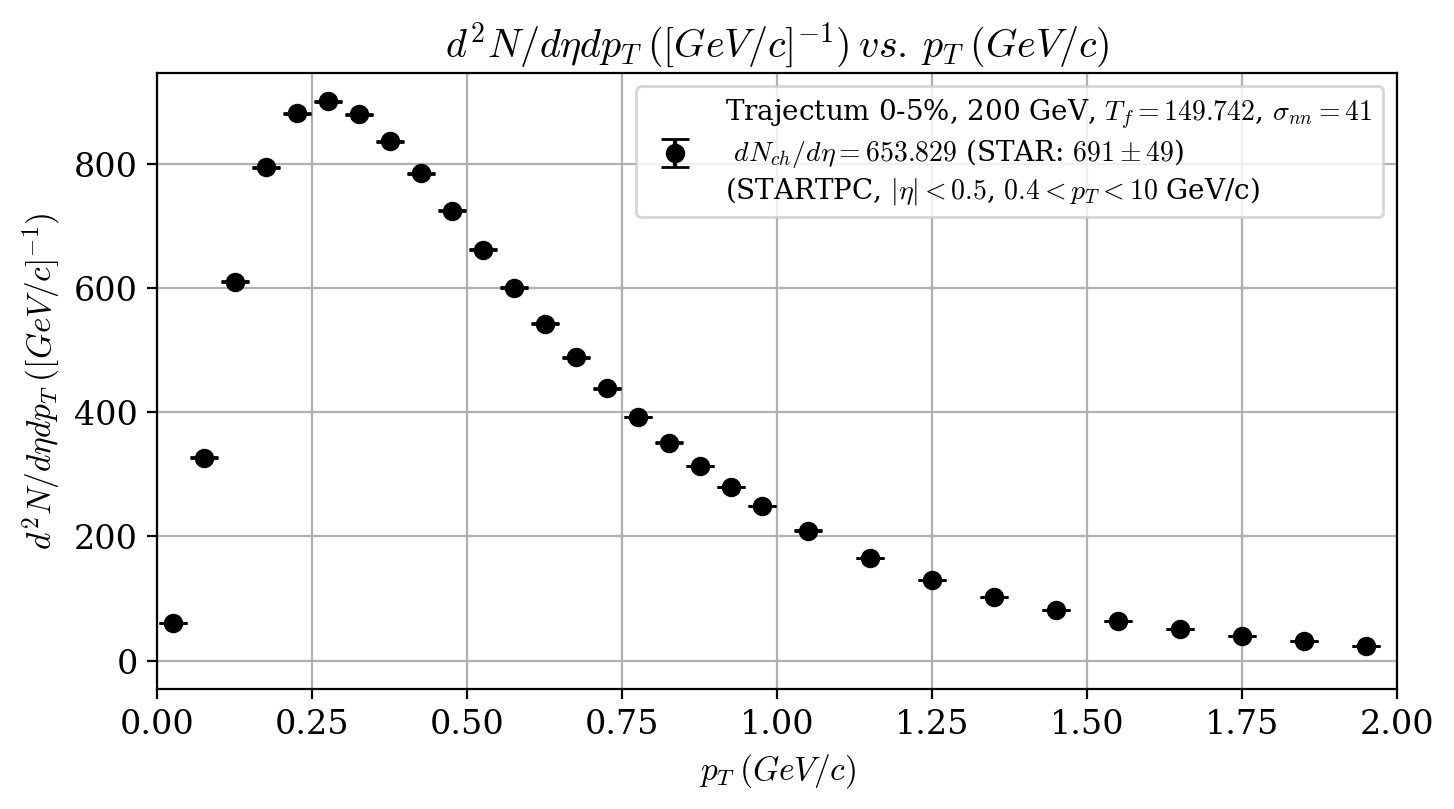

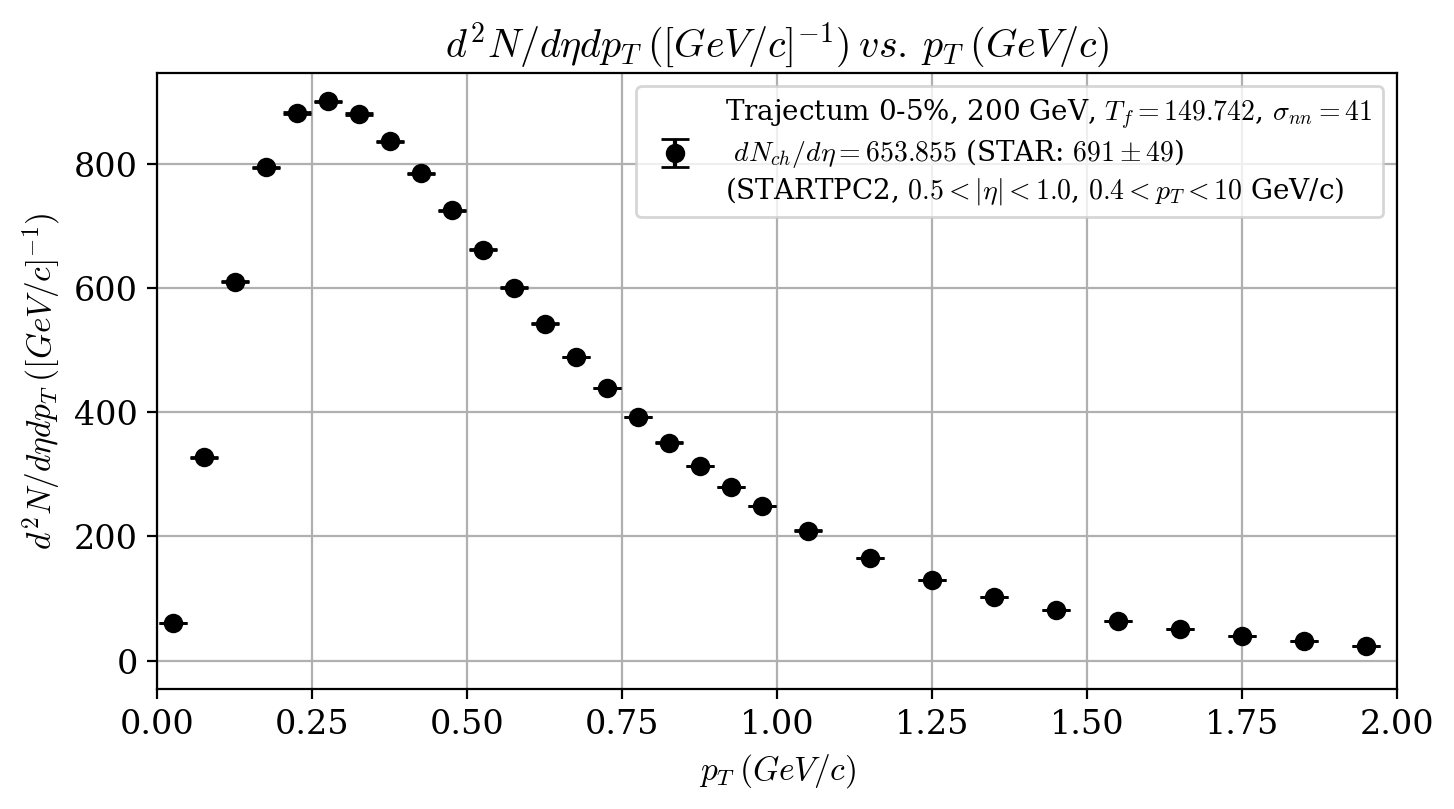

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/851205455.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_1:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_1[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/851205455.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_1:.3f}$ (STA

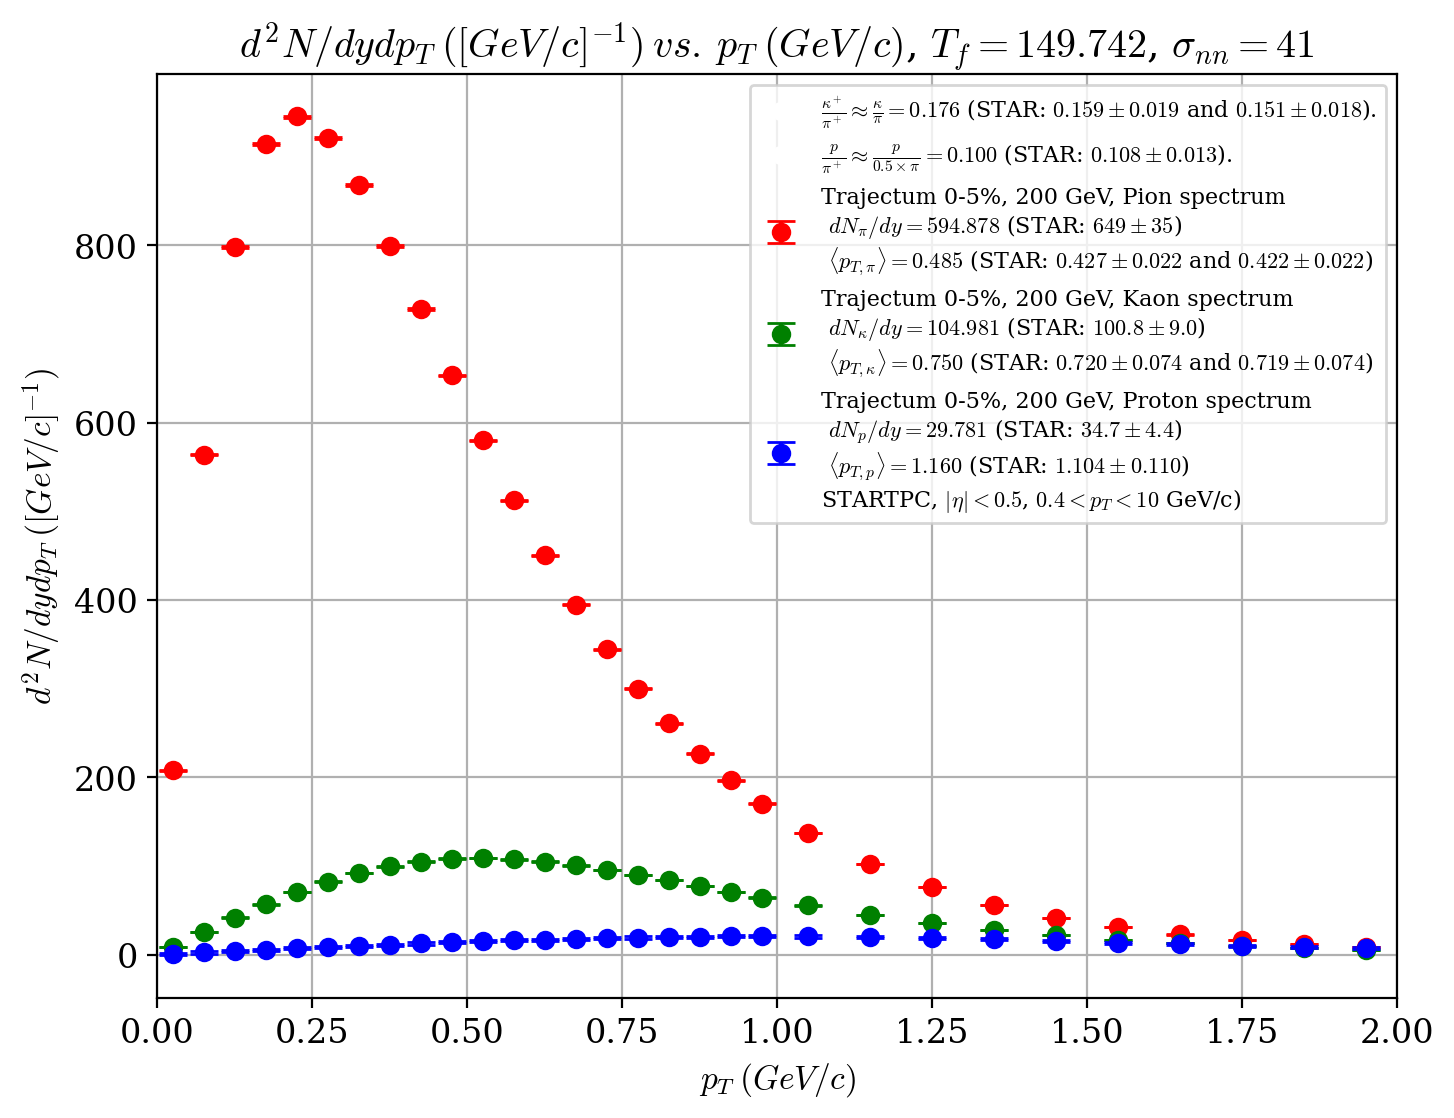

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/851205455.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_STARTPC2_1:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_STARTPC2_1[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/851205455.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={

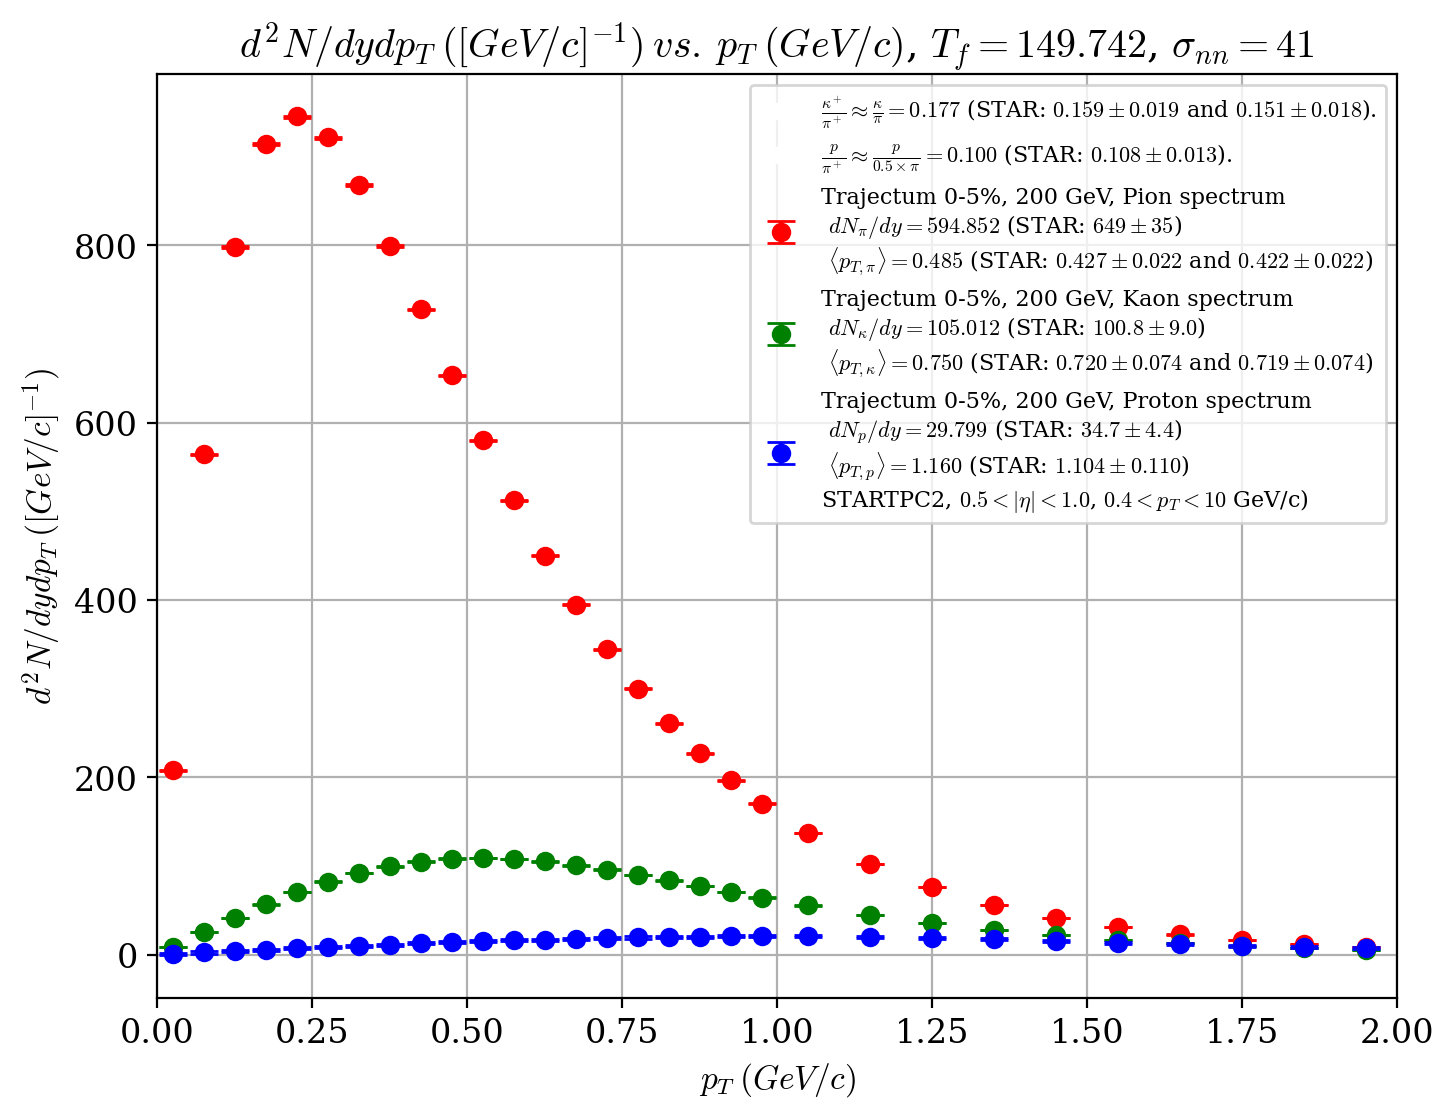

In [357]:
#Plotting Yield for filepath 1

#STARTPC, Charged Particles
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(MultiplicityCharged_bins_1,
            MultiplicityChargedYield_1,
            yerr=[MultiplicityChargedYield_Lerr_1[:],MultiplicityChargedYield_Uerr_1[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_1:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)", color="black")
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC2, Charged Particles
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(MultiplicityCharged_bins_STARTPC2_1,
            MultiplicityChargedYield_STARTPC2_1,
            yerr=[MultiplicityChargedYield_Lerr_STARTPC2_1[:],MultiplicityChargedYield_Uerr_STARTPC2_1[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_STARTPC2_1:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC2, $0.5<|\eta|<1.0$, $0.4<p_T<10$ GeV/c)", color="black")
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC, PID
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

plt.errorbar(MultiplicityChargedPion_bins_1,
            MultiplicityChargedPionYield_1,
            yerr=[MultiplicityChargedPionYield_Lerr_1[:],MultiplicityChargedPionYield_Uerr_1[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_1:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_1[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
plt.errorbar(MultiplicityChargedKaon_bins_1,
            MultiplicityChargedKaonYield_1,
            yerr=[MultiplicityChargedKaonYield_Lerr_1[:],MultiplicityChargedKaonYield_Lerr_1[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_1:.3f}$ (STAR: ${STARkdNdy}$) \n $\\langle p_{{T,\kappa}}\\rangle={float(MultiplicityChargedKaon_MeanpT_1[index]):.3f}$ (STAR: ${STARkplusmeanpt}$ and ${STARkminusmeanpt}$)", color="green")
plt.errorbar(MultiplicityProton_bins_1,
            MultiplicityProtonYield_1,
            yerr=[MultiplicityProton_MeanpT_1[index][:],MultiplicityProton_MeanpT_1[index][:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Proton spectrum \n $dN_{{p}}/dy={dNpdy_1:.3f}$ (STAR: ${STARpdNdy}$) \n $\\langle p_{{T,p}}\\rangle={float(MultiplicityProton_MeanpT_1[index]):.3f}$ (STAR: ${STARpmeanpt}$)\nSTARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)", color="blue")
plt.scatter([],[],color="white",label=rf"$\frac{{\kappa^+}}{{\pi^+}}\approx \frac{{\kappa}}{{\pi}}={dNkdy_over_dNpidy_1:.3f}$ (STAR: ${STARkplusoverpiplus}$ and ${STARkminusoverpiminus}$).")
plt.scatter([],[],color="white",label=rf"$\frac{{p}}{{\pi^+}}\approx\frac{{p}}{{0.5\times\pi}}={dNpdy_over_dNpidy_1:.3f}$ (STAR: ${STARprotonoverpiplus}$).")
plt.title("$d^2N/dy dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$, $T_f = 149.742$, $\sigma_{nn} = 41$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/dy dp_T\>([GeV/c]^{-1})$")
plt.legend(prop={'size': '8'})
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC2, PID
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

plt.errorbar(MultiplicityChargedPion_bins_STARTPC2_1,
            MultiplicityChargedPionYield_STARTPC2_1,
            yerr=[MultiplicityChargedPionYield_Lerr_STARTPC2_1[:],MultiplicityChargedPionYield_Uerr_STARTPC2_1[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_STARTPC2_1:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_STARTPC2_1[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
plt.errorbar(MultiplicityChargedKaon_bins_STARTPC2_1,
            MultiplicityChargedKaonYield_STARTPC2_1,
            yerr=[MultiplicityChargedKaonYield_Lerr_STARTPC2_1[:],MultiplicityChargedKaonYield_Lerr_STARTPC2_1[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_STARTPC2_1:.3f}$ (STAR: ${STARkdNdy}$) \n $\\langle p_{{T,\kappa}}\\rangle={float(MultiplicityChargedKaon_MeanpT_STARTPC2_1[index]):.3f}$ (STAR: ${STARkplusmeanpt}$ and ${STARkminusmeanpt}$)", color="green")
plt.errorbar(MultiplicityProton_bins_STARTPC2_1,
            MultiplicityProtonYield_STARTPC2_1,
            yerr=[MultiplicityProton_MeanpT_STARTPC2_1[index][:],MultiplicityProton_MeanpT_STARTPC2_1[index][:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Proton spectrum \n $dN_{{p}}/dy={dNpdy_STARTPC2_1:.3f}$ (STAR: ${STARpdNdy}$) \n $\\langle p_{{T,p}}\\rangle={float(MultiplicityProton_MeanpT_STARTPC2_1[index]):.3f}$ (STAR: ${STARpmeanpt}$)\nSTARTPC2, $0.5<|\eta|<1.0$, $0.4<p_T<10$ GeV/c)", color="blue")
plt.scatter([],[],color="white",label=rf"$\frac{{\kappa^+}}{{\pi^+}}\approx \frac{{\kappa}}{{\pi}}={dNkdy_over_dNpidy_STARTPC2_1:.3f}$ (STAR: ${STARkplusoverpiplus}$ and ${STARkminusoverpiminus}$).")
plt.scatter([],[],color="white",label=rf"$\frac{{p}}{{\pi^+}}\approx\frac{{p}}{{0.5\times\pi}}={dNpdy_over_dNpidy_STARTPC2_1:.3f}$ (STAR: ${STARprotonoverpiplus}$).")
plt.title("$d^2N/dy dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$, $T_f = 149.742$, $\sigma_{nn} = 41$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/dy dp_T\>([GeV/c]^{-1})$")
plt.legend(prop={'size': '8'})
#plt.yscale("log")
plt.grid()
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\>'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:35: SyntaxWarning: invalid escape sequence '\e'
<>:37: SyntaxWarning: invalid escape sequence '\>'
<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:54: SyntaxWarning: invalid escape sequence '\p'
<>:54: SyntaxWarning: invalid escape sequence '\p'
<>:59: SyntaxWarning: invalid escape sequence '\k'
<>:59: SyntaxWarning: invalid escape sequence '\k'
<>:64: SyntaxWarning: invalid escape sequence '\e'
<>:67: SyntaxWarning: invalid escape sequence '\>'
<>:69: SyntaxWarning: invalid escape sequence '\>'
<>:70: SyntaxWarning: invalid e

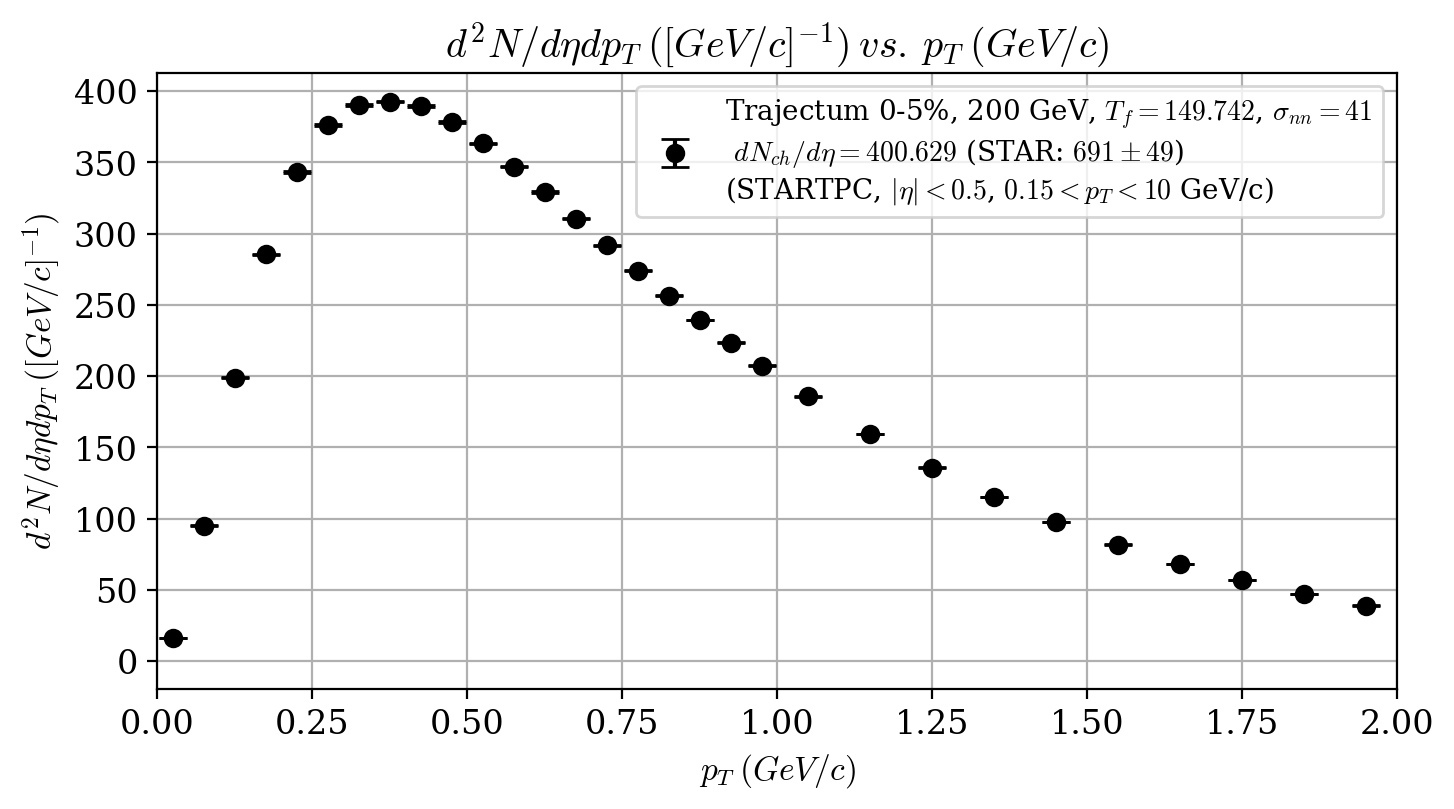

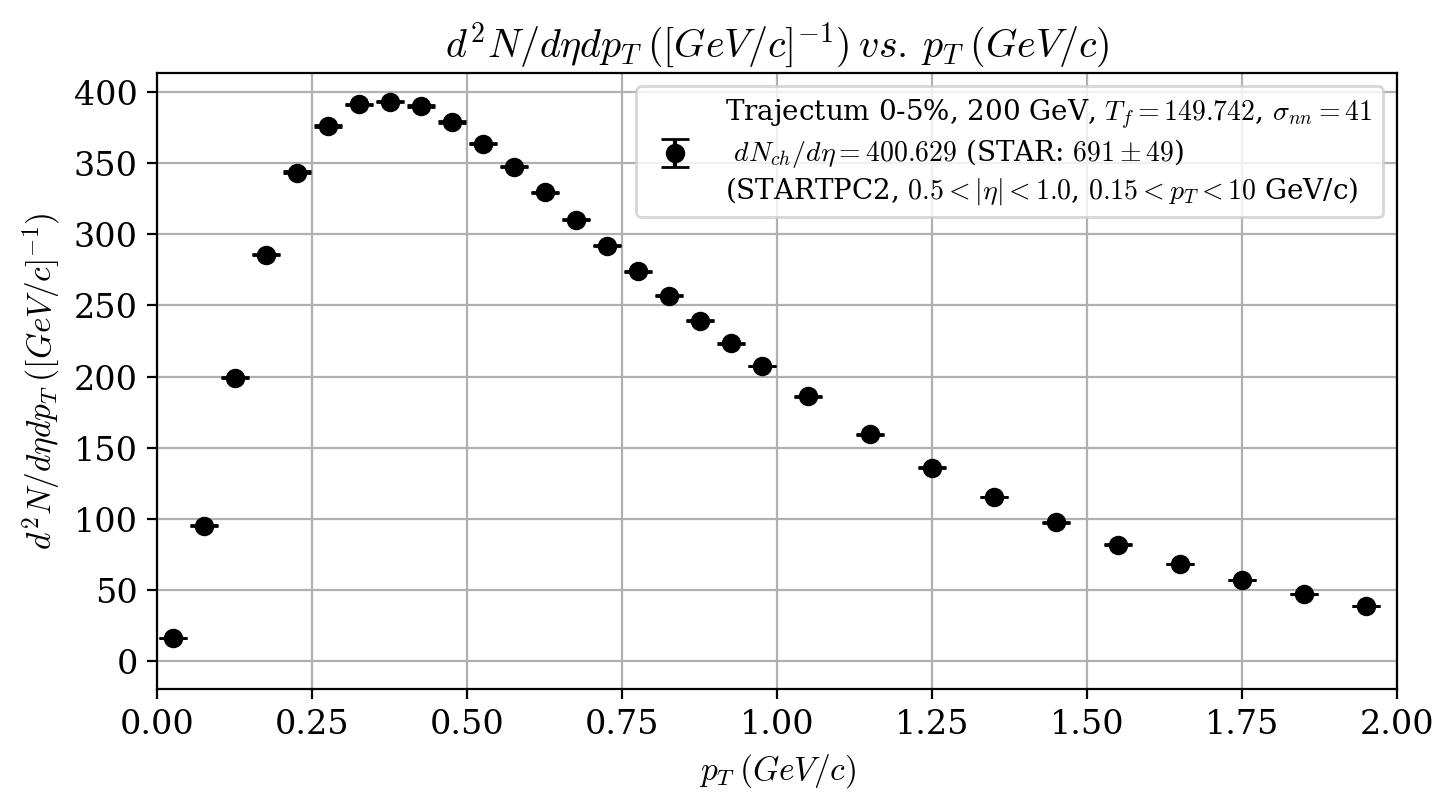

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/2521014311.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_2:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_2[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/2521014311.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_2:.3f}$ (S

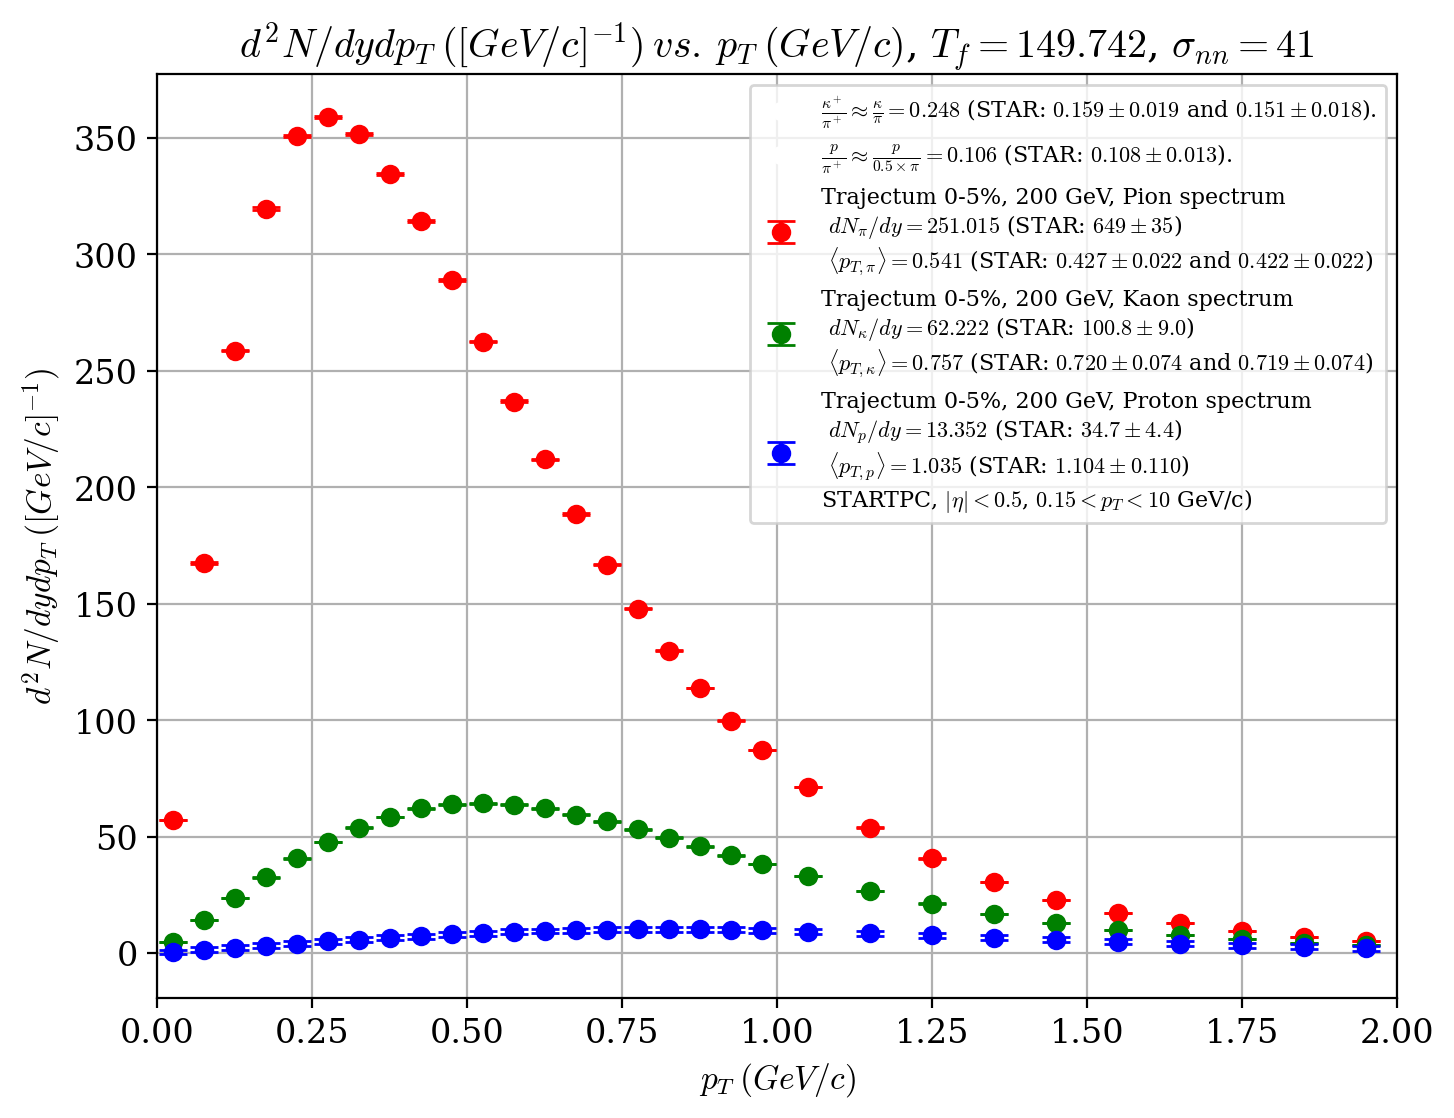

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/2521014311.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_STARTPC2_2:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_STARTPC2_2[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/2521014311.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy

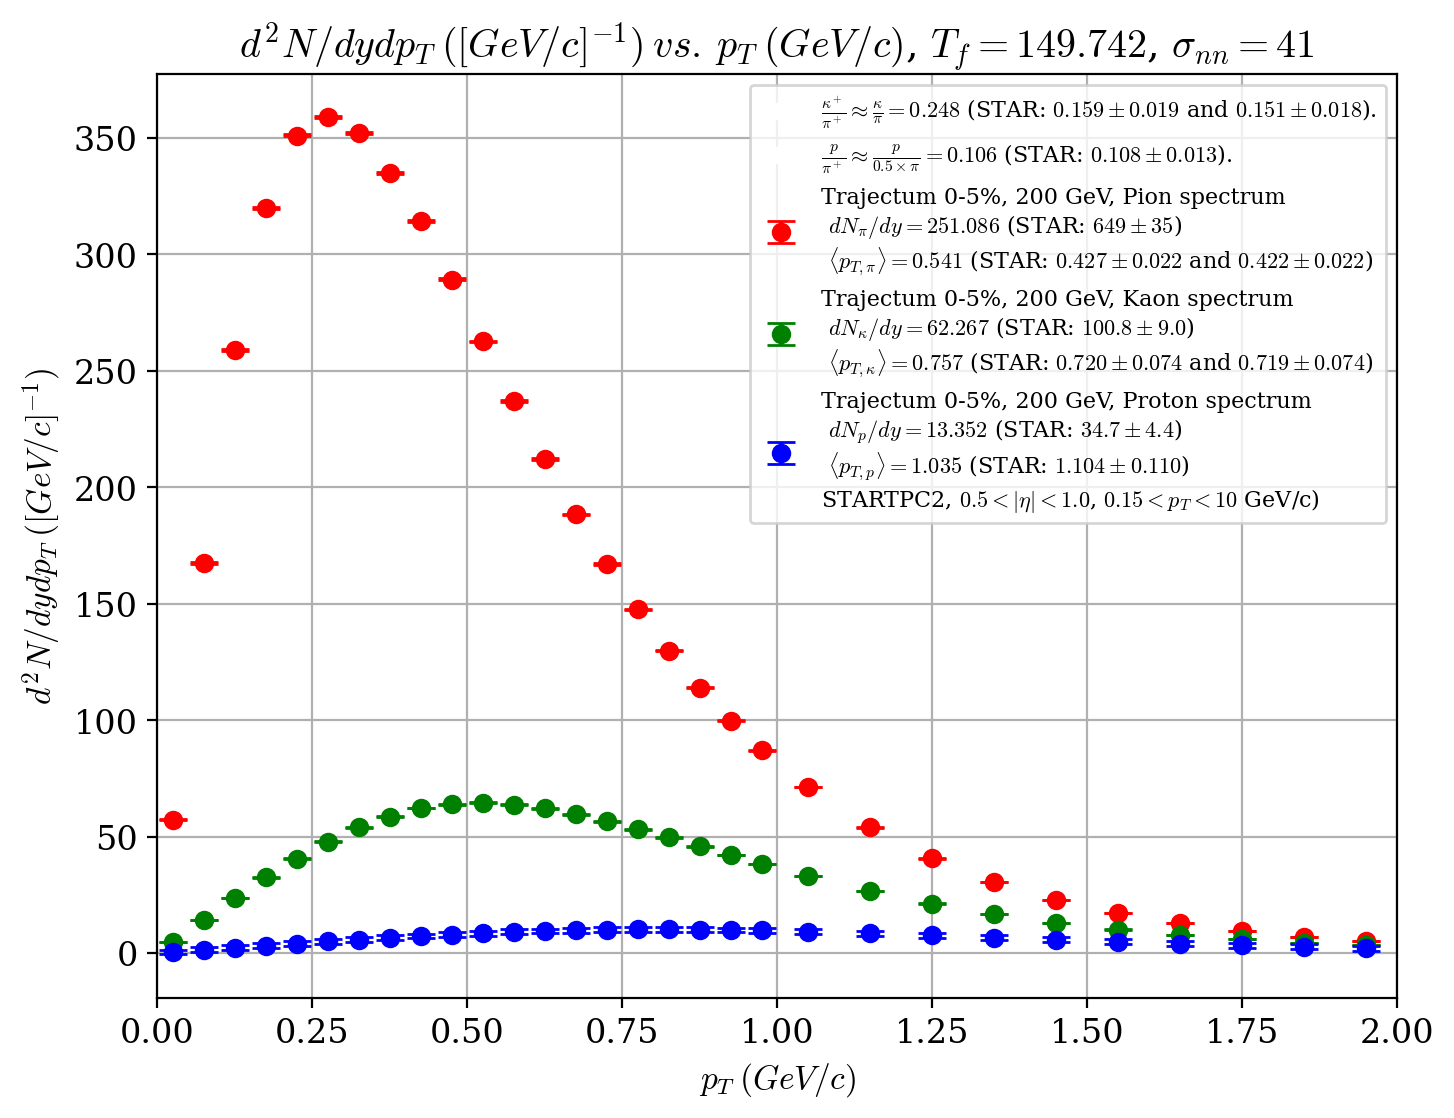

In [358]:
#Plotting Yield for filepath 2

#STARTPC, Charged Particles
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(MultiplicityCharged_bins_2,
            MultiplicityChargedYield_2,
            yerr=[MultiplicityChargedYield_Lerr_2[:],MultiplicityChargedYield_Uerr_2[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_2:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC, $|\eta|<0.5$, $0.15<p_T<10$ GeV/c)", color="black")
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC2, Charged Particles
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(MultiplicityCharged_bins_STARTPC2_2,
            MultiplicityChargedYield_STARTPC2_2,
            yerr=[MultiplicityChargedYield_Lerr_STARTPC2_2[:],MultiplicityChargedYield_Uerr_STARTPC2_2[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_2:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC2, $0.5<|\eta|<1.0$, $0.15<p_T<10$ GeV/c)", color="black")
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC, PID
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

plt.errorbar(MultiplicityChargedPion_bins_2,
            MultiplicityChargedPionYield_2,
            yerr=[MultiplicityChargedPionYield_Lerr_2[:],MultiplicityChargedPionYield_Uerr_2[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_2:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_2[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
plt.errorbar(MultiplicityChargedKaon_bins_2,
            MultiplicityChargedKaonYield_2,
            yerr=[MultiplicityChargedKaonYield_Lerr_2[:],MultiplicityChargedKaonYield_Lerr_2[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_2:.3f}$ (STAR: ${STARkdNdy}$) \n $\\langle p_{{T,\kappa}}\\rangle={float(MultiplicityChargedKaon_MeanpT_2[index]):.3f}$ (STAR: ${STARkplusmeanpt}$ and ${STARkminusmeanpt}$)", color="green")
plt.errorbar(MultiplicityProton_bins_2,
            MultiplicityProtonYield_2,
            yerr=[MultiplicityProton_MeanpT_2[index][:],MultiplicityProton_MeanpT_2[index][:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Proton spectrum \n $dN_{{p}}/dy={dNpdy_2:.3f}$ (STAR: ${STARpdNdy}$) \n $\\langle p_{{T,p}}\\rangle={float(MultiplicityProton_MeanpT_2[index]):.3f}$ (STAR: ${STARpmeanpt}$)\nSTARTPC, $|\eta|<0.5$, $0.15<p_T<10$ GeV/c)", color="blue")
plt.scatter([],[],color="white",label=rf"$\frac{{\kappa^+}}{{\pi^+}}\approx \frac{{\kappa}}{{\pi}}={dNkdy_over_dNpidy_2:.3f}$ (STAR: ${STARkplusoverpiplus}$ and ${STARkminusoverpiminus}$).")
plt.scatter([],[],color="white",label=rf"$\frac{{p}}{{\pi^+}}\approx\frac{{p}}{{0.5\times\pi}}={dNpdy_over_dNpidy_2:.3f}$ (STAR: ${STARprotonoverpiplus}$).")
plt.title("$d^2N/dy dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$, $T_f = 149.742$, $\sigma_{nn} = 41$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/dy dp_T\>([GeV/c]^{-1})$")
plt.legend(prop={'size': '8'})
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC2, PID
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

plt.errorbar(MultiplicityChargedPion_bins_STARTPC2_2,
            MultiplicityChargedPionYield_STARTPC2_2,
            yerr=[MultiplicityChargedPionYield_Lerr_STARTPC2_2[:],MultiplicityChargedPionYield_Uerr_STARTPC2_2[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_STARTPC2_2:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_STARTPC2_2[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
plt.errorbar(MultiplicityChargedKaon_bins_STARTPC2_2,
            MultiplicityChargedKaonYield_STARTPC2_2,
            yerr=[MultiplicityChargedKaonYield_Lerr_STARTPC2_2[:],MultiplicityChargedKaonYield_Lerr_STARTPC2_2[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_STARTPC2_2:.3f}$ (STAR: ${STARkdNdy}$) \n $\\langle p_{{T,\kappa}}\\rangle={float(MultiplicityChargedKaon_MeanpT_STARTPC2_2[index]):.3f}$ (STAR: ${STARkplusmeanpt}$ and ${STARkminusmeanpt}$)", color="green")
plt.errorbar(MultiplicityProton_bins_STARTPC2_2,
            MultiplicityProtonYield_STARTPC2_2,
            yerr=[MultiplicityProton_MeanpT_STARTPC2_2[index][:],MultiplicityProton_MeanpT_STARTPC2_2[index][:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Proton spectrum \n $dN_{{p}}/dy={dNpdy_STARTPC2_2:.3f}$ (STAR: ${STARpdNdy}$) \n $\\langle p_{{T,p}}\\rangle={float(MultiplicityProton_MeanpT_STARTPC2_2[index]):.3f}$ (STAR: ${STARpmeanpt}$)\nSTARTPC2, $0.5<|\eta|<1.0$, $0.15<p_T<10$ GeV/c)", color="blue")
plt.scatter([],[],color="white",label=rf"$\frac{{\kappa^+}}{{\pi^+}}\approx \frac{{\kappa}}{{\pi}}={dNkdy_over_dNpidy_STARTPC2_2:.3f}$ (STAR: ${STARkplusoverpiplus}$ and ${STARkminusoverpiminus}$).")
plt.scatter([],[],color="white",label=rf"$\frac{{p}}{{\pi^+}}\approx\frac{{p}}{{0.5\times\pi}}={dNpdy_over_dNpidy_STARTPC2_2:.3f}$ (STAR: ${STARprotonoverpiplus}$).")
plt.title("$d^2N/dy dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$, $T_f = 149.742$, $\sigma_{nn} = 41$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/dy dp_T\>([GeV/c]^{-1})$")
plt.legend(prop={'size': '8'})
#plt.yscale("log")
plt.grid()
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\>'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:35: SyntaxWarning: invalid escape sequence '\e'
<>:37: SyntaxWarning: invalid escape sequence '\>'
<>:38: SyntaxWarning: invalid escape sequence '\e'
<>:54: SyntaxWarning: invalid escape sequence '\p'
<>:54: SyntaxWarning: invalid escape sequence '\p'
<>:59: SyntaxWarning: invalid escape sequence '\k'
<>:59: SyntaxWarning: invalid escape sequence '\k'
<>:64: SyntaxWarning: invalid escape sequence '\e'
<>:67: SyntaxWarning: invalid escape sequence '\>'
<>:69: SyntaxWarning: invalid escape sequence '\>'
<>:70: SyntaxWarning: invalid e

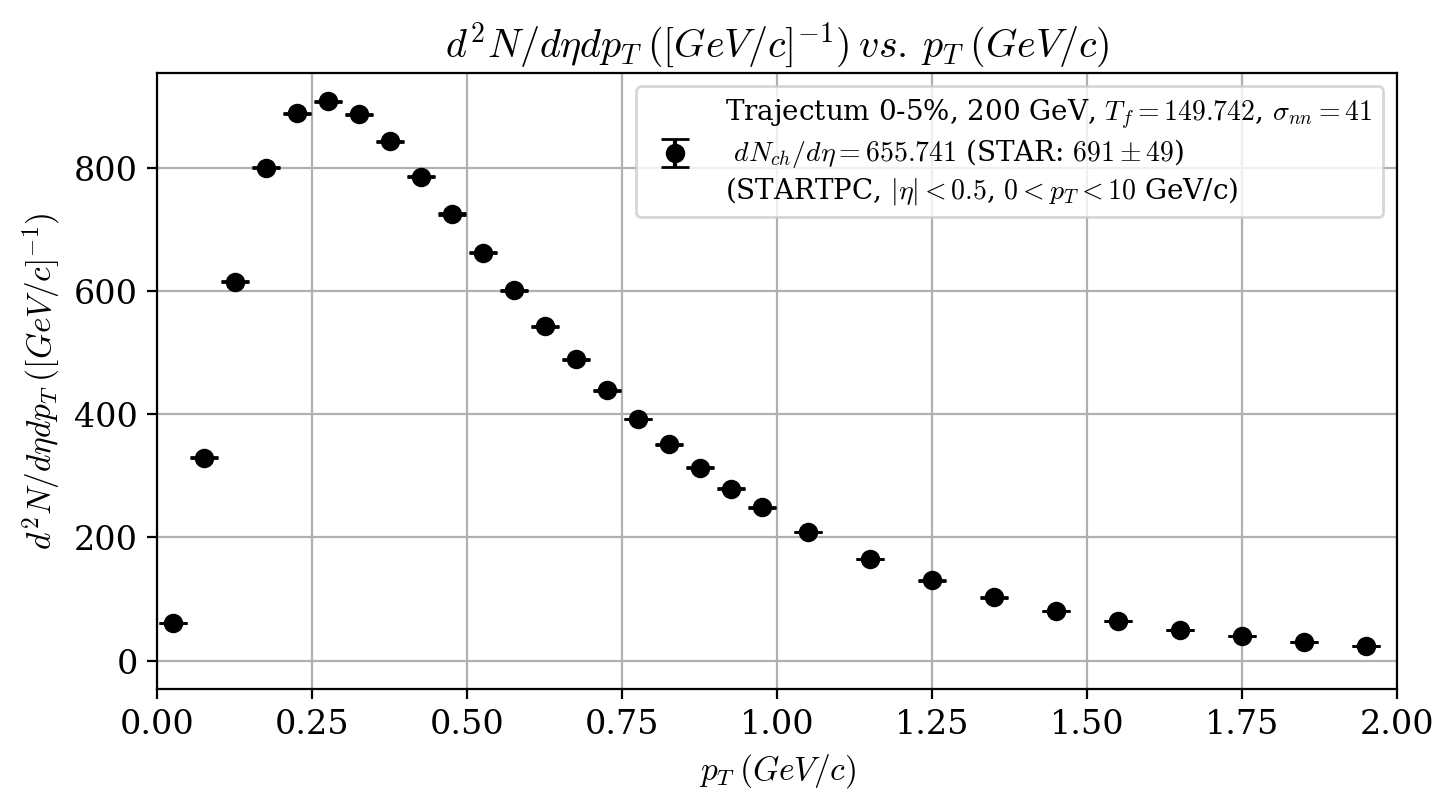

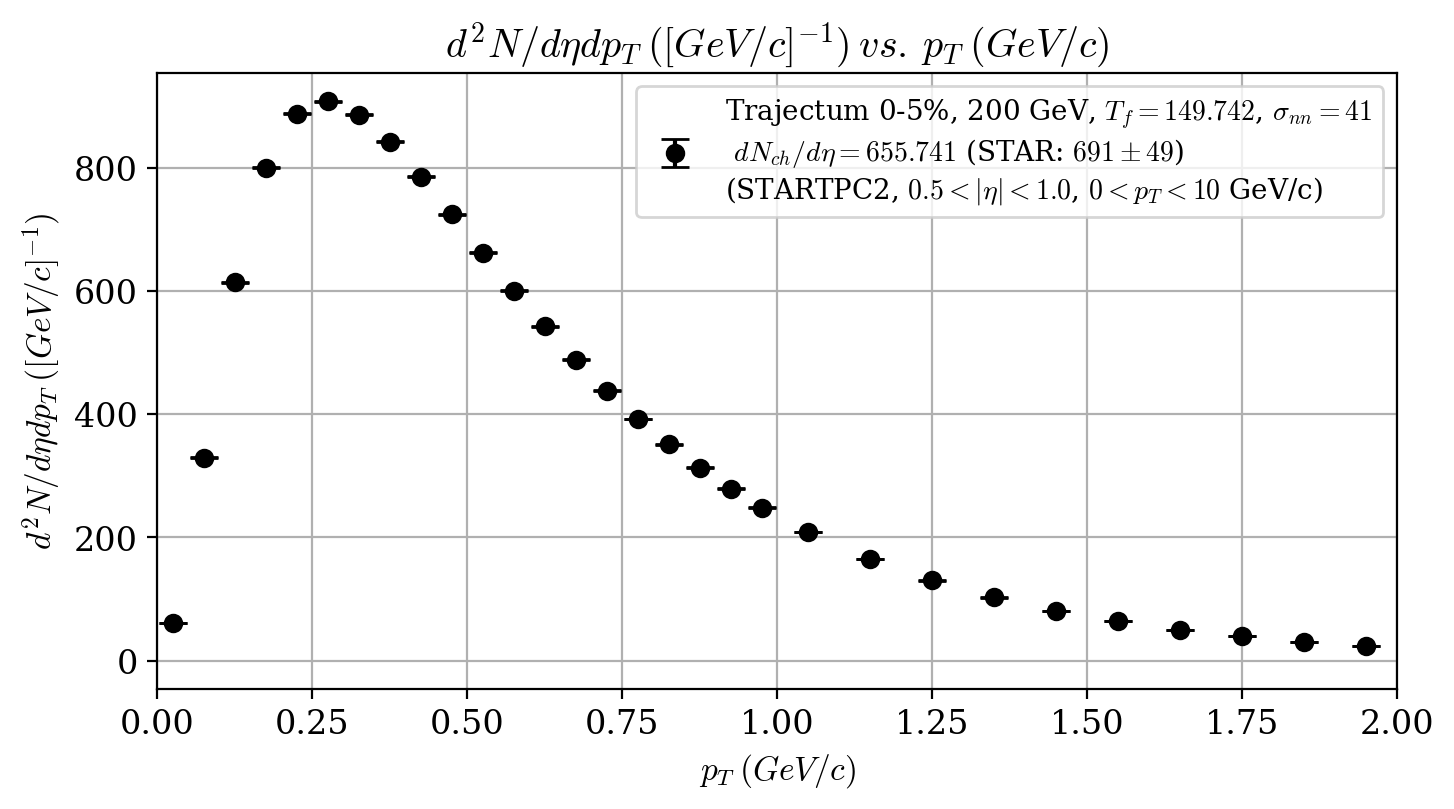

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/2444098011.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_3:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_3[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/2444098011.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_3:.3f}$ (S

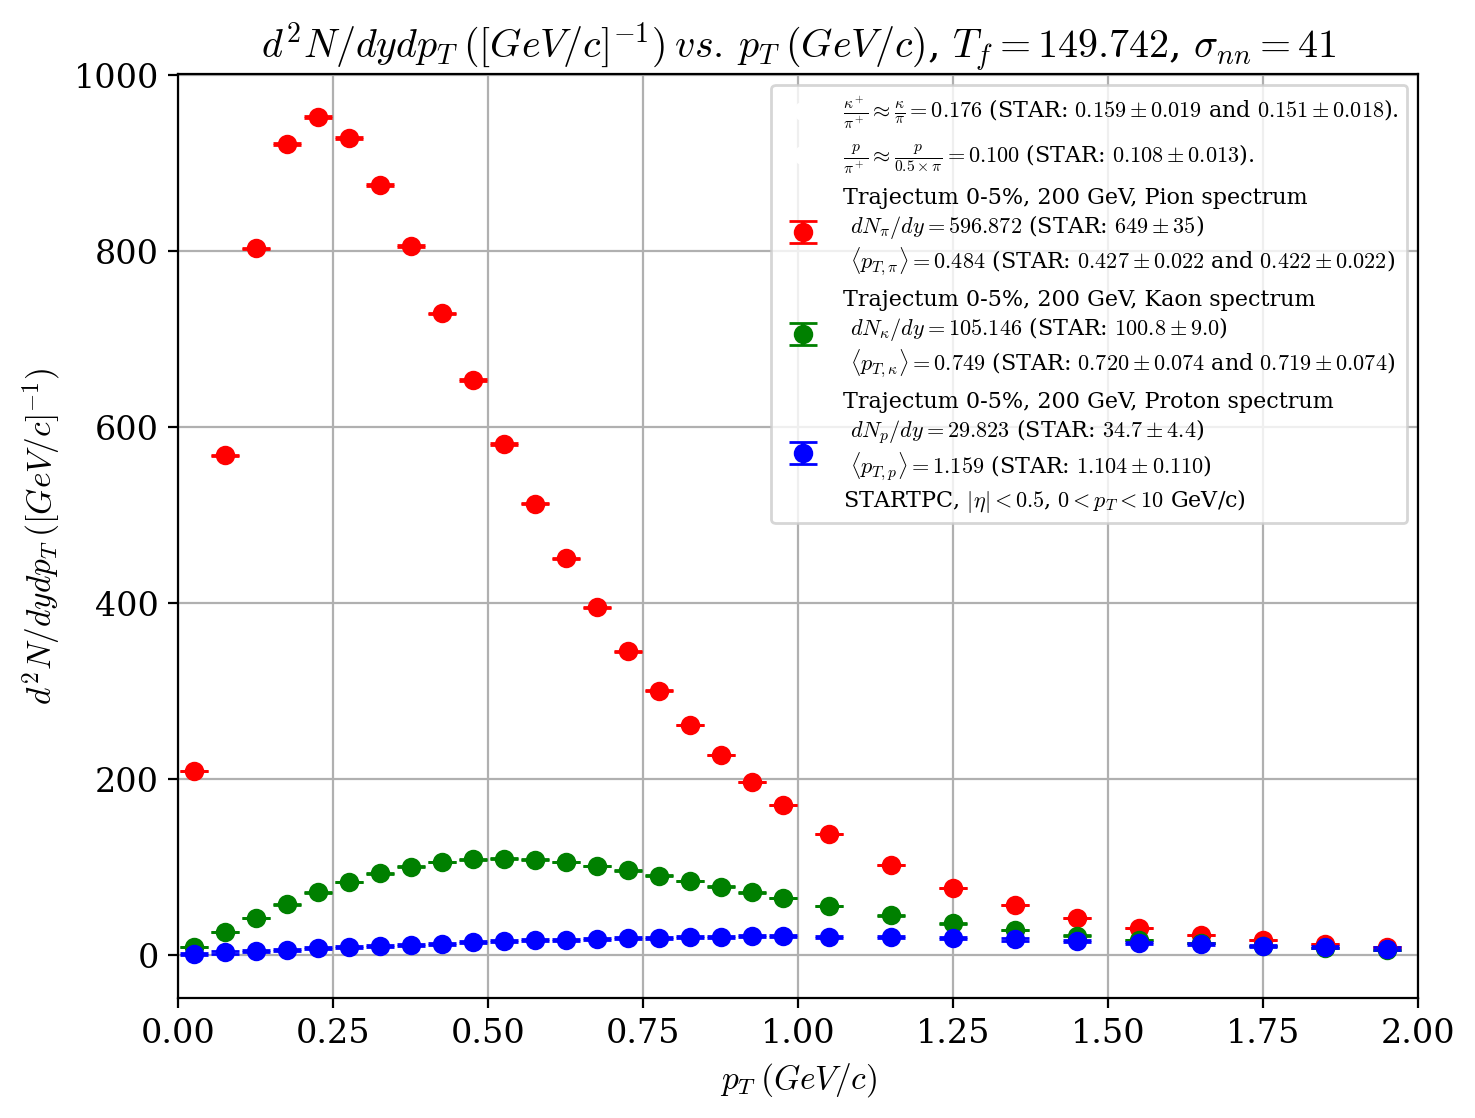

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/2444098011.py:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_STARTPC2_3:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_STARTPC2_3[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/2444098011.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy

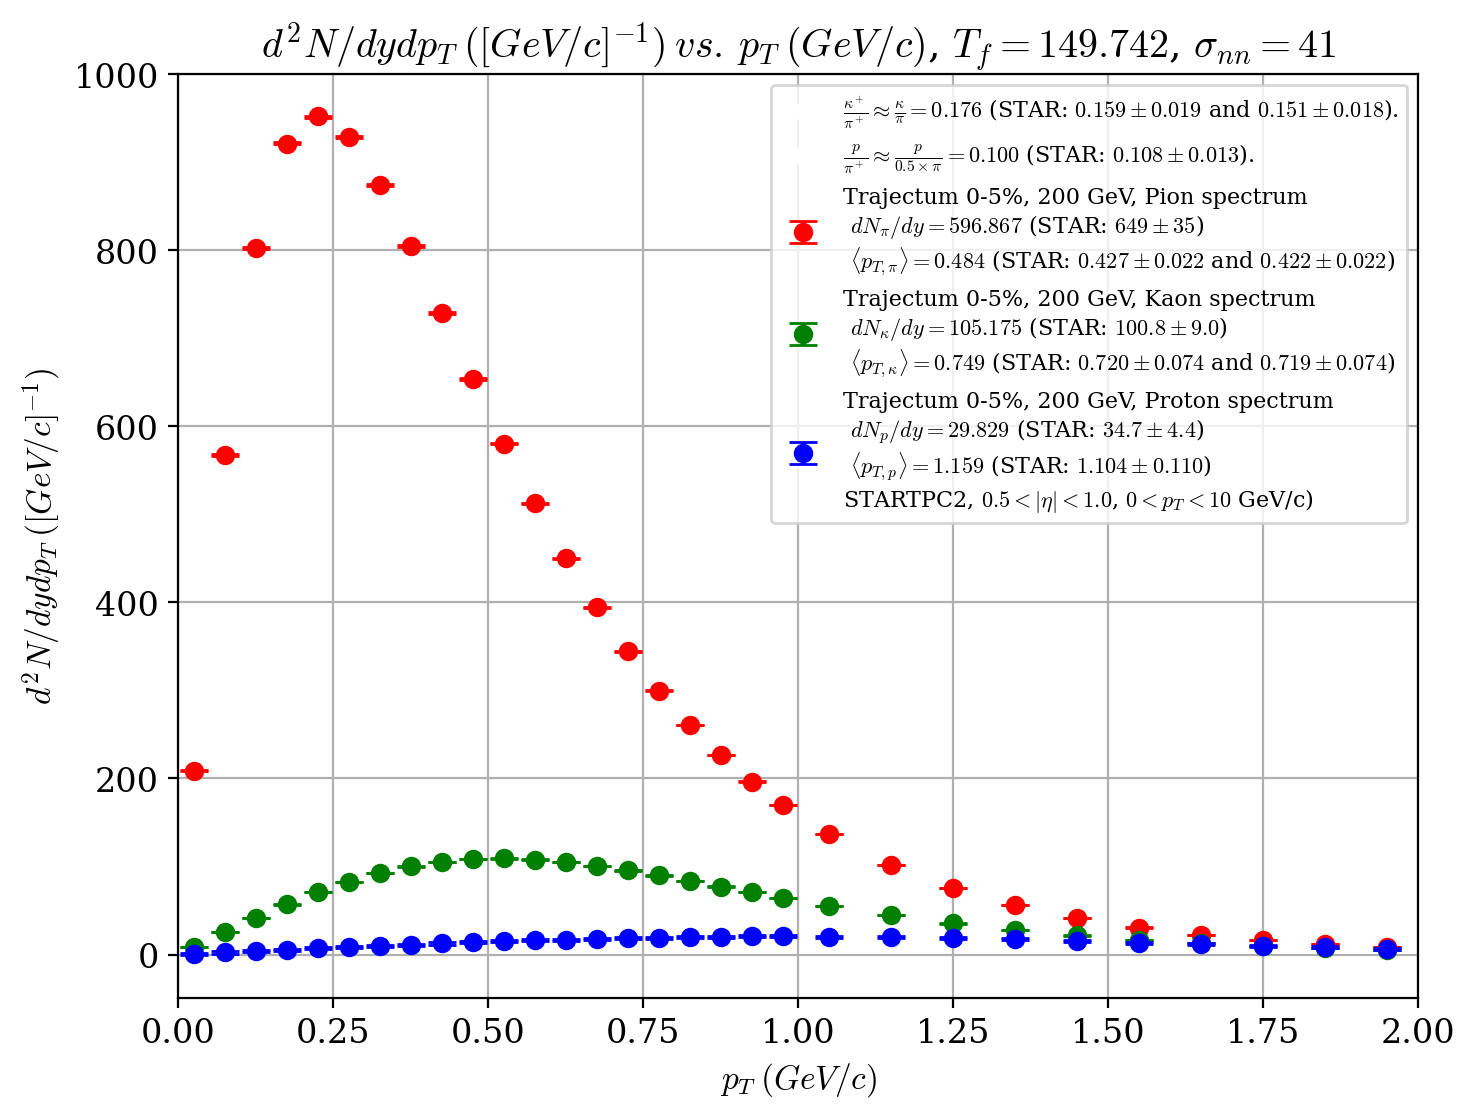

In [359]:
#Plotting Yield for filepath 3

#STARTPC, Charged Particles
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(MultiplicityCharged_bins_3,
            MultiplicityChargedYield_3,
            yerr=[MultiplicityChargedYield_Lerr_3[:],MultiplicityChargedYield_Uerr_3[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_3:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC, $|\eta|<0.5$, $0<p_T<10$ GeV/c)", color="black")
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC2, Charged Particles
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(MultiplicityCharged_bins_STARTPC2_3,
            MultiplicityChargedYield_STARTPC2_3,
            yerr=[MultiplicityChargedYield_Lerr_STARTPC2_3[:],MultiplicityChargedYield_Uerr_STARTPC2_3[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_3:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC2, $0.5<|\eta|<1.0$, $0<p_T<10$ GeV/c)", color="black")
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC, PID
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

plt.errorbar(MultiplicityChargedPion_bins_3,
            MultiplicityChargedPionYield_3,
            yerr=[MultiplicityChargedPionYield_Lerr_3[:],MultiplicityChargedPionYield_Uerr_3[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_3:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_3[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
plt.errorbar(MultiplicityChargedKaon_bins_3,
            MultiplicityChargedKaonYield_3,
            yerr=[MultiplicityChargedKaonYield_Lerr_3[:],MultiplicityChargedKaonYield_Lerr_3[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_3:.3f}$ (STAR: ${STARkdNdy}$) \n $\\langle p_{{T,\kappa}}\\rangle={float(MultiplicityChargedKaon_MeanpT_3[index]):.3f}$ (STAR: ${STARkplusmeanpt}$ and ${STARkminusmeanpt}$)", color="green")
plt.errorbar(MultiplicityProton_bins_3,
            MultiplicityProtonYield_3,
            yerr=[MultiplicityProton_MeanpT_3[index][:],MultiplicityProton_MeanpT_3[index][:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Proton spectrum \n $dN_{{p}}/dy={dNpdy_3:.3f}$ (STAR: ${STARpdNdy}$) \n $\\langle p_{{T,p}}\\rangle={float(MultiplicityProton_MeanpT_3[index]):.3f}$ (STAR: ${STARpmeanpt}$)\nSTARTPC, $|\eta|<0.5$, $0<p_T<10$ GeV/c)", color="blue")
plt.scatter([],[],color="white",label=rf"$\frac{{\kappa^+}}{{\pi^+}}\approx \frac{{\kappa}}{{\pi}}={dNkdy_over_dNpidy_3:.3f}$ (STAR: ${STARkplusoverpiplus}$ and ${STARkminusoverpiminus}$).")
plt.scatter([],[],color="white",label=rf"$\frac{{p}}{{\pi^+}}\approx\frac{{p}}{{0.5\times\pi}}={dNpdy_over_dNpidy_3:.3f}$ (STAR: ${STARprotonoverpiplus}$).")
plt.title("$d^2N/dy dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$, $T_f = 149.742$, $\sigma_{nn} = 41$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/dy dp_T\>([GeV/c]^{-1})$")
plt.legend(prop={'size': '8'})
#plt.yscale("log")
plt.grid()
plt.show()



#STARTPC2, PID
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

plt.errorbar(MultiplicityChargedPion_bins_STARTPC2_3,
            MultiplicityChargedPionYield_STARTPC2_3,
            yerr=[MultiplicityChargedPionYield_Lerr_STARTPC2_3[:],MultiplicityChargedPionYield_Uerr_STARTPC2_3[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNpidy_STARTPC2_3:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={float(MultiplicityChargedPion_MeanpT_STARTPC2_3[index]):.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
plt.errorbar(MultiplicityChargedKaon_bins_STARTPC2_3,
            MultiplicityChargedKaonYield_STARTPC2_3,
            yerr=[MultiplicityChargedKaonYield_Lerr_STARTPC2_3[:],MultiplicityChargedKaonYield_Lerr_STARTPC2_3[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNkdy_STARTPC2_3:.3f}$ (STAR: ${STARkdNdy}$) \n $\\langle p_{{T,\kappa}}\\rangle={float(MultiplicityChargedKaon_MeanpT_STARTPC2_3[index]):.3f}$ (STAR: ${STARkplusmeanpt}$ and ${STARkminusmeanpt}$)", color="green")
plt.errorbar(MultiplicityProton_bins_STARTPC2_3,
            MultiplicityProtonYield_STARTPC2_3,
            yerr=[MultiplicityProton_MeanpT_STARTPC2_3[index][:],MultiplicityProton_MeanpT_STARTPC2_3[index][:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, Proton spectrum \n $dN_{{p}}/dy={dNpdy_STARTPC2_3:.3f}$ (STAR: ${STARpdNdy}$) \n $\\langle p_{{T,p}}\\rangle={float(MultiplicityProton_MeanpT_STARTPC2_3[index]):.3f}$ (STAR: ${STARpmeanpt}$)\nSTARTPC2, $0.5<|\eta|<1.0$, $0<p_T<10$ GeV/c)", color="blue")
plt.scatter([],[],color="white",label=rf"$\frac{{\kappa^+}}{{\pi^+}}\approx \frac{{\kappa}}{{\pi}}={dNkdy_over_dNpidy_STARTPC2_3:.3f}$ (STAR: ${STARkplusoverpiplus}$ and ${STARkminusoverpiminus}$).")
plt.scatter([],[],color="white",label=rf"$\frac{{p}}{{\pi^+}}\approx\frac{{p}}{{0.5\times\pi}}={dNpdy_over_dNpidy_STARTPC2_3:.3f}$ (STAR: ${STARprotonoverpiplus}$).")
plt.title("$d^2N/dy dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$, $T_f = 149.742$, $\sigma_{nn} = 41$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/dy dp_T\>([GeV/c]^{-1})$")
plt.legend(prop={'size': '8'})
#plt.yscale("log")
plt.grid()
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:25: SyntaxWarning: invalid escape sequence '\>'
<>:26: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid e

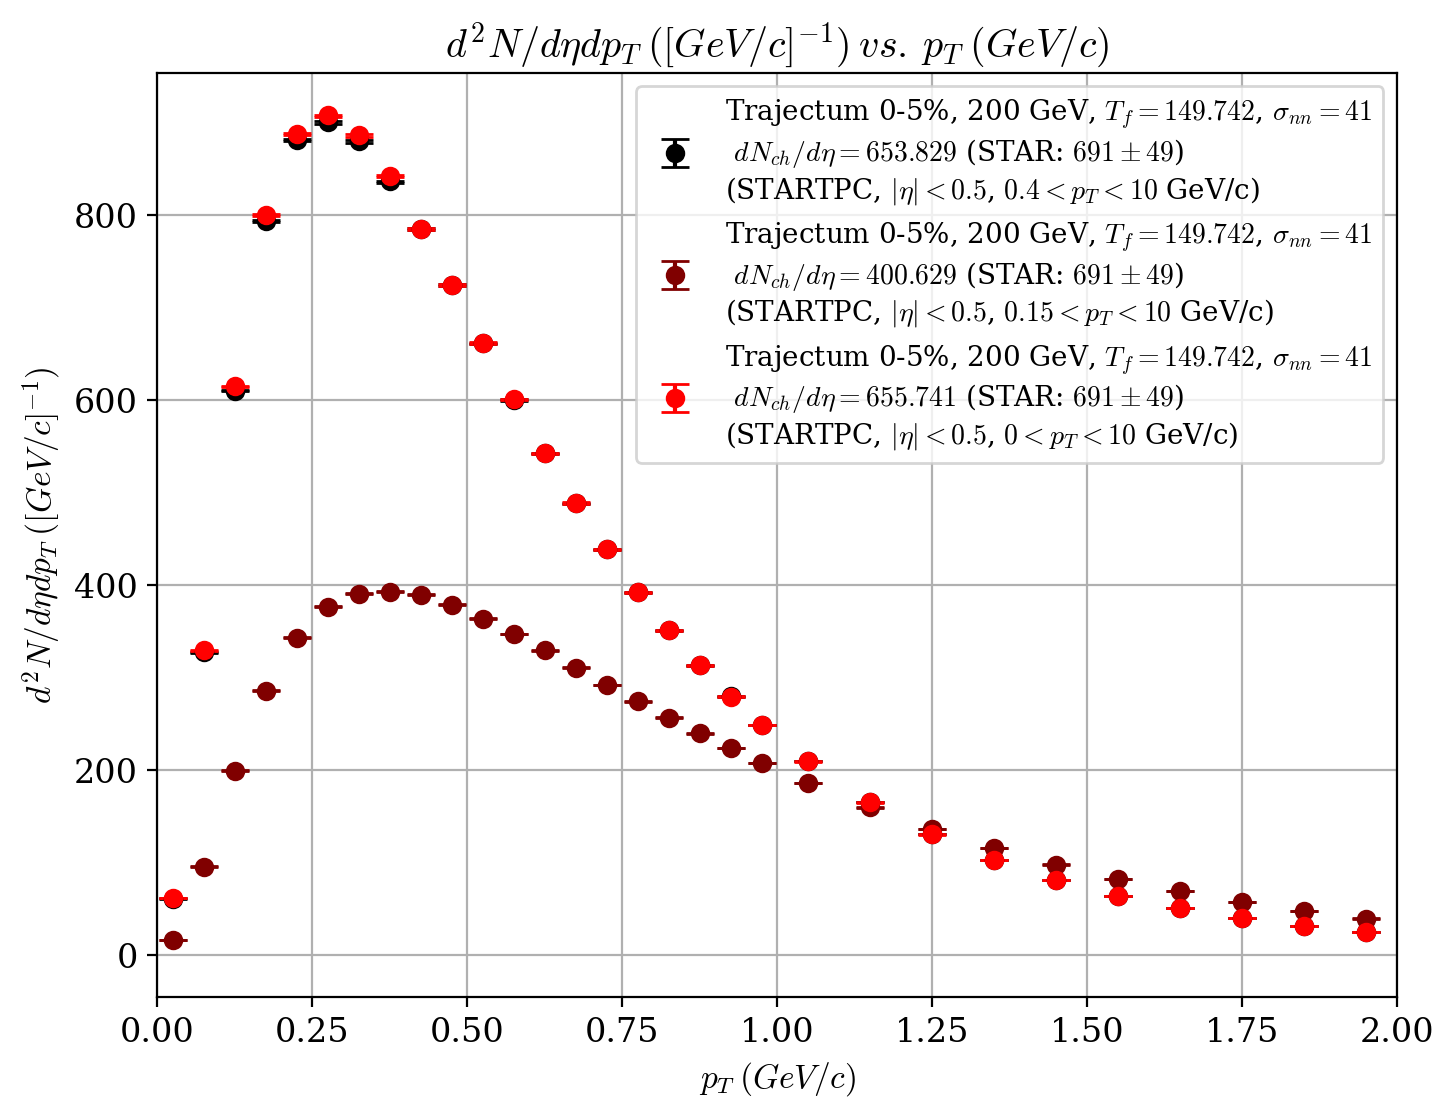

In [360]:
#Comparing charged particle yields

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

plt.errorbar(MultiplicityCharged_bins_1,
            MultiplicityChargedYield_1,
            yerr=[MultiplicityChargedYield_Lerr_1[:],MultiplicityChargedYield_Uerr_1[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_1:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)", color="black")
plt.errorbar(MultiplicityCharged_bins_2,
            MultiplicityChargedYield_2,
            yerr=[MultiplicityChargedYield_Lerr_2[:],MultiplicityChargedYield_Uerr_2[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_2:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC, $|\eta|<0.5$, $0.15<p_T<10$ GeV/c)", color="maroon")
plt.errorbar(MultiplicityCharged_bins_3,
            MultiplicityChargedYield_3,
            yerr=[MultiplicityChargedYield_Lerr_3[:],MultiplicityChargedYield_Uerr_3[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_3:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC, $|\eta|<0.5$, $0<p_T<10$ GeV/c)", color="red")
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()

In [361]:
#Normalization for SOS plot

#16th index is the 0-5% centrality region

MultiplicityCharged_MeanpT_05_1 = MultiplicityCharged_MeanpT_1 / MultiplicityCharged_MeanpT_1[16]
MultiplicityCharged_MeanpT_05_Symerr_1 = MultiplicityCharged_MeanpT_05_1 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_1/MultiplicityCharged_MeanpT_1)**2 + (MultiplicityCharged_MeanpT_Symerr_1[16]/MultiplicityCharged_MeanpT_1[16])**2)
MultiplicityCharged_05_1 = MultiplicityCharged_1 / MultiplicityCharged_1[16]

MultiplicityCharged_MeanpT_05_STARTPC2_1 = MultiplicityCharged_MeanpT_STARTPC2_1 / MultiplicityCharged_MeanpT_STARTPC2_1[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_1 = MultiplicityCharged_MeanpT_05_STARTPC2_1 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2_1/MultiplicityCharged_MeanpT_STARTPC2_1)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2_1[16]/MultiplicityCharged_MeanpT_STARTPC2_1[16])**2)
MultiplicityCharged_05_STARTPC2_1 = MultiplicityCharged_STARTPC2_1 / MultiplicityCharged_STARTPC2_1[16]

MultiplicityCharged_MeanpT_05_2 = MultiplicityCharged_MeanpT_2 / MultiplicityCharged_MeanpT_2[16]
MultiplicityCharged_MeanpT_05_Symerr_2 = MultiplicityCharged_MeanpT_05_2 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_2/MultiplicityCharged_MeanpT_05_2)**2 + (MultiplicityCharged_MeanpT_Symerr_2[16]/MultiplicityCharged_MeanpT_05_2[16])**2)
MultiplicityCharged_05_2 = MultiplicityCharged_2 / MultiplicityCharged_2[16]

MultiplicityCharged_MeanpT_05_STARTPC2_2 = MultiplicityCharged_MeanpT_STARTPC2_2 / MultiplicityCharged_MeanpT_STARTPC2_2[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_2 = MultiplicityCharged_MeanpT_05_STARTPC2_2 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2_2/MultiplicityCharged_MeanpT_STARTPC2_2)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2_2[16]/MultiplicityCharged_MeanpT_STARTPC2_2[16])**2)
MultiplicityCharged_05_STARTPC2_2 = MultiplicityCharged_STARTPC2_2 / MultiplicityCharged_STARTPC2_2[16]

MultiplicityCharged_MeanpT_05_3 = MultiplicityCharged_MeanpT_3 / MultiplicityCharged_MeanpT_3[16]
MultiplicityCharged_MeanpT_05_Symerr_3 = MultiplicityCharged_MeanpT_05_3 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_3/MultiplicityCharged_MeanpT_05_3)**2 + (MultiplicityCharged_MeanpT_Symerr_3[16]/MultiplicityCharged_MeanpT_05_3[16])**2)
MultiplicityCharged_05_3 = MultiplicityCharged_3 / MultiplicityCharged_3[16]

MultiplicityCharged_MeanpT_05_STARTPC2_3 = MultiplicityCharged_MeanpT_STARTPC2_3 / MultiplicityCharged_MeanpT_STARTPC2_3[16]
MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_3 = MultiplicityCharged_MeanpT_05_STARTPC2_3 * np.sqrt((MultiplicityCharged_MeanpT_Symerr_STARTPC2_3/MultiplicityCharged_MeanpT_05_STARTPC2_3)**2 + (MultiplicityCharged_MeanpT_Symerr_STARTPC2_3[16]/MultiplicityCharged_MeanpT_05_STARTPC2_3[16])**2)
MultiplicityCharged_05_STARTPC2_3 = MultiplicityCharged_STARTPC2_3 / MultiplicityCharged_STARTPC2_3[16]

In [362]:
#SOS fit function and chi2
def f(Nch_norm, Nch_knee, sigma0):
    numerator = np.exp(-((Nch_norm - Nch_knee)**2) / (2 * sigma0**2))
    denominator = erfc((Nch_norm - Nch_knee) / (np.sqrt(2) * sigma0))
    correction = sigma0 * np.sqrt(2 / np.pi) * numerator / denominator
    return Nch_norm - correction    

def scaled_mean_pt_fitonlycs2(Nch_norm, cs2, Nch_knee, sigma0):
    return (Nch_norm / f(Nch_norm, Nch_knee, sigma0)) ** cs2

def compute_chi2_ndf(xdata, ydata, yerr, fit_func, popt):
    model_y = fit_func(xdata, *popt)
    residuals = (ydata - model_y) / yerr
    chi2 = np.sum(residuals**2)
    ndf = len(xdata) - len(popt)
    chi2_ndf = chi2 / ndf
    return chi2, ndf, chi2_ndf


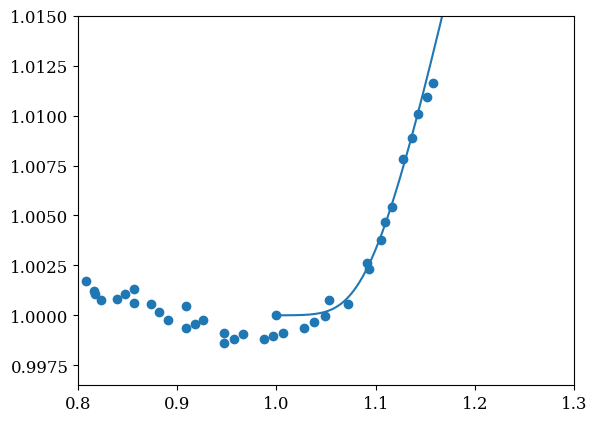

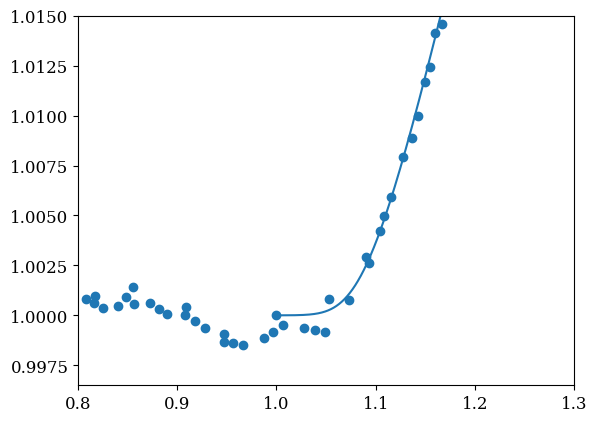

[0.27465872 1.11700474 0.0285273 ]
0.8085663238766599
[0.25910325 1.11004721 0.02662252]
0.6460414214958796


In [363]:
#SOS fitting for filepath 1
fit_mask1 = (MultiplicityCharged_05_1 >= 1) & (MultiplicityCharged_05_1 <= 1.2)
fit_mask1_STARTPC2 = (MultiplicityCharged_05_STARTPC2_1 >= 1) & (MultiplicityCharged_05_STARTPC2_1 <= 1.2)

# Filter data
xnorm1_fitrange = MultiplicityCharged_05_1[fit_mask1]
ynorm1_fitrange = MultiplicityCharged_MeanpT_05_1[fit_mask1]
ynorm1err_fitrange = MultiplicityCharged_MeanpT_05_Symerr_1[fit_mask1]

xnorm1_fitrange_STARTPC2 = MultiplicityCharged_05_STARTPC2_1[fit_mask1_STARTPC2]
ynorm1_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_STARTPC2_1[fit_mask1_STARTPC2]
ynorm1err_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_1[fit_mask1_STARTPC2]

popt1, pcov1 = curve_fit(
    lambda x, cs2, Nch_knee, sigma0: scaled_mean_pt_fitonlycs2(x, cs2, Nch_knee, sigma0),
    xnorm1_fitrange, ynorm1_fitrange, sigma=ynorm1err_fitrange, absolute_sigma=True, p0=[0.18, 1.05, 0.02], bounds=([0,0,0],[1,3,0.1]), maxfev=100000)

popt1_STARTPC2, pcov1_STARTPC2 = curve_fit(
    lambda x, cs2, Nch_knee, sigma0: scaled_mean_pt_fitonlycs2(x, cs2, Nch_knee, sigma0),
    xnorm1_fitrange_STARTPC2, ynorm1_fitrange_STARTPC2, sigma=ynorm1err_fitrange_STARTPC2, absolute_sigma=True, p0=[0.18, 1.05, 0.02], bounds=([0,0,0],[1,3,0.1]), maxfev=100000)

cs2_fit_1 = popt1[0]
cs2_err_1 = np.sqrt(pcov1[0][0])

cs2_fit_1_STARTPC2 = popt1_STARTPC2[0]
cs2_err_1_STARTPC2 = np.sqrt(pcov1_STARTPC2[0][0])

xfit1 = np.linspace(1, 1.3, 1000)
yfit1 = scaled_mean_pt_fitonlycs2(xfit1, *popt1)

xfit1_STARTPC2 = np.linspace(1, 1.3, 1000)
yfit1_STARTPC2 = scaled_mean_pt_fitonlycs2(xfit1_STARTPC2, *popt1_STARTPC2)

chi2_1, ndf_1, chi2_ndf_1 = compute_chi2_ndf(xnorm1_fitrange, ynorm1_fitrange, ynorm1err_fitrange, scaled_mean_pt_fitonlycs2, popt1)
chi2_1_STARTPC2, ndf_1_STARTPC2, chi2_ndf_1_STARTPC2 = compute_chi2_ndf(xnorm1_fitrange_STARTPC2, ynorm1_fitrange_STARTPC2, ynorm1err_fitrange_STARTPC2, scaled_mean_pt_fitonlycs2, popt1_STARTPC2)

plt.scatter(MultiplicityCharged_05_1, MultiplicityCharged_MeanpT_05_1)
plt.plot(xfit1, yfit1)
plt.ylim([0.9965,1.015])
plt.xlim([0.8,1.3])
plt.show()

plt.scatter(MultiplicityCharged_05_STARTPC2_1, MultiplicityCharged_MeanpT_05_STARTPC2_1)
plt.plot(xfit1_STARTPC2, yfit1_STARTPC2)
plt.ylim([0.9965,1.015])
plt.xlim([0.8,1.3])
plt.show()

print(popt1)
print(chi2_ndf_1)
print(popt1_STARTPC2)
print(chi2_ndf_1_STARTPC2)

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\i'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/927380642.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(xfit1,yfit1,color="blue", label=f"Fit to extract: $c_s^2=

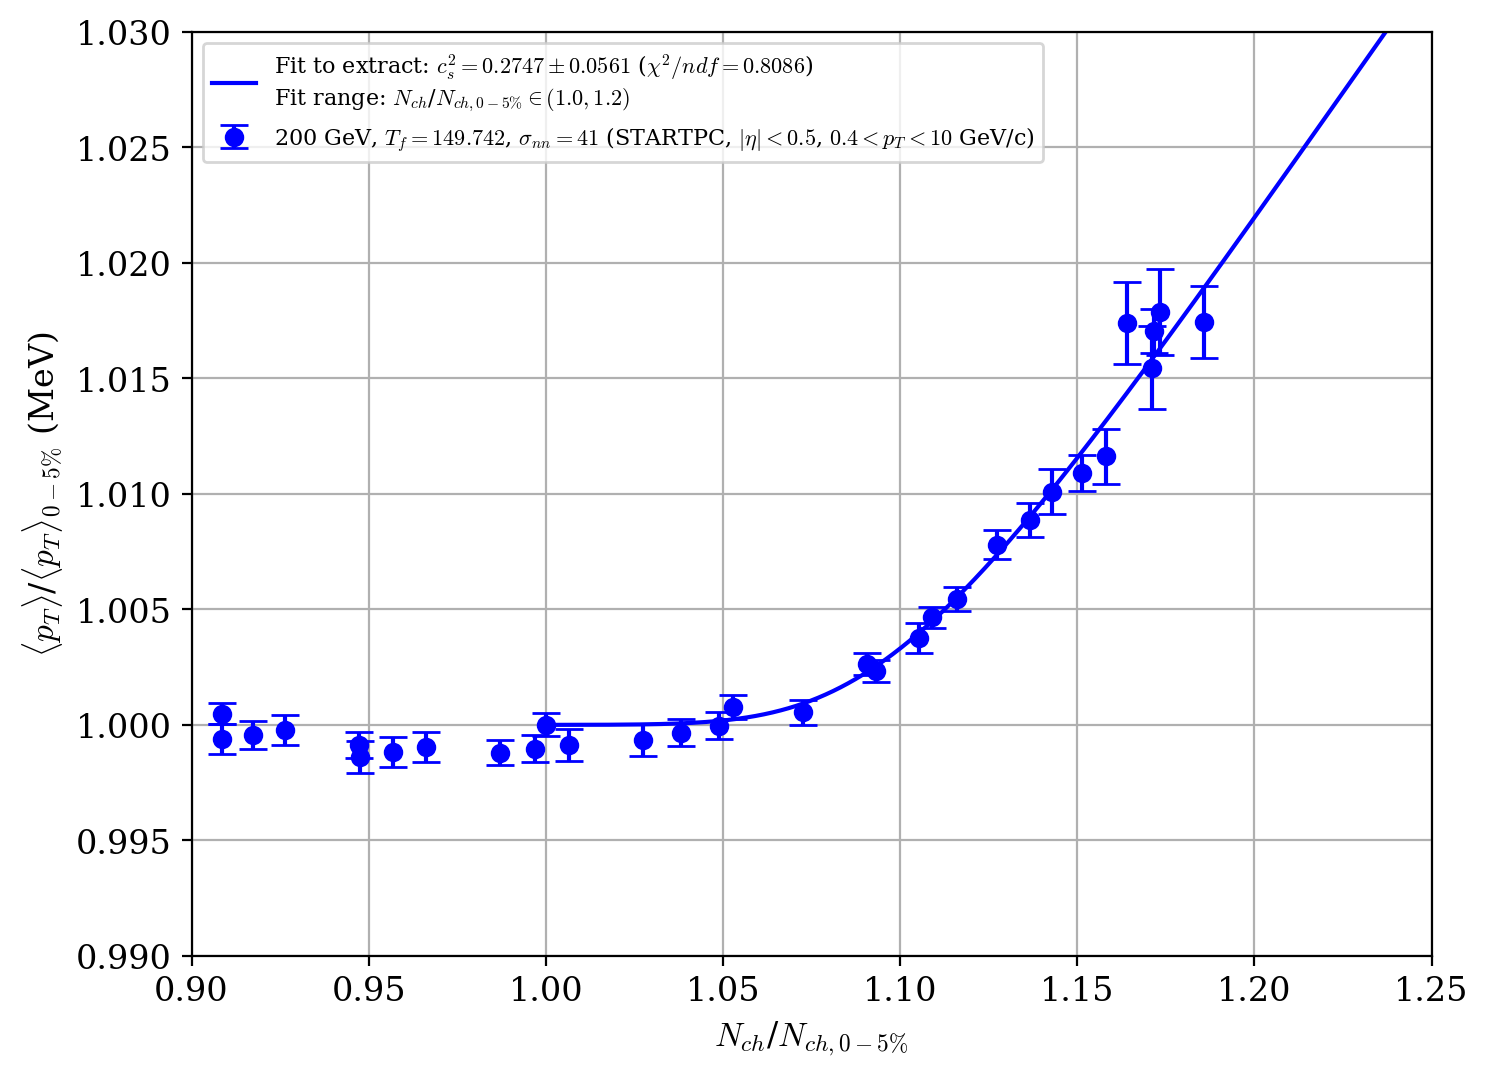

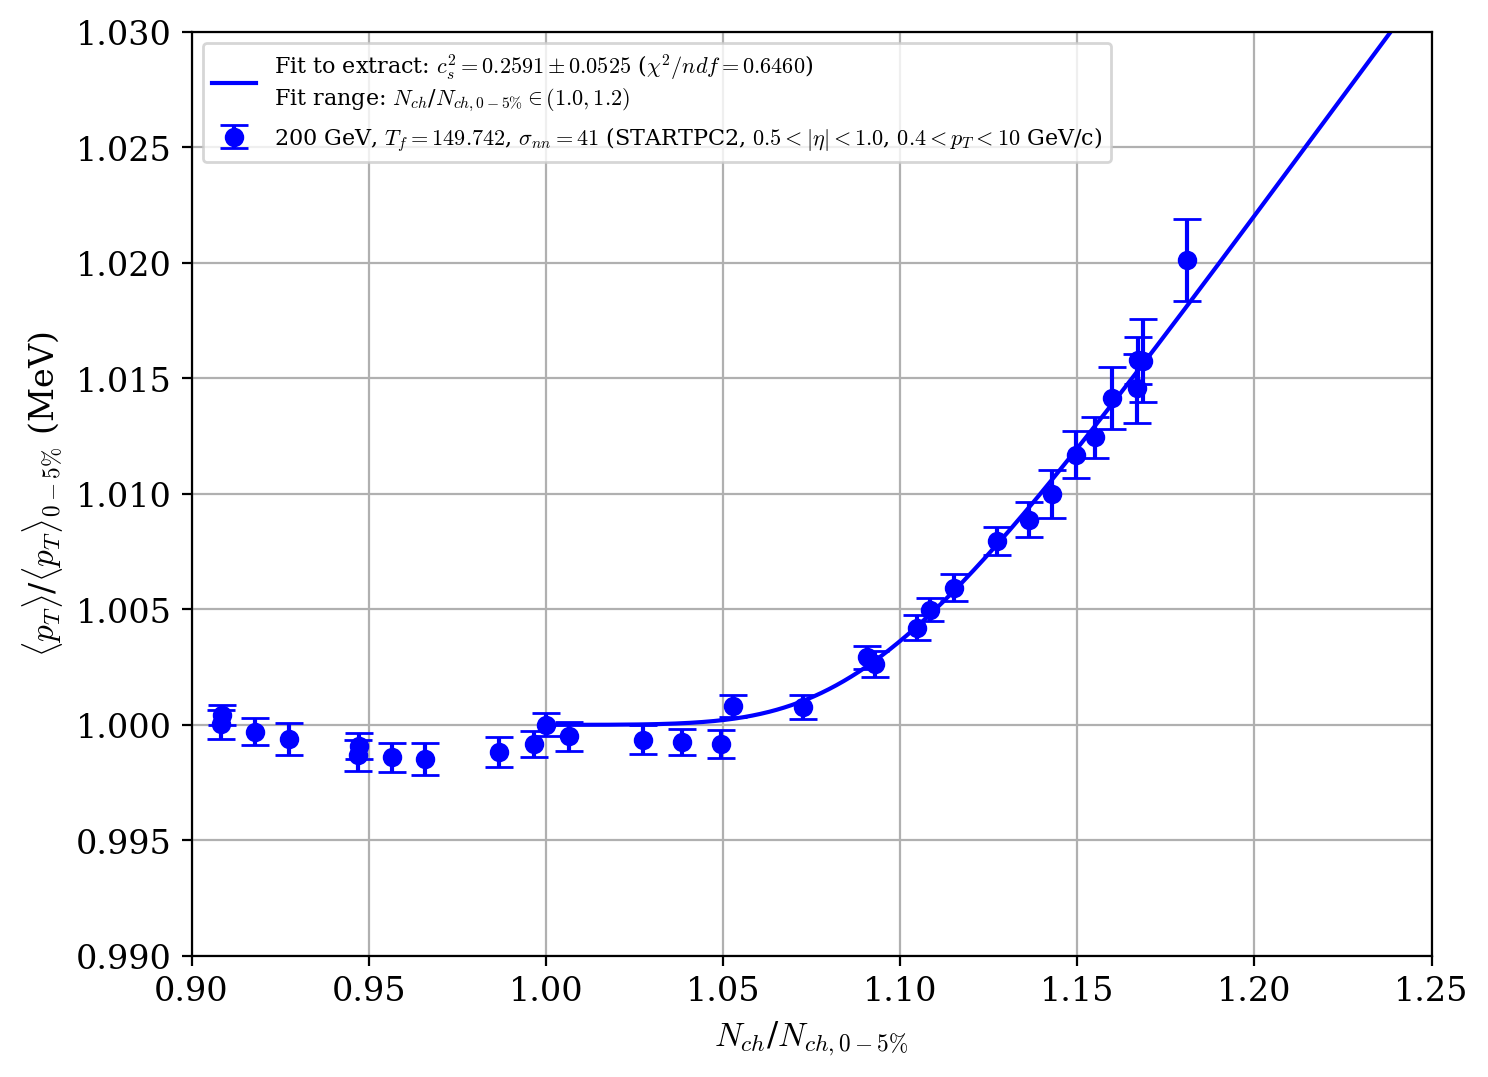

In [364]:
#SOS Plot for filepath 1
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_05_1, MultiplicityCharged_MeanpT_05_1.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_1.ravel(), fmt="o", capsize=5, color="blue", ecolor="blue", label = r"200 GeV, $T_f = 149.742$, $\sigma_{nn}=41$ (STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)")
plt.plot(xfit1,yfit1,color="blue", label=f"Fit to extract: $c_s^2={cs2_fit_1:.4f}\pm{cs2_err_1:.4f}$ ($\chi^2/ndf = {chi2_ndf_1:.4f}$)\nFit range: $N_{{ch}}$/$N_{{ch, 0-5\%}}\in (1.0,1.2)$")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.xlim([0.9,1.25])
plt.ylim([0.99,1.03])
plt.grid()
plt.legend(prop={'size': '8'})
plt.show()

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_05_STARTPC2_1, MultiplicityCharged_MeanpT_05_STARTPC2_1.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_1.ravel(), fmt="o", capsize=5, color="blue", ecolor="blue", label = r"200 GeV, $T_f = 149.742$, $\sigma_{nn}=41$ (STARTPC2, $0.5<|\eta|<1.0$, $0.4<p_T<10$ GeV/c)")
plt.plot(xfit1_STARTPC2,yfit1_STARTPC2,color="blue", label=f"Fit to extract: $c_s^2={cs2_fit_1_STARTPC2:.4f}\pm{cs2_err_1_STARTPC2:.4f}$ ($\chi^2/ndf = {chi2_ndf_1_STARTPC2:.4f}$)\nFit range: $N_{{ch}}$/$N_{{ch, 0-5\%}}\in (1.0,1.2)$")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.xlim([0.9,1.25])
plt.ylim([0.99,1.03])
plt.grid()
plt.legend(prop={'size': '8'})

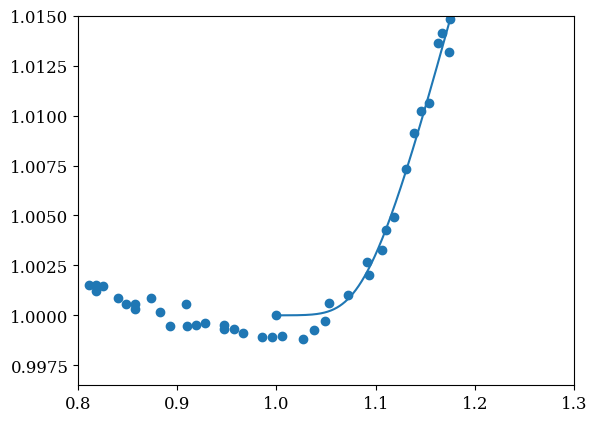

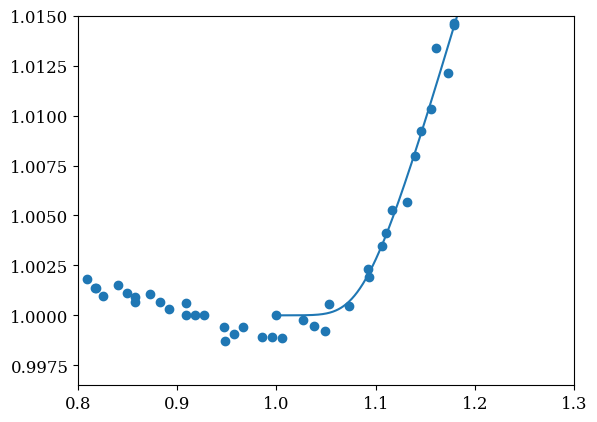

[0.23180711 1.11162934 0.02660399]
0.8863714301665347
[0.20559885 1.10550814 0.02280444]
0.610393271008199


In [365]:
#SOS fitting for filepath 2
fit_mask2 = (MultiplicityCharged_05_2 >= 1) & (MultiplicityCharged_05_2 <= 1.2)
fit_mask2_STARTPC2 = (MultiplicityCharged_05_STARTPC2_2 >= 1) & (MultiplicityCharged_05_STARTPC2_2 <= 1.2)

# Filter data
xnorm2_fitrange = MultiplicityCharged_05_2[fit_mask2]
ynorm2_fitrange = MultiplicityCharged_MeanpT_05_2[fit_mask2]
ynorm2err_fitrange = MultiplicityCharged_MeanpT_05_Symerr_2[fit_mask2]

xnorm2_fitrange_STARTPC2 = MultiplicityCharged_05_STARTPC2_2[fit_mask2_STARTPC2]
ynorm2_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_STARTPC2_2[fit_mask2_STARTPC2]
ynorm2err_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_2[fit_mask2_STARTPC2]

popt2, pcov2 = curve_fit(
    lambda x, cs2, Nch_knee, sigma0: scaled_mean_pt_fitonlycs2(x, cs2, Nch_knee, sigma0),
    xnorm2_fitrange, ynorm2_fitrange, sigma=ynorm2err_fitrange, absolute_sigma=True, p0=[0.18, 1.05, 0.02], bounds=([0,0,0],[1,3,0.1]), maxfev=100000)

popt2_STARTPC2, pcov2_STARTPC2 = curve_fit(
    lambda x, cs2, Nch_knee, sigma0: scaled_mean_pt_fitonlycs2(x, cs2, Nch_knee, sigma0),
    xnorm2_fitrange_STARTPC2, ynorm2_fitrange_STARTPC2, sigma=ynorm2err_fitrange_STARTPC2, absolute_sigma=True, p0=[0.18, 1.05, 0.02], bounds=([0,0,0],[1,3,0.1]), maxfev=100000)

cs2_fit_2 = popt2[0]
cs2_err_2 = np.sqrt(pcov2[0][0])

cs2_fit_2_STARTPC2 = popt2_STARTPC2[0]
cs2_err_2_STARTPC2 = np.sqrt(pcov2_STARTPC2[0][0])

xfit2 = np.linspace(1, 1.3, 1000)
yfit2 = scaled_mean_pt_fitonlycs2(xfit2, *popt2)

xfit2_STARTPC2 = np.linspace(1, 1.3, 1000)
yfit2_STARTPC2 = scaled_mean_pt_fitonlycs2(xfit2_STARTPC2, *popt2_STARTPC2)

chi2_2, ndf_2, chi2_ndf_2 = compute_chi2_ndf(xnorm2_fitrange, ynorm2_fitrange, ynorm2err_fitrange, scaled_mean_pt_fitonlycs2, popt2)
chi2_2_STARTPC2, ndf_2_STARTPC2, chi2_ndf_2_STARTPC2 = compute_chi2_ndf(xnorm2_fitrange_STARTPC2, ynorm2_fitrange_STARTPC2, ynorm2err_fitrange_STARTPC2, scaled_mean_pt_fitonlycs2, popt2_STARTPC2)

plt.scatter(MultiplicityCharged_05_2, MultiplicityCharged_MeanpT_05_2)
plt.plot(xfit2, yfit2)
plt.ylim([0.9965,1.015])
plt.xlim([0.8,1.3])
plt.show()

plt.scatter(MultiplicityCharged_05_STARTPC2_2, MultiplicityCharged_MeanpT_05_STARTPC2_2)
plt.plot(xfit2_STARTPC2, yfit2_STARTPC2)
plt.ylim([0.9965,1.015])
plt.xlim([0.8,1.3])
plt.show()

print(popt2)
print(chi2_ndf_2)
print(popt2_STARTPC2)
print(chi2_ndf_2_STARTPC2)


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\%'
<>:17: SyntaxWarning: invalid escape sequence '\i'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/831387833.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(xfit2,yfit2,color="red", label=f"Fit to extract: $c_s^2={

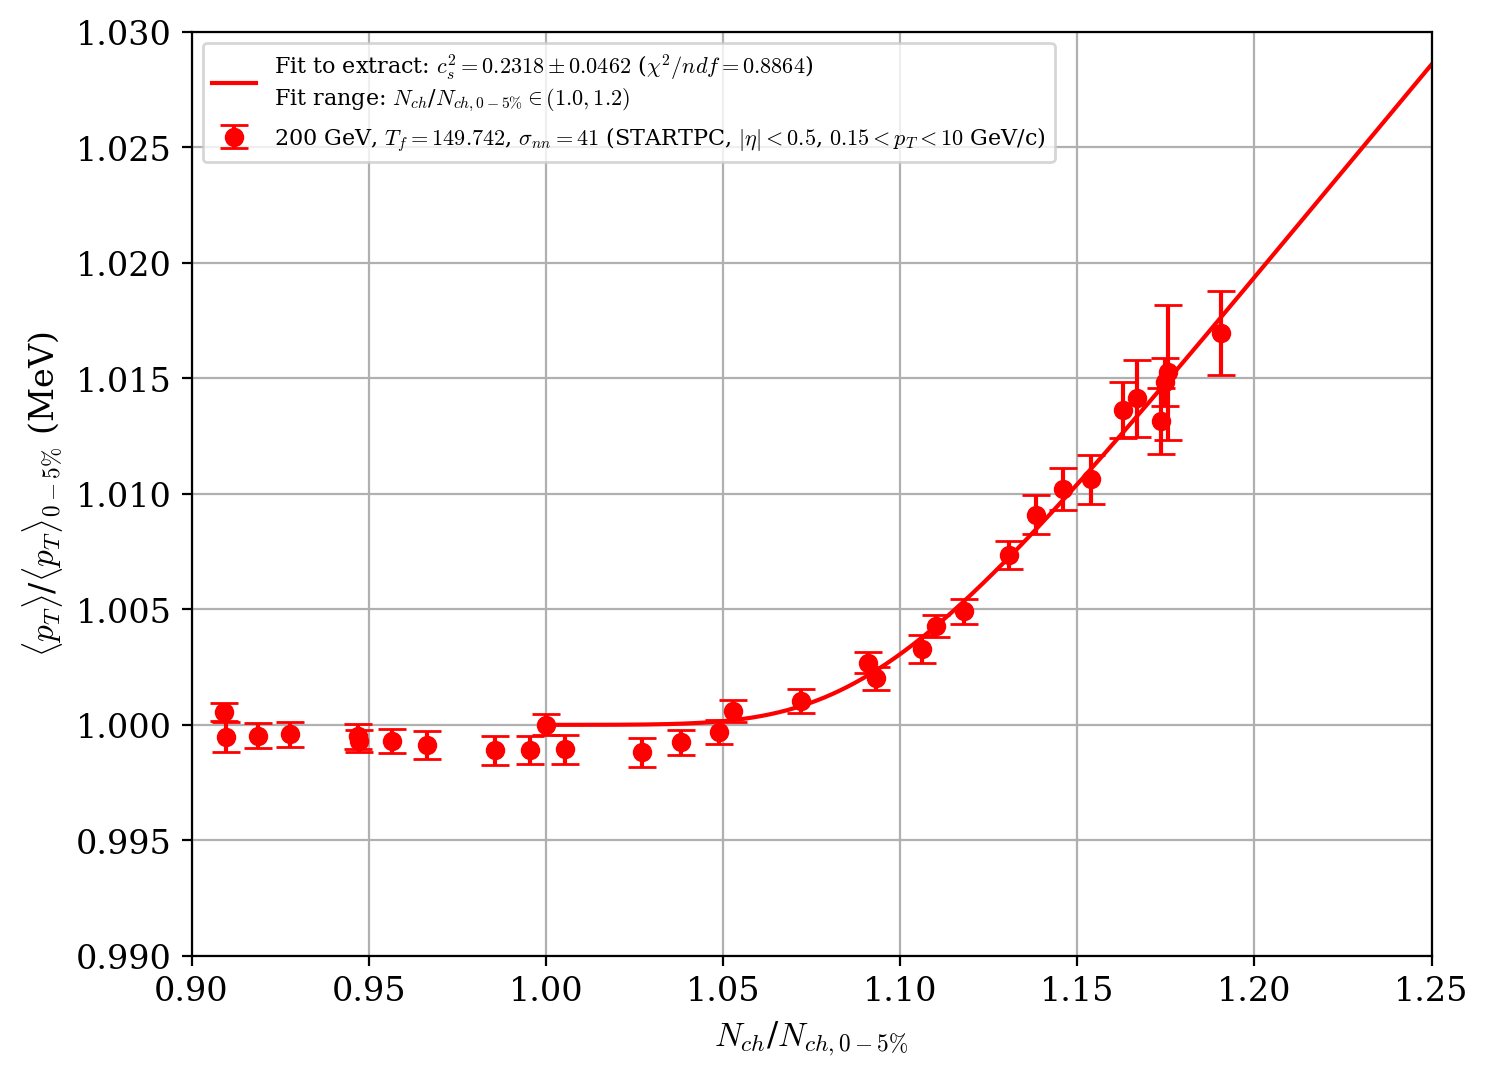

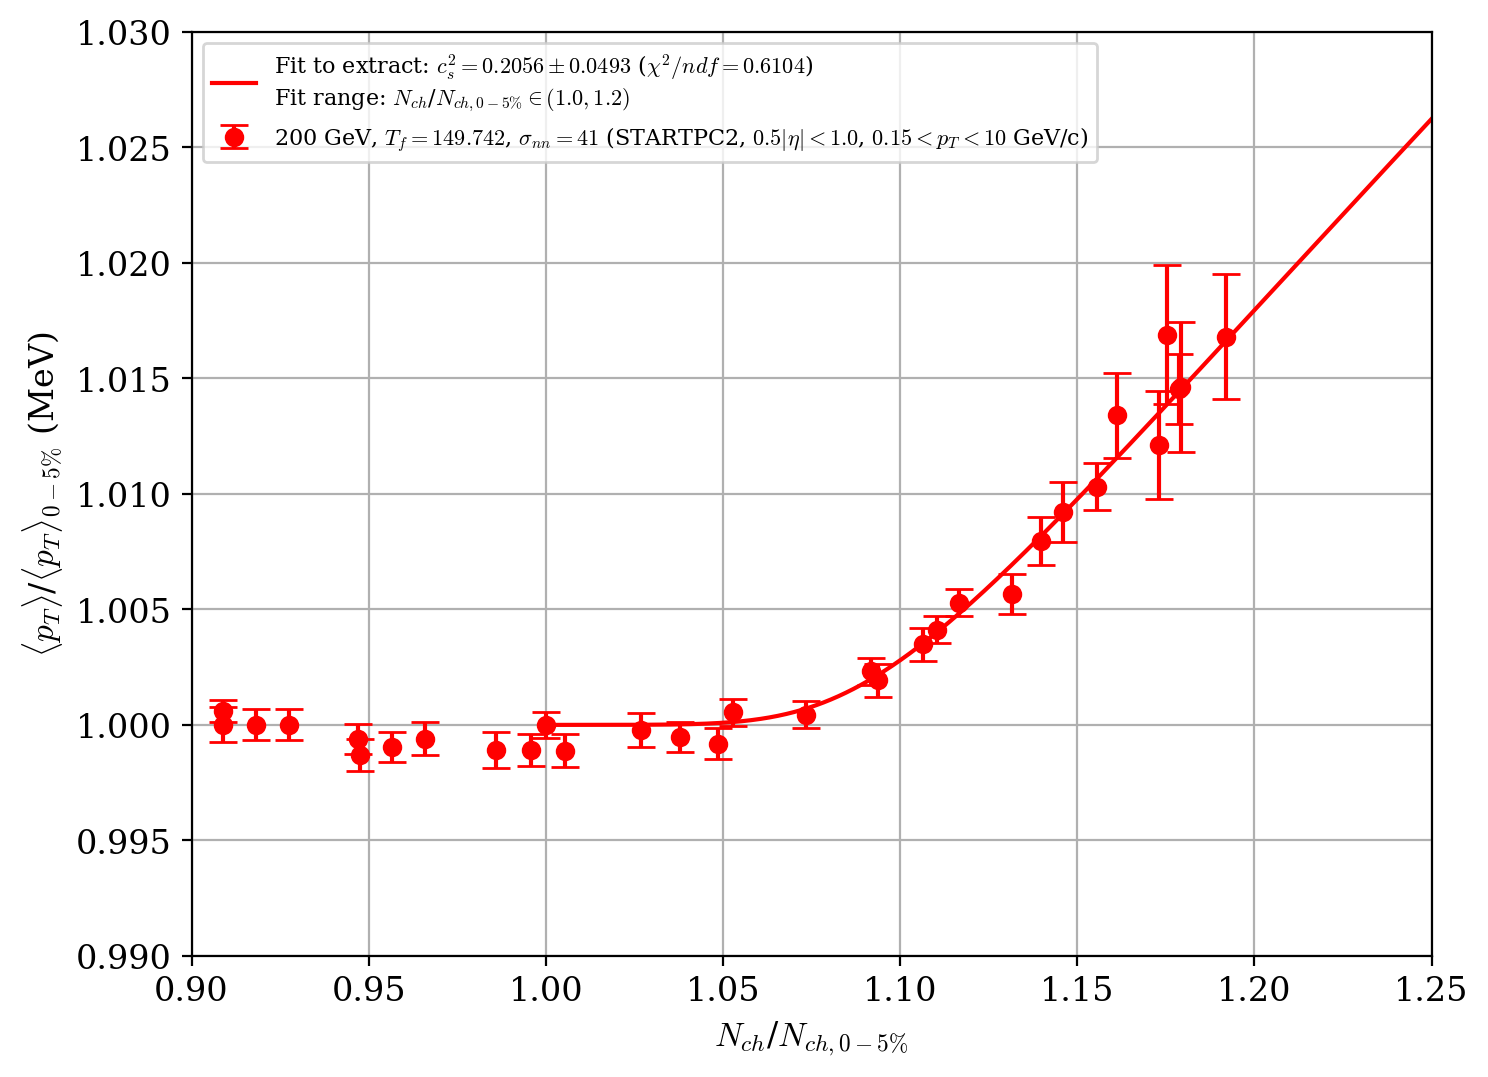

In [366]:
#SOS Plot for filepath 2
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_05_2, MultiplicityCharged_MeanpT_05_2.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_2.ravel(), fmt="o", capsize=5, color="red", ecolor="red", label = r"200 GeV, $T_f = 149.742$, $\sigma_{nn}=41$ (STARTPC, $|\eta|<0.5$, $0.15<p_T<10$ GeV/c)")
plt.plot(xfit2,yfit2,color="red", label=f"Fit to extract: $c_s^2={cs2_fit_2:.4f}\pm{cs2_err_2:.4f}$ ($\chi^2/ndf = {chi2_ndf_2:.4f}$)\nFit range: $N_{{ch}}$/$N_{{ch, 0-5\%}}\in (1.0,1.2)$")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.xlim([0.9,1.25])
plt.ylim([0.99,1.03])
plt.grid()
plt.legend(prop={'size': '8'})
plt.show()

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_05_STARTPC2_2, MultiplicityCharged_MeanpT_05_STARTPC2_2.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_2.ravel(), fmt="o", capsize=5, color="red", ecolor="red", label = r"200 GeV, $T_f = 149.742$, $\sigma_{nn}=41$ (STARTPC2, $0.5|\eta|<1.0$, $0.15<p_T<10$ GeV/c)")
plt.plot(xfit2_STARTPC2,yfit2_STARTPC2,color="red", label=f"Fit to extract: $c_s^2={cs2_fit_2_STARTPC2:.4f}\pm{cs2_err_2_STARTPC2:.4f}$ ($\chi^2/ndf = {chi2_ndf_2_STARTPC2:.4f}$)\nFit range: $N_{{ch}}$/$N_{{ch, 0-5\%}}\in (1.0,1.2)$")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.xlim([0.9,1.25])
plt.ylim([0.99,1.03])
plt.grid()
plt.legend(prop={'size': '8'})

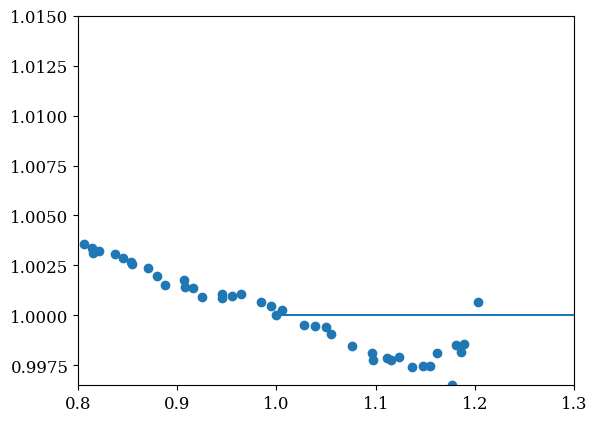

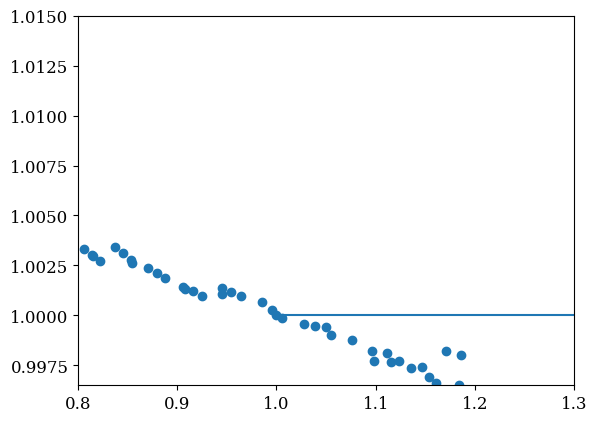

[0.07236203 2.17456794 0.00920356]
20.20530326966322
[0.12428401 2.41059779 0.00285868]
25.784664749307407


In [367]:
#SOS fitting for filepath 3
fit_mask3 = (MultiplicityCharged_05_3 >= 1) & (MultiplicityCharged_05_3 <= 1.2)
fit_mask3_STARTPC2 = (MultiplicityCharged_05_STARTPC2_3 >= 1) & (MultiplicityCharged_05_STARTPC2_3 <= 1.2)

# Filter data
xnorm3_fitrange = MultiplicityCharged_05_3[fit_mask3]
ynorm3_fitrange = MultiplicityCharged_MeanpT_05_3[fit_mask3]
ynorm3err_fitrange = MultiplicityCharged_MeanpT_05_Symerr_3[fit_mask3]

xnorm3_fitrange_STARTPC2 = MultiplicityCharged_05_STARTPC2_3[fit_mask3_STARTPC2]
ynorm3_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_STARTPC2_3[fit_mask3_STARTPC2]
ynorm3err_fitrange_STARTPC2 = MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_3[fit_mask3_STARTPC2]

popt3, pcov3 = curve_fit(
    lambda x, cs2, Nch_knee, sigma0: scaled_mean_pt_fitonlycs2(x, cs2, Nch_knee, sigma0),
    xnorm3_fitrange, ynorm3_fitrange, sigma=ynorm3err_fitrange, absolute_sigma=True, p0=[0.18, 1.05, 0.02], bounds=([0,0,0],[1,3,0.1]), maxfev=100000)

popt3_STARTPC2, pcov3_STARTPC2 = curve_fit(
    lambda x, cs2, Nch_knee, sigma0: scaled_mean_pt_fitonlycs2(x, cs2, Nch_knee, sigma0),
    xnorm3_fitrange_STARTPC2, ynorm3_fitrange_STARTPC2, sigma=ynorm3err_fitrange_STARTPC2, absolute_sigma=True, p0=[0.18, 1.05, 0.02], bounds=([0,0,0],[1,3,0.1]), maxfev=100000)

cs2_fit_3 = popt3[0]
cs2_err_3 = np.sqrt(pcov3[0][0])

cs2_fit_3_STARTPC2 = popt3_STARTPC2[0]
cs2_err_3_STARTPC2 = np.sqrt(pcov3_STARTPC2[0][0])

xfit3 = np.linspace(1, 1.3, 1000)
yfit3 = scaled_mean_pt_fitonlycs2(xfit3, *popt3)

xfit3_STARTPC2 = np.linspace(1, 1.3, 1000)
yfit3_STARTPC2 = scaled_mean_pt_fitonlycs2(xfit3_STARTPC2, *popt3_STARTPC2)

chi2_3, ndf_3, chi2_ndf_3 = compute_chi2_ndf(xnorm3_fitrange, ynorm3_fitrange, ynorm3err_fitrange, scaled_mean_pt_fitonlycs2, popt3)
chi2_3_STARTPC2, ndf_3_STARTPC2, chi2_ndf_3_STARTPC2 = compute_chi2_ndf(xnorm3_fitrange_STARTPC2, ynorm3_fitrange_STARTPC2, ynorm3err_fitrange_STARTPC2, scaled_mean_pt_fitonlycs2, popt3_STARTPC2)

plt.scatter(MultiplicityCharged_05_3, MultiplicityCharged_MeanpT_05_3)
plt.plot(xfit3, yfit3)
plt.ylim([0.9965,1.015])
plt.xlim([0.8,1.3])
plt.show()

plt.scatter(MultiplicityCharged_05_STARTPC2_3, MultiplicityCharged_MeanpT_05_STARTPC2_3)
plt.plot(xfit3_STARTPC2, yfit3_STARTPC2)
plt.ylim([0.9965,1.015])
plt.xlim([0.8,1.3])
plt.show()

print(popt3)
print(chi2_ndf_3)
print(popt3_STARTPC2)
print(chi2_ndf_3_STARTPC2)

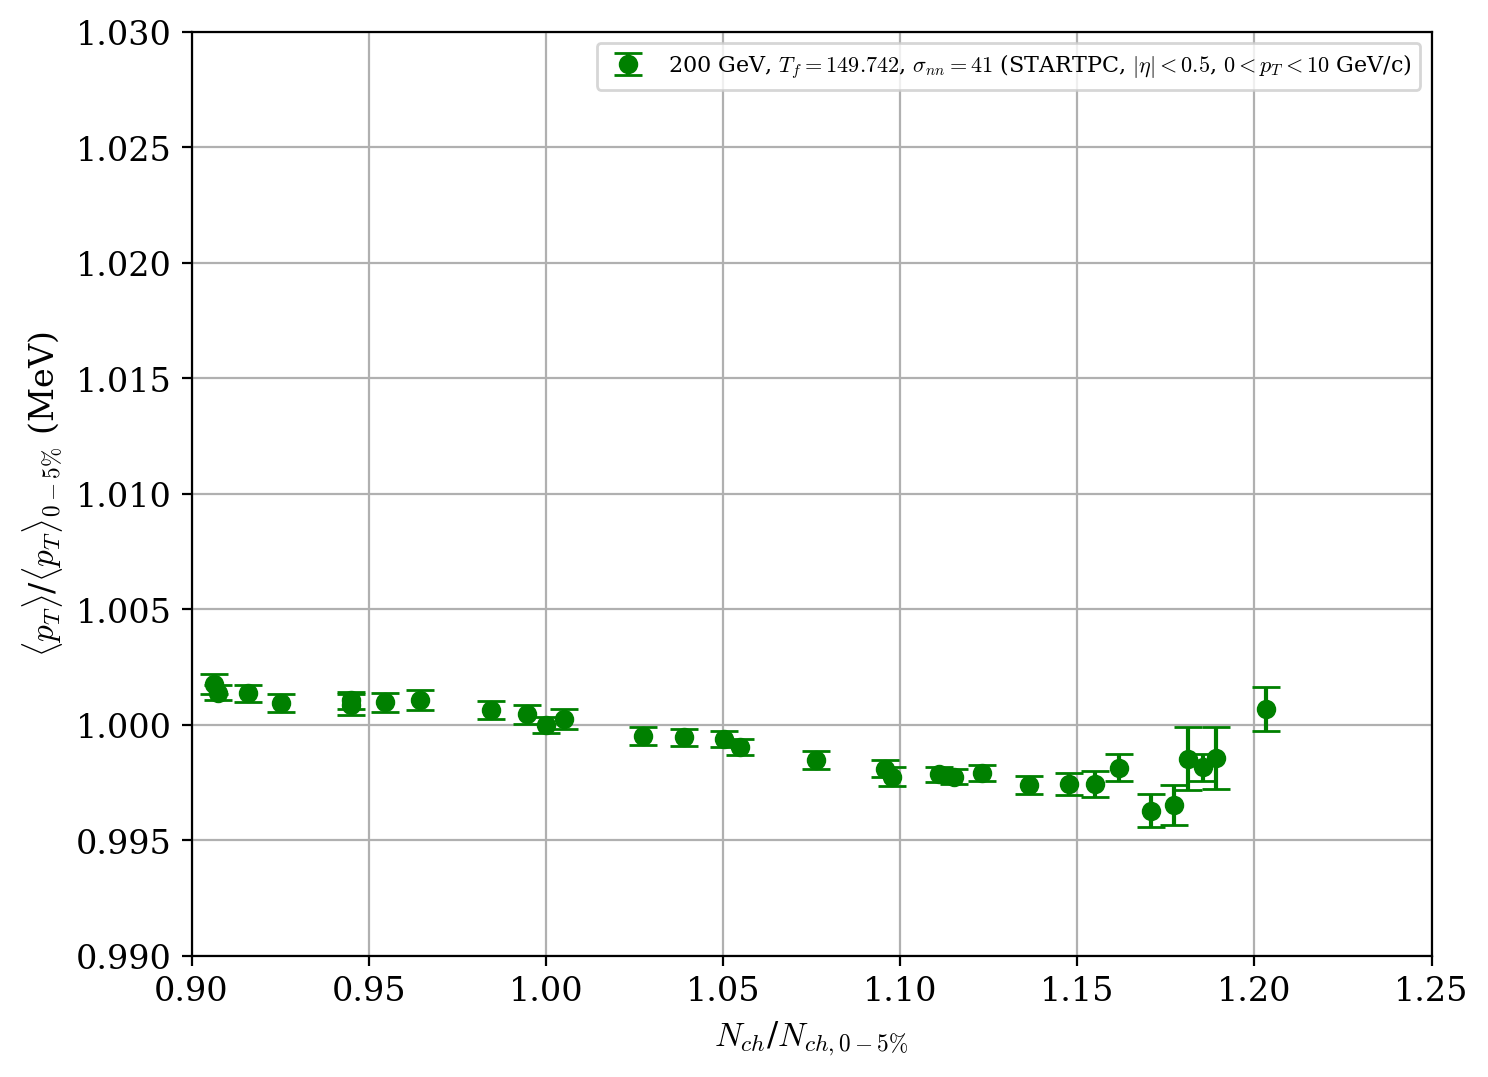

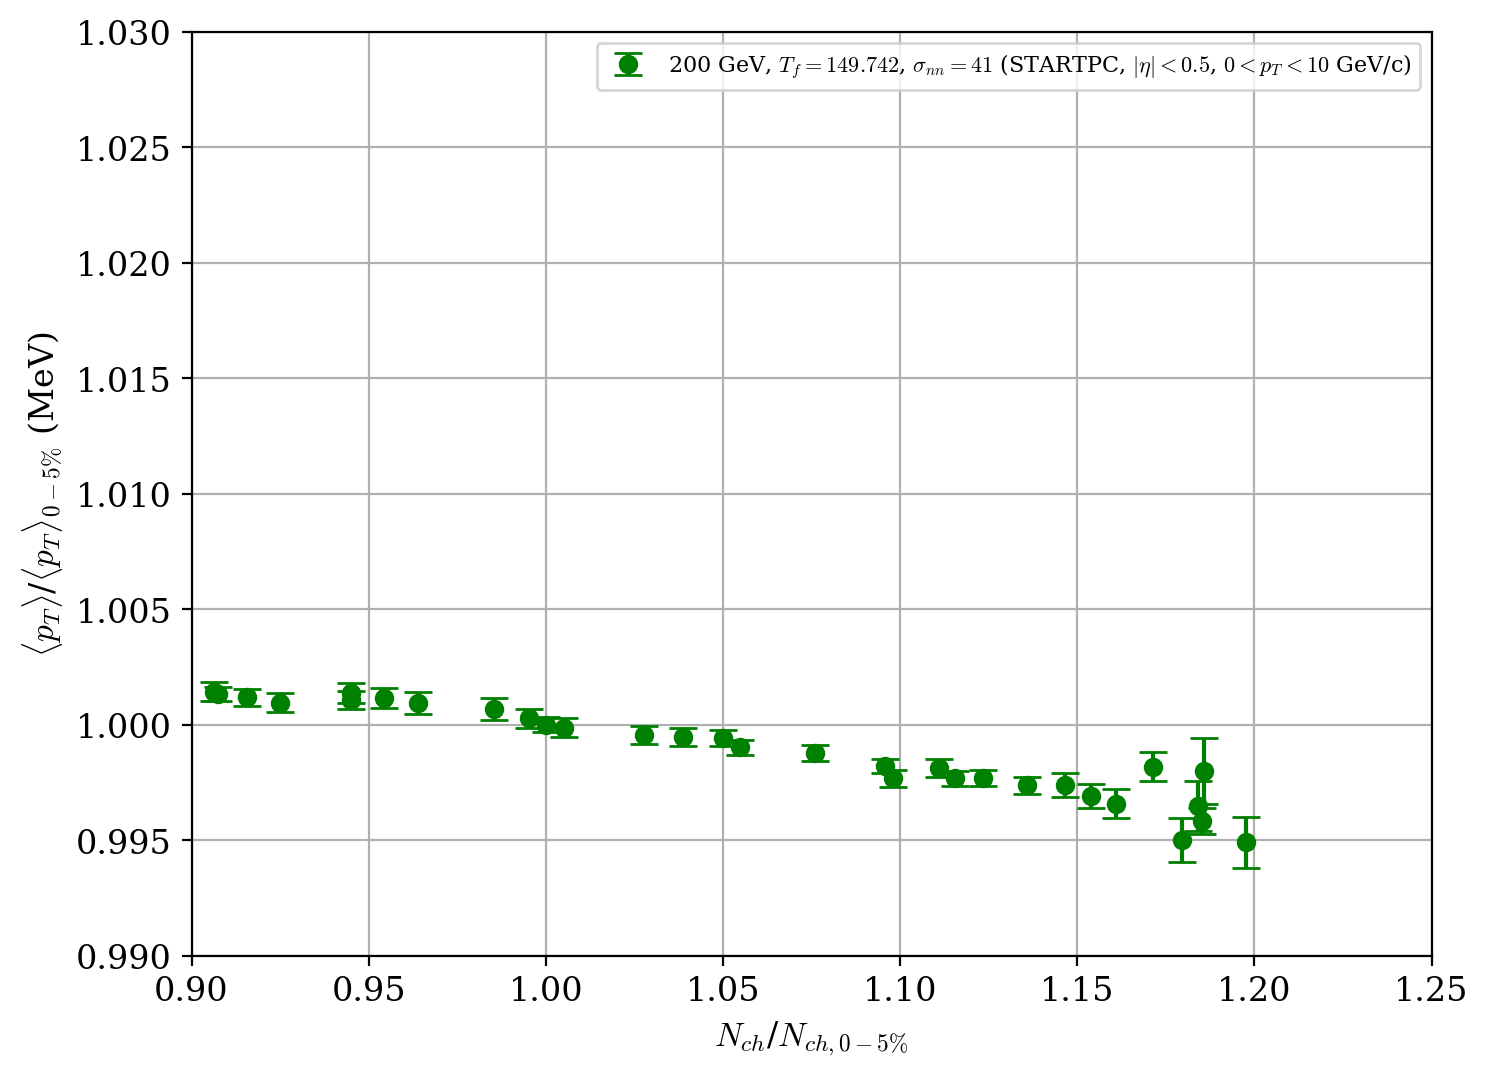

In [368]:
#SOS Plot for filepath 2
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_05_3, MultiplicityCharged_MeanpT_05_3.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_3.ravel(), fmt="o", capsize=5, color="green", ecolor="green", label = r"200 GeV, $T_f = 149.742$, $\sigma_{nn}=41$ (STARTPC, $|\eta|<0.5$, $0<p_T<10$ GeV/c)")
#plt.plot(xfit3,yfit3,color="green", label=f"Fit to extract: $c_s^2={cs2_fit_3:.4f}\pm{cs2_err_3:.4f}$ ($\chi^2/ndf = {chi2_ndf_3:.4f}$)\nFit range: $N_{{ch}}$/$N_{{ch, 0-5\%}}\in (1.0,1.2)$")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.xlim([0.9,1.25])
plt.ylim([0.99,1.03])
plt.grid()
plt.legend(prop={'size': '8'})
plt.show()

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_05_STARTPC2_3, MultiplicityCharged_MeanpT_05_STARTPC2_3.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_STARTPC2_3.ravel(), fmt="o", capsize=5, color="green", ecolor="green", label = r"200 GeV, $T_f = 149.742$, $\sigma_{nn}=41$ (STARTPC, $|\eta|<0.5$, $0<p_T<10$ GeV/c)")
#plt.plot(xfit3_STARTPC2,yfit3_STARTPC2,color="green", label=f"Fit to extract: $c_s^2={cs2_fit_3_STARTPC2:.4f}\pm{cs2_err_3_STARTPC2:.4f}$ ($\chi^2/ndf = {chi2_ndf_3_STARTPC2:.4f}$)\nFit range: $N_{{ch}}$/$N_{{ch, 0-5\%}}\in (1.0,1.2)$")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.xlim([0.9,1.25])
plt.ylim([0.99,1.03])
plt.grid()
plt.legend(prop={'size': '8'})

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\i'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '

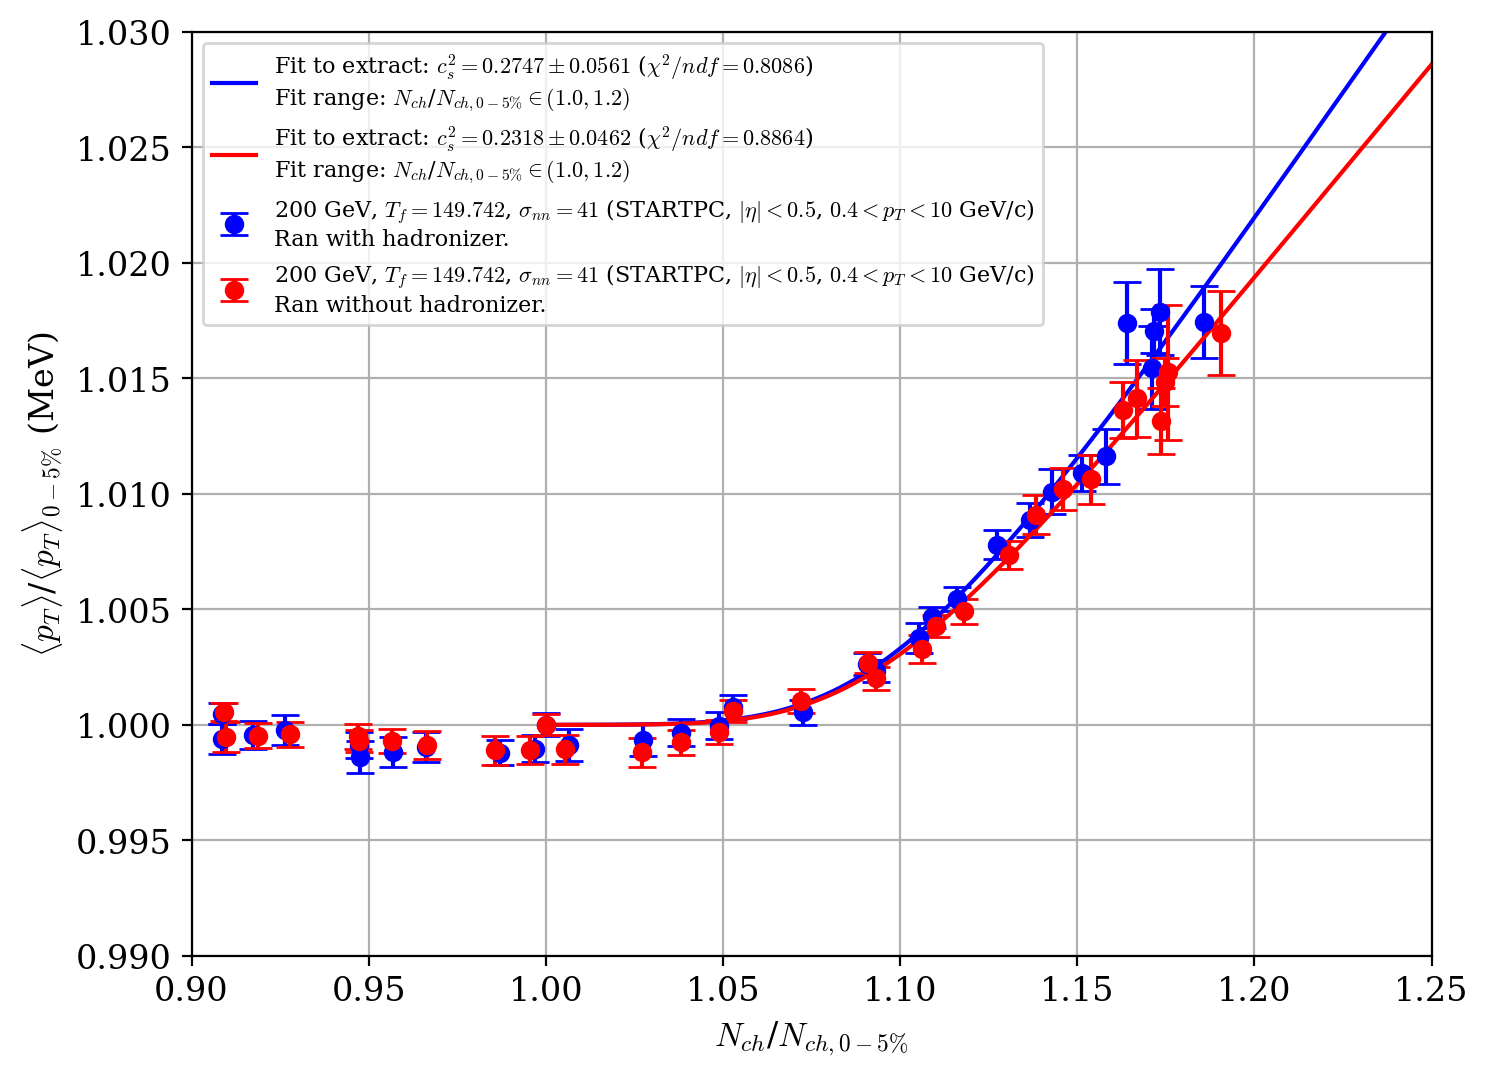

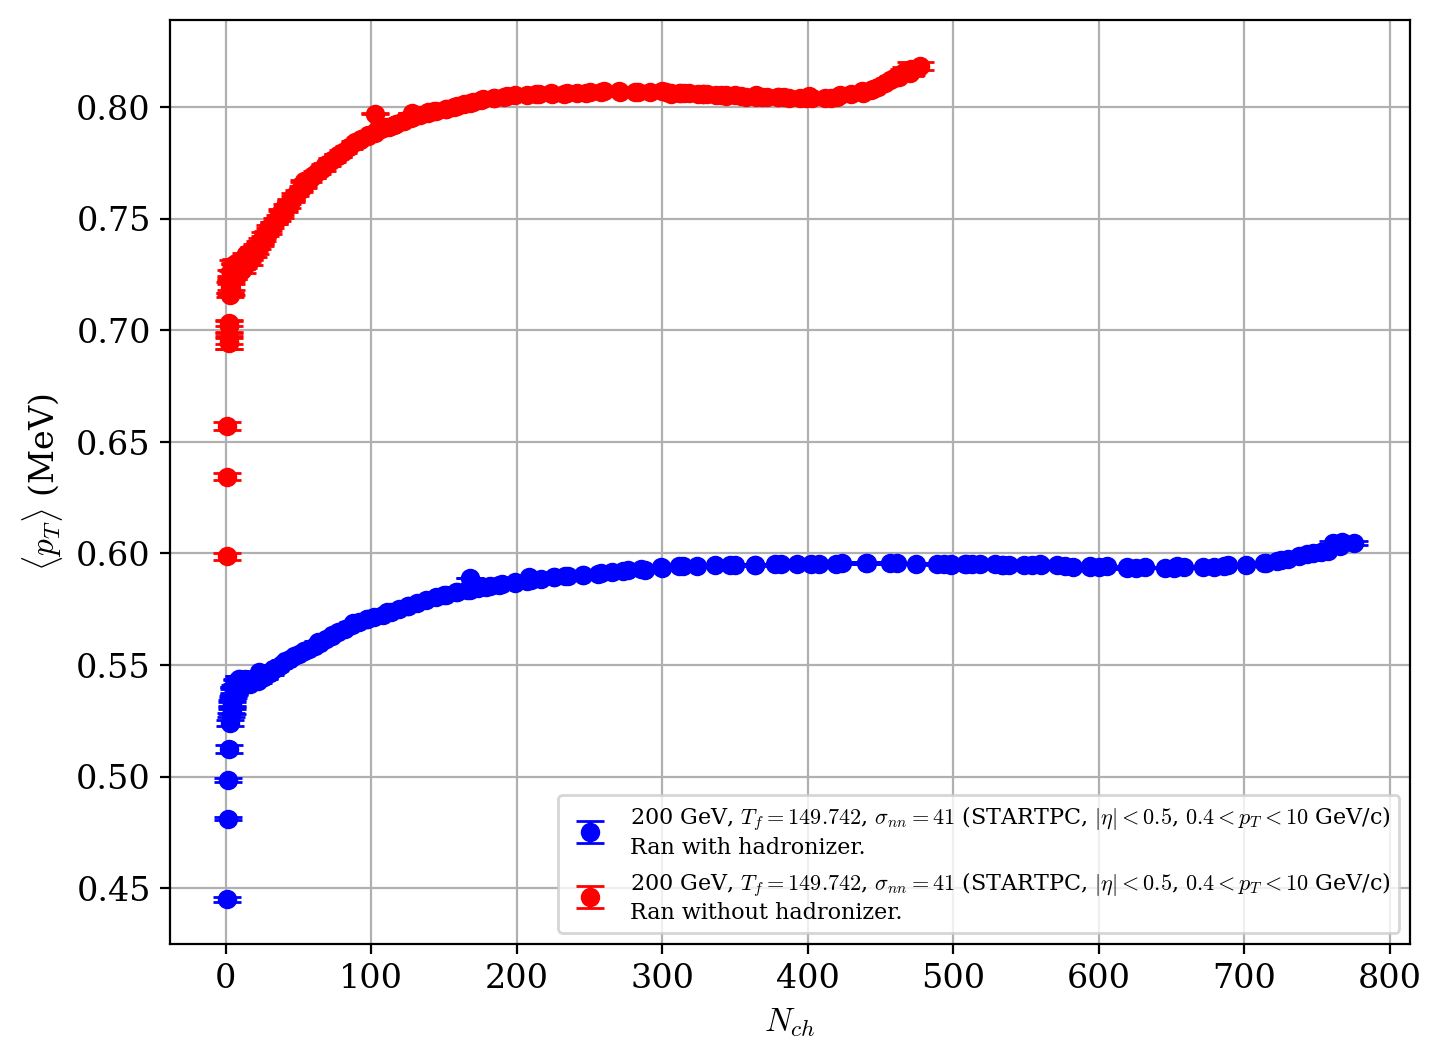

In [375]:
#Plot comparison
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_05_1, MultiplicityCharged_MeanpT_05_1.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_1.ravel(), fmt="o", capsize=5, color="blue", ecolor="blue", label = f"200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$ (STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)\nRan with hadronizer.")
plt.plot(xfit1,yfit1,color="blue", label=f"Fit to extract: $c_s^2={cs2_fit_1:.4f}\pm{cs2_err_1:.4f}$ ($\chi^2/ndf = {chi2_ndf_1:.4f}$)\nFit range: $N_{{ch}}$/$N_{{ch, 0-5\%}}\in (1.0,1.2)$")
plt.errorbar(MultiplicityCharged_05_2, MultiplicityCharged_MeanpT_05_2.ravel(), yerr=MultiplicityCharged_MeanpT_05_Symerr_2.ravel(), fmt="o", capsize=5, color="red", ecolor="red", label = f"200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$ (STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)\nRan without hadronizer.")
plt.plot(xfit2,yfit2,color="red", label=f"Fit to extract: $c_s^2={cs2_fit_2:.4f}\pm{cs2_err_2:.4f}$ ($\chi^2/ndf = {chi2_ndf_2:.4f}$)\nFit range: $N_{{ch}}$/$N_{{ch, 0-5\%}}\in (1.0,1.2)$")
plt.xlabel(r"$N_{ch}$/$N_{ch, 0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle$/$\langle p_T \rangle_{0-5\%}$ (MeV)")
plt.xlim([0.9,1.25])
plt.ylim([0.99,1.03])
plt.grid()
plt.legend(prop={'size': '8'})
plt.show()

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_1, MultiplicityCharged_MeanpT_1.ravel(), yerr=MultiplicityCharged_MeanpT_Symerr_1.ravel(), fmt="o", capsize=5, color="blue", ecolor="blue", label = f"200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$ (STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)\nRan with hadronizer.")
plt.errorbar(MultiplicityCharged_2, MultiplicityCharged_MeanpT_2.ravel(), yerr=MultiplicityCharged_MeanpT_Symerr_2.ravel(), fmt="o", capsize=5, color="red", ecolor="red", label = f"200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$ (STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)\nRan without hadronizer.")
plt.xlabel(r"$N_{ch}$")
plt.ylabel(r"$\langle p_T \rangle$ (MeV)")
#plt.xlim([0.9,1.25])
#plt.ylim([0.99,1.03])
plt.grid()
plt.legend(prop={'size': '8'})
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\>'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:14: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\>'
<>:17: SyntaxWarning: invalid escape sequence '\e'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_2730/3825033291.py:7: SyntaxW

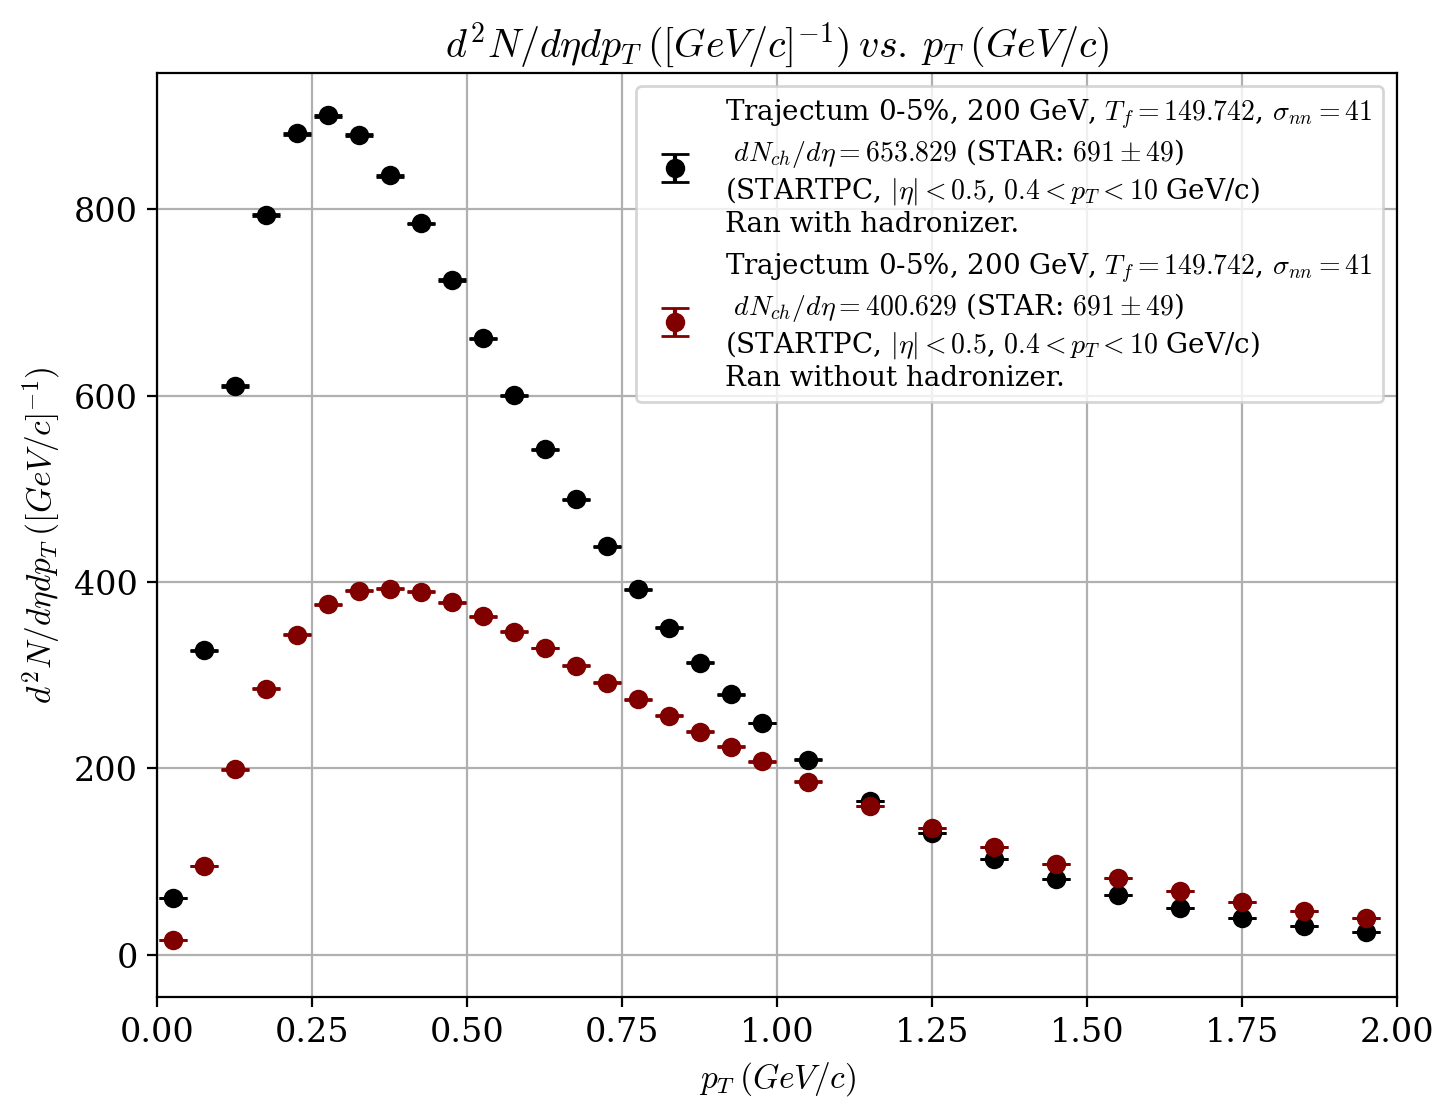

In [370]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(MultiplicityCharged_bins_1,
            MultiplicityChargedYield_1,
            yerr=[MultiplicityChargedYield_Lerr_1[:],MultiplicityChargedYield_Uerr_1[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_1:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)\nRan with hadronizer.", color="black")
plt.errorbar(MultiplicityCharged_bins_2,
            MultiplicityChargedYield_2,
            yerr=[MultiplicityChargedYield_Lerr_2[:],MultiplicityChargedYield_Uerr_2[:]],
            fmt="o", capsize=5,
            label=f"Trajectum {centrality_label[index]}%, 200 GeV, $T_f = 149.742$, $\sigma_{{nn}}=41$\n $dN_{{ch}}/d\eta={dNchdEta_2:.3f}$ (STAR: ${STARdNdEta}$)\n(STARTPC, $|\eta|<0.5$, $0.4<p_T<10$ GeV/c)\nRan without hadronizer.", color="maroon")
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()